# **Time Series Analysis and Forecasting: A Comparative Study of Trading Strategies on Tesla, Microsoft, and Nvidia Stocks**
**Kevin Obote, Student Number: 190696**  
**Course Unit: Time Series and Forecasting**  

---
![Stock Market Trading](stock-market.jpg)  
*Source: [Pixabay](https://pixabay.com/photos/stock-market-charts-trading-6287711/)*  

## **Abstract**  
This paper presents a comprehensive analysis and comparison of different trading strategies applied to Tesla (TSLA), Microsoft (MSFT), and Nvidia (NVDA) stocks. Utilizing time series analysis and forecasting techniques, I implemented and evaluated the performance of **Moving Average (MA) Crossover**, **Bollinger Bands**, and **Relative Strength Index (RSI)** strategies.  

- The **MA Crossover strategy** demonstrated the highest final return of **535.92%** for NVDA, with strong performance metrics across all stocks.  
- The **Bollinger Bands strategy** showed mixed results, with a final return of **78.85%** for MSFT but only **6.20%** for TSLA.  
- The **RSI strategy** had varied performance, with a **negative return of -17.25%** for TSLA but positive returns of **50.26%** for MSFT and **60.67%** for NVDA.  

The findings provide valuable insights for traders and investors seeking to optimize their trading strategies using time series forecasting models.  

---

## **Introduction**  
In financial markets, the ability to predict stock price movements and implement effective trading strategies is crucial for achieving profitable outcomes. **Time series analysis and forecasting** play a pivotal role in understanding and anticipating market trends.  

This paper aims to apply and compare different trading strategies based on time series concepts to three major stocks: **Tesla (TSLA), Microsoft (MSFT), and Nvidia (NVDA)**. By leveraging advanced forecasting models such as **ARIMA** and **Exponential Smoothing**, we seek to evaluate the performance and reliability of these strategies in real-world scenarios.  

---

## **Objective**  
The primary objectives of this study are:  

1. **Apply and compare** different trading strategies, including **Moving Average (MA) Crossover, Bollinger Bands, and Relative Strength Index (RSI)**, to **Tesla (TSLA), Microsoft (MSFT), and Nvidia (NVDA)** stocks.  
2. **Utilize time series analysis and forecasting models** (**ARIMA and Exponential Smoothing**) to predict future stock prices and enhance the evaluation of trading strategies.  
3. **Provide empirical results and performance metrics** for each strategy, highlighting their effectiveness and reliability.  
4. **Offer insights and recommendations** for traders and investors seeking to optimize their trading strategies using time series forecasting techniques.  

---

## **Contents:**  
1. **Data Collection and Preprocessing**  
2. **Exploratory Data Analysis**  
3. **Time Series Analysis**  
4. **Trading Strategy Implementation**  
5. **Performance Evaluation**  
6. **Results and Conclusions** 
7. **References**

### Import Required Libraries

In [1]:
# Import necessary libraries

# Data Handling and Manipulation
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# Time Series Analysis and Modeling
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Performance Evaluation
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visualization
sns.set(style="whitegrid")

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Data Collection and Preprocessing

Fetching historical data for TSLA, MSFT, and NVDA using the Yahoo Finance API.

In [2]:
# Load Data from Yahoo Finance

# Define the stock tickers for Tesla, Microsoft, and Nvidia
tickers = ['TSLA', 'MSFT', 'NVDA']

# Download historical stock data for the defined tickers
stock_data = yf.download(tickers, start='2020-01-01', end='2024-12-31')

# Display the first few rows of the downloaded data
stock_data.head()

[*********************100%***********************]  3 of 3 completed


Price            Close                             High                       \
Ticker            MSFT      NVDA       TSLA        MSFT      NVDA       TSLA   
Date                                                                           
2020-01-02  153.630692  5.972710  28.684000  153.735906  5.972710  28.713333   
2020-01-03  151.717743  5.877112  29.534000  152.989871  5.920928  30.266666   
2020-01-06  152.109848  5.901757  30.102667  152.176809  5.906985  30.104000   
2020-01-07  150.722977  5.973208  31.270666  152.722028  6.019016  31.441999   
2020-01-08  153.123734  5.984412  32.809334  153.802845  6.025739  33.232666   

Price              Low                             Open                       \
Ticker            MSFT      NVDA       TSLA        MSFT      NVDA       TSLA   
Date                                                                           
2020-01-02  151.440346  5.893293  28.114000  151.870762  5.943831  28.299999   
2020-01-03  151.182113  5.828067  29.128000  151.430809  5.852963  29.366667   
2020-01-06  149.699501  5.757612  29.333332  150.244705  5.783752  29.364668   
2020-01-07  150.474296  5.885077  30.224001  152.387267  5.930138  30.760000   
2020-01-08  151.076855  5.928895  31.215334  152.014207  5.968976  31.580000   

Price         Volume                        
Ticker          MSFT       NVDA       TSLA  
Date                                        
2020-01-02  22622100  237536000  142981500  
2020-01-03  21116200  205384000  266677500  
2020-01-06  20813700  262636000  151995000  
2020-01-07  21634100  314856000  268231500  
2020-01-08  27746500  277108000  467164500

## 2. Exploratory Data Analysis (EDA)
Perform EDA including summary statistics, visualizing stock prices, and checking for missing values.

In [3]:
# Exploratory Data Analysis (EDA)

# Check for missing values in the dataset
missing_values = stock_data.isnull().sum()
print("Missing values in the dataset:\n", missing_values)

Missing values in the dataset:
 Price   Ticker
Close   MSFT      0
        NVDA      0
        TSLA      0
High    MSFT      0
        NVDA      0
        TSLA      0
Low     MSFT      0
        NVDA      0
        TSLA      0
Open    MSFT      0
        NVDA      0
        TSLA      0
Volume  MSFT      0
        NVDA      0
        TSLA      0
dtype: int64


We do not have missing values

In [4]:
# Summary statistics for the stock prices
summary_statistics = stock_data.describe()
print("Summary statistics for the stock prices:")
summary_statistics

Summary statistics for the stock prices:


Price         Close                                   High               \
Ticker         MSFT         NVDA         TSLA         MSFT         NVDA   
count   1257.000000  1257.000000  1257.000000  1257.000000  1257.000000   
mean     289.008296    38.369700   213.279443   291.797454    39.077611   
std       81.967739    38.153295    83.321515    82.239953    38.859773   
min      129.881058     4.892427    24.081333   134.820423     5.229716   
25%      229.112320    13.572303   173.860001   231.718486    13.824405   
50%      276.731293    21.226318   220.190002   280.273532    21.729197   
75%      334.128174    45.564079   259.670013   337.395900    46.200838   
max      465.786438   148.869751   479.859985   466.573450   152.879470   

Price                        Low                                   Open  \
Ticker         TSLA         MSFT         NVDA         TSLA         MSFT   
count   1257.000000  1257.000000  1257.000000  1257.000000  1257.000000   
mean     218.117130   285.959978    37.595167   208.204688   288.931063   
std       85.225296    81.613225    37.405898    81.382769    82.030183   
min       26.990667   127.099681     4.500834    23.367332   131.406022   
25%      177.190002   225.963583    13.333921   170.009995   229.339338   
50%      225.339996   273.632616    20.795874   215.330002   277.353979   
75%      264.896667   331.532901    44.902622   254.210007   333.978281   
max      488.540009   462.698189   146.249911   457.510010   465.228569   

Price                                   Volume                              
Ticker         NVDA         TSLA          MSFT          NVDA          TSLA  
count   1257.000000  1257.000000  1.257000e+03  1.257000e+03  1.257000e+03  
mean      38.371132   213.315219  2.864995e+07  4.470372e+08  1.255686e+08  
std       38.207275    83.449250  1.273432e+07  1.876080e+08  8.210821e+07  
min        4.984596    24.980000  7.164500e+06  9.788400e+07  2.940180e+07  
25%       13.601479   173.889999  2.052590e+07  3.088640e+08  7.600980e+07  
50%       21.168407   220.916672  2.548220e+07  4.212450e+08  1.019936e+08  
75%       45.702026   259.209991  3.293560e+07  5.470070e+08  1.454174e+08  
max      149.339720   475.899994  9.701270e+07  1.543911e+09  9.140820e+08

##### Summary Statistics

In [5]:
# Calculate summary statistics for the closing prices of the stocks
closing_summary_statistics = stock_data['Close'].describe()
print("Summary statistics for the closing prices:\n", closing_summary_statistics)

Summary statistics for the closing prices:
 Ticker         MSFT         NVDA         TSLA
count   1257.000000  1257.000000  1257.000000
mean     289.008296    38.369700   213.279443
std       81.967739    38.153295    83.321515
min      129.881058     4.892427    24.081333
25%      229.112320    13.572303   173.860001
50%      276.731293    21.226318   220.190002
75%      334.128174    45.564079   259.670013
max      465.786438   148.869751   479.859985


In [6]:
# Calculate summary statistics for the trading volume of the stocks
volume_summary_statistics = stock_data['Volume'].describe()
print("Summary statistics for the trading volume:\n", volume_summary_statistics)

Summary statistics for the trading volume:
 Ticker          MSFT          NVDA          TSLA
count   1.257000e+03  1.257000e+03  1.257000e+03
mean    2.864995e+07  4.470372e+08  1.255686e+08
std     1.273432e+07  1.876080e+08  8.210821e+07
min     7.164500e+06  9.788400e+07  2.940180e+07
25%     2.052590e+07  3.088640e+08  7.600980e+07
50%     2.548220e+07  4.212450e+08  1.019936e+08
75%     3.293560e+07  5.470070e+08  1.454174e+08
max     9.701270e+07  1.543911e+09  9.140820e+08


In [7]:
# Calculate additional statistics: skewness and kurtosis for closing prices
closing_skewness = stock_data['Close'].skew()
closing_kurtosis = stock_data['Close'].kurtosis()
print("Skewness for the closing prices:\n", closing_skewness)
print("Kurtosis for the closing prices:\n", closing_kurtosis)

Skewness for the closing prices:
 Ticker
MSFT    0.357244
NVDA    1.560268
TSLA   -0.188959
dtype: float64
Kurtosis for the closing prices:
 Ticker
MSFT   -0.846633
NVDA    1.159279
TSLA    0.215982
dtype: float64


#### Skewness and Kurtosis Analysis for Closing prices

MSFT and TSLA have relatively stable price distributions, with MSFT slightly right-skewed and TSLA slightly left-skewed, both having fewer extreme price movements. NVDA, however, shows more frequent large price increases and occasional extreme fluctuations, indicating higher volatility.


In [8]:
# Calculate additional statistics: skewness and kurtosis for trading volume
volume_skewness = stock_data['Volume'].skew()
volume_kurtosis = stock_data['Volume'].kurtosis()
print("Skewness for the trading volume:\n", volume_skewness)
print("Kurtosis for the trading volume:\n", volume_kurtosis)

Skewness for the trading volume:
 Ticker
MSFT    2.045607
NVDA    1.080830
TSLA    2.993442
dtype: float64
Kurtosis for the trading volume:
 Ticker
MSFT     5.719377
NVDA     2.323535
TSLA    15.296092
dtype: float64


#### Skewness and Kurtosis Analysis for Trading Volume

All three stocks exhibit right-skewed distributions in trading volume, with TSLA having the most extreme spikes. MSFT and NVDA show heavy-tailed distributions, but TSLA stands out with extreme kurtosis, reflecting very frequent large trading volume surges.


In [9]:

# Visualize the distribution of closing prices
plt.figure(figsize=(14, 7))
for ticker in tickers:
    sns.histplot(stock_data['Close'][ticker], kde=True, label=ticker)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

- TSLA has a slightly left-skewed distribution with moderate volatility and a near-normal distribution of price movements.
- MSFT exhibits a slightly right-skewed distribution, with similar volatility to TSLA but a flatter distribution (fewer extremes).
- NVDA shows a right-skewed distribution, with higher mean prices and frequent extreme upward price movements, indicating higher volatility and more significant price fluctuations than TSLA and MSFT.

TSLA and MSFT have mildly right-skewed, flatter distributions with moderate price variability, while NVDA exhibits high right skewness and heavy tails, indicating frequent large price swings and greater volatility; all stocks have medians lower than their means, suggesting occasional extreme price increases.

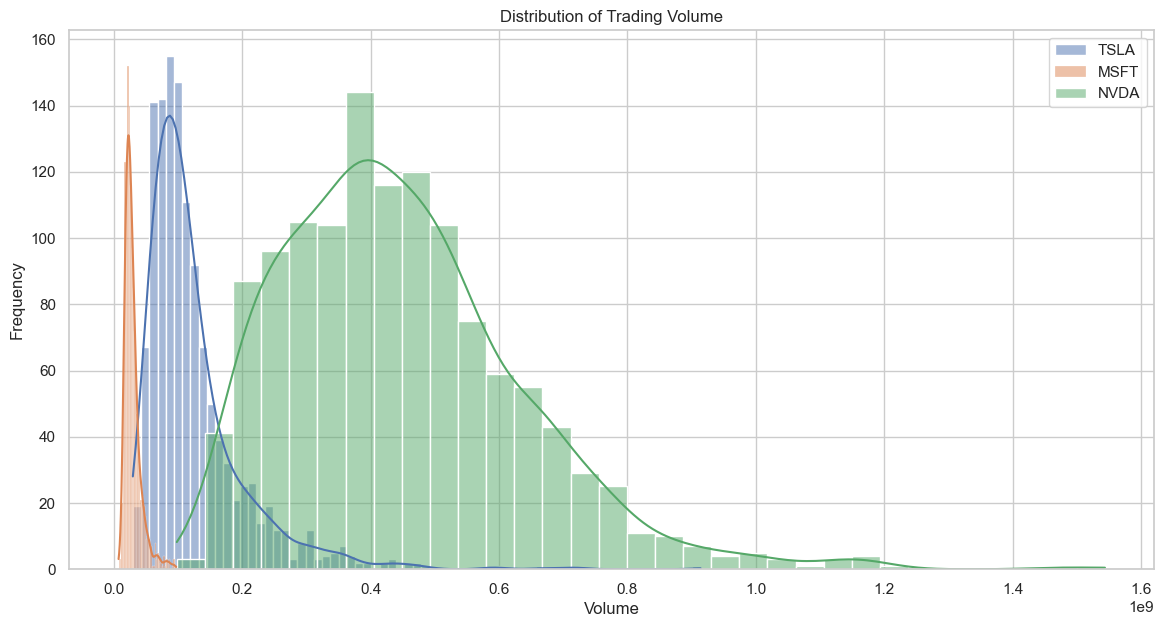

In [10]:
# Visualize the distribution of trading volume
plt.figure(figsize=(14, 7))
for ticker in tickers:
    sns.histplot(stock_data['Volume'][ticker], kde=True, label=ticker)
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.legend()
plt.show()

MSFT, NVDA, and TSLA have highly variable trading volumes, with NVDA showing the largest fluctuations due to its high standard deviation; all stocks exhibit right-skewed distributions, as their maximum volumes far exceed their medians, indicating occasional extreme trading spikes.

#### Visualize Stock Prices
Plot the historical stock prices for Tesla, Microsoft, and Nvidia.

In [11]:
# Visualize Stock Prices

# Plot the historical stock prices for Tesla, Microsoft, and Nvidia
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(stock_data['Close'][ticker], label=ticker)
plt.title('Historical Stock Prices of Tesla, Microsoft, and Nvidia')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

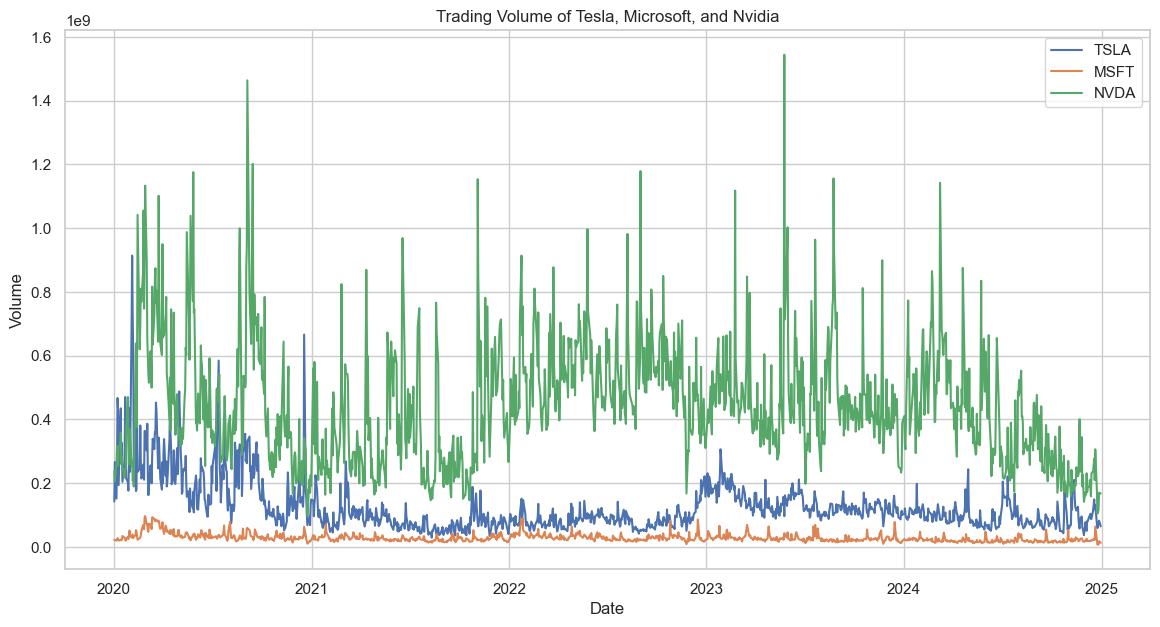

In [12]:
# Visualize the volume of stocks traded
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(stock_data['Volume'][ticker], label=ticker)
plt.title('Trading Volume of Tesla, Microsoft, and Nvidia')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

We can see the trading volume for NVDIA is greater then TSLA and lastly MSFT

## 3a. Time Series Analysis

We'll perform various time series analyses including:
- Stationarity tests
- Seasonal decomposition
- Autocorrelation analysis

In [13]:
# Time Series Decomposition

# Decompose the time series data into trend, seasonal, and residual components for each stock

# Define a function to perform time series decomposition
def decompose_time_series(data, ticker):
    result = seasonal_decompose(data['Close'][ticker], model='multiplicative', period=365)
    return result

# Perform decomposition for each stock
decomposed_tsla = decompose_time_series(stock_data, 'TSLA')
decomposed_msft = decompose_time_series(stock_data, 'MSFT')
decomposed_nvda = decompose_time_series(stock_data, 'NVDA')

# Plot the decomposed components for each stock
def plot_decomposition(decomposed, ticker):
    plt.figure(figsize=(14, 10))
    plt.suptitle(f'Time Series Decomposition of {ticker}', fontsize=16)
    
    plt.subplot(411)
    plt.plot(decomposed.observed, label='Observed')
    plt.legend(loc='upper left')
    
    plt.subplot(412)
    plt.plot(decomposed.trend, label='Trend')
    plt.legend(loc='upper left')
    
    plt.subplot(413)
    plt.plot(decomposed.seasonal, label='Seasonal')
    plt.legend(loc='upper left')
    
    plt.subplot(414)
    plt.plot(decomposed.resid, label='Residual')
    plt.legend(loc='upper left')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

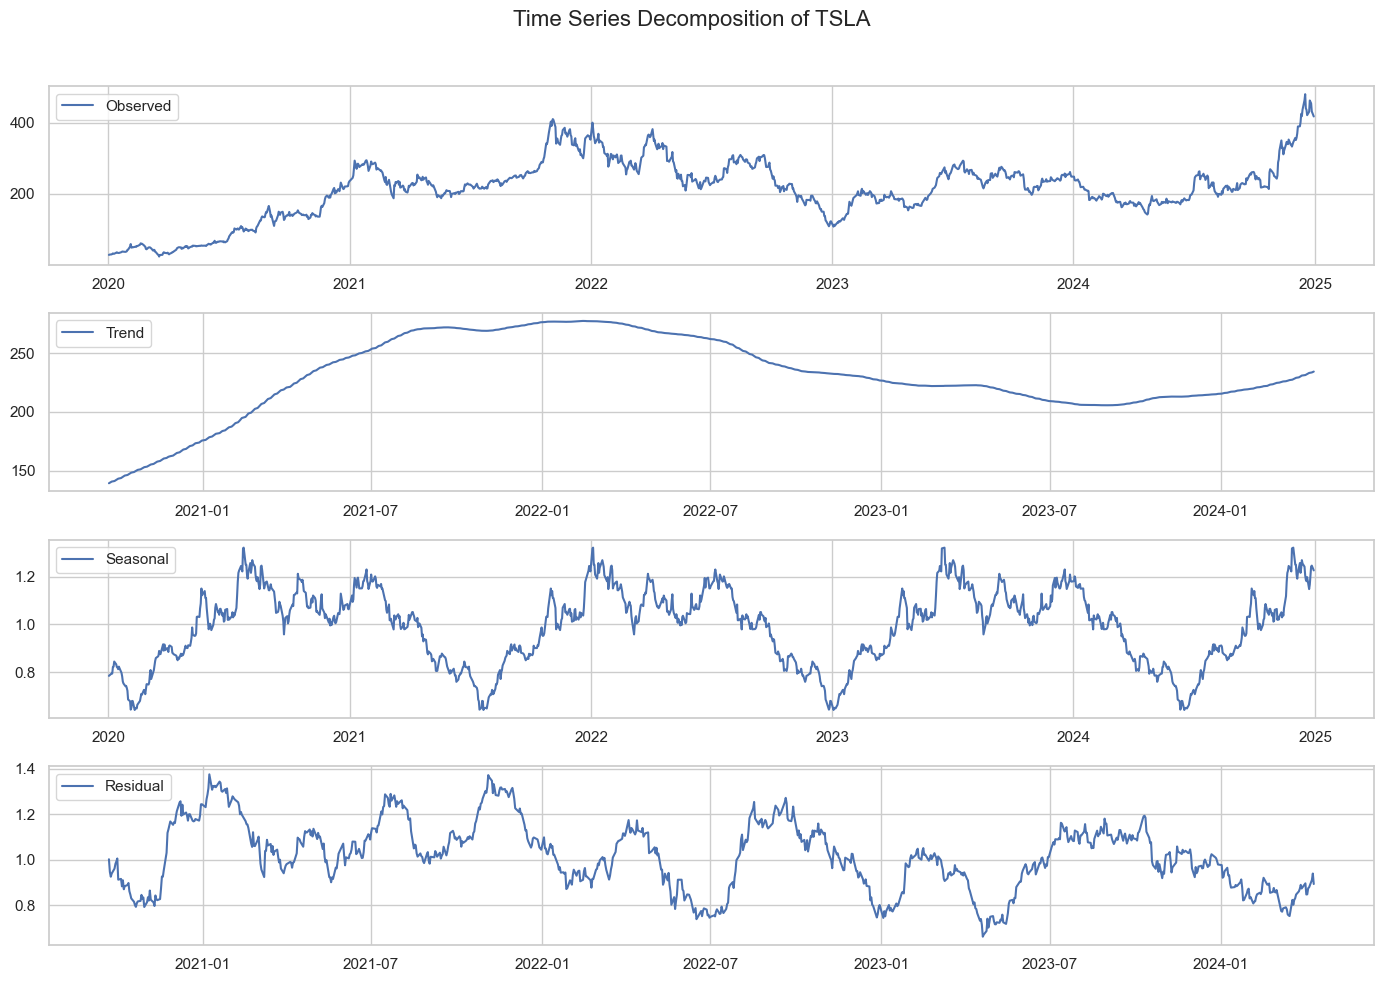

In [14]:
# Plot decompositions
plot_decomposition(decomposed_tsla, 'TSLA')

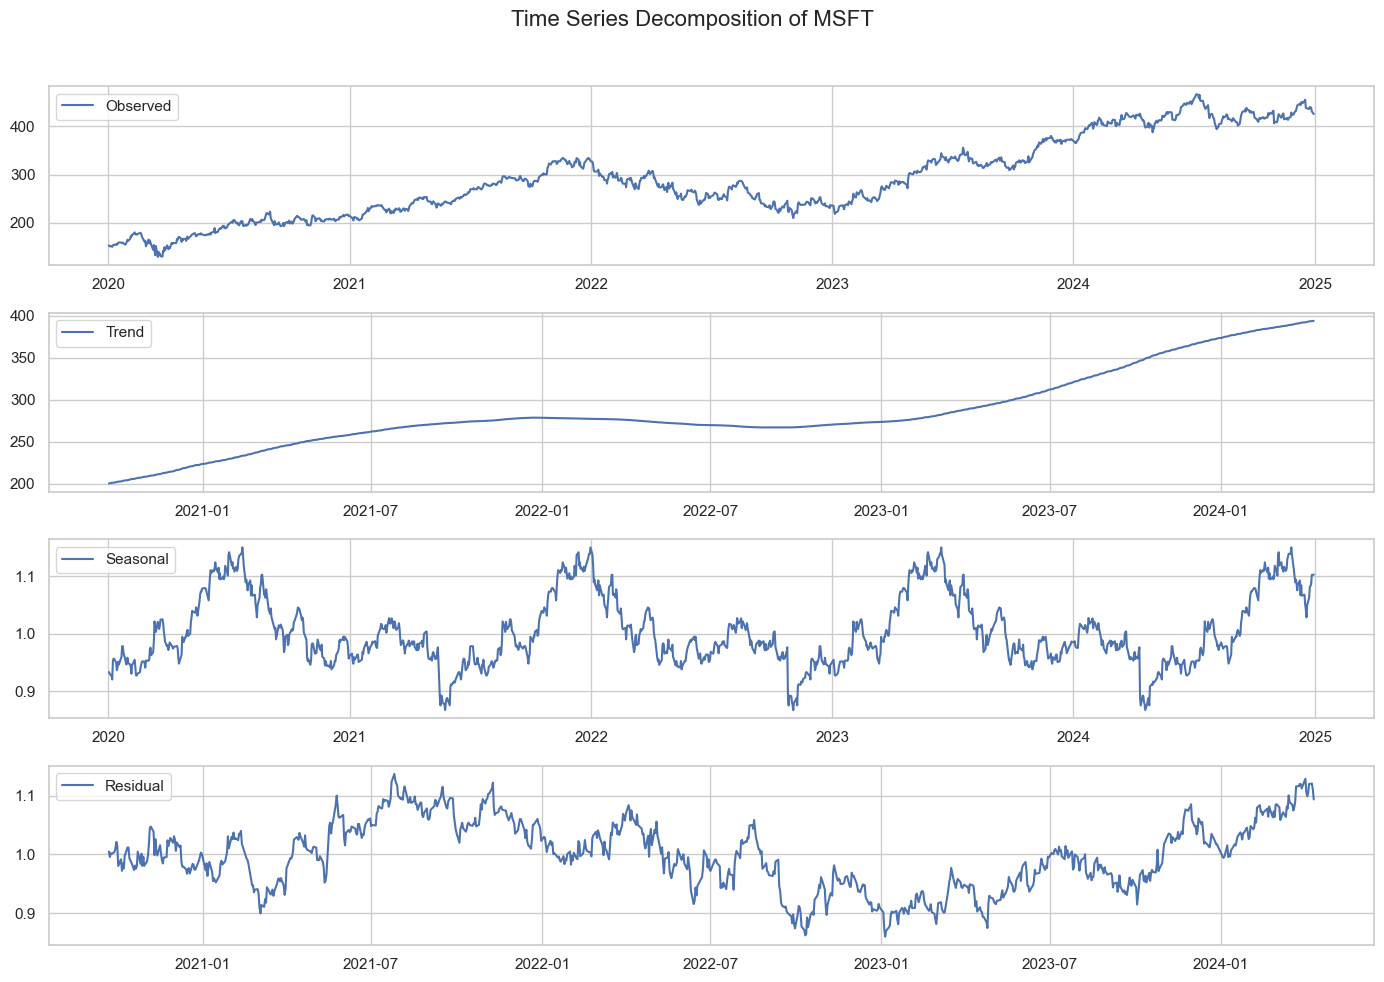

In [15]:
plot_decomposition(decomposed_msft, 'MSFT')

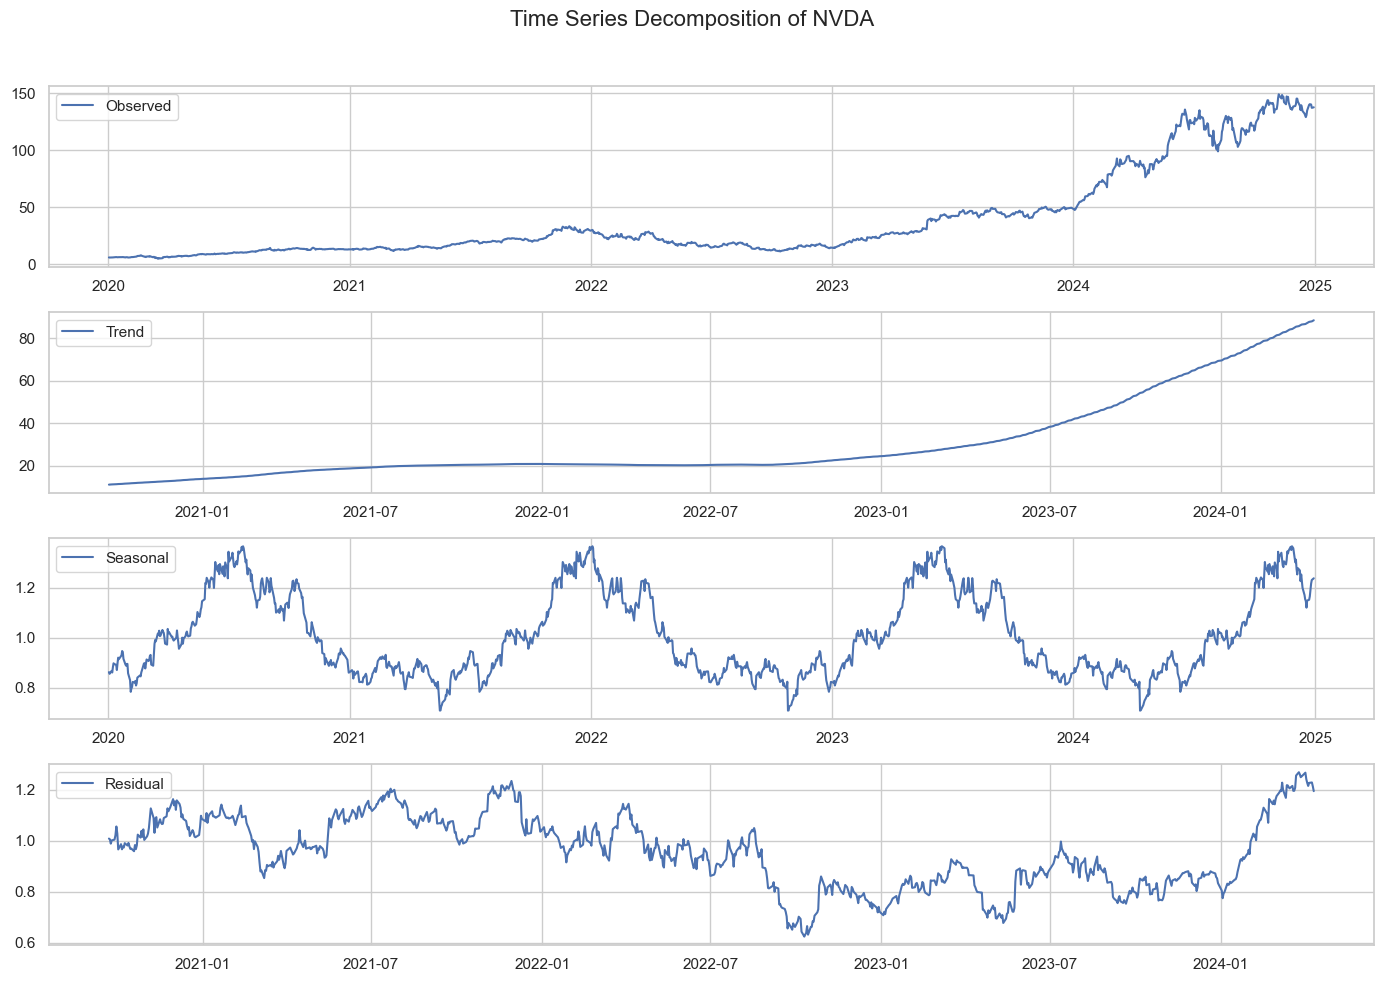

In [16]:
plot_decomposition(decomposed_nvda, 'NVDA')

### Stationarity Test
Perform stationarity tests such as the Augmented Dickey-Fuller test.

In [17]:
# Stationarity Test

from statsmodels.tsa.stattools import adfuller

# Define a function to perform the Augmented Dickey-Fuller test
def adf_test(series, ticker):
    result = adfuller(series.dropna())
    print(f'ADF Statistic for {ticker}: {result[0]}')
    print(f'p-value for {ticker}: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Perform the ADF test for each stock
print("Augmented Dickey-Fuller Test Results:\n")
adf_test(stock_data['Close']['TSLA'], 'TSLA')

Augmented Dickey-Fuller Test Results:

ADF Statistic for TSLA: -2.0293251544049102
p-value for TSLA: 0.27386487193353604
Critical Values:
   1%: -3.4356090875394525
   5%: -2.863862410805964
   10%: -2.568006480268158


Since the ADF statistic (-2.0293) is higher than all critical values and the p-value (0.2739) is greater than 0.05, TSLA's closing price time series is non-stationary. This implies that the stock price exhibits trends over time and does not revert to a constant mean, making it unsuitable for traditional time series forecasting models without transformation (e.g., differencing).

In [18]:
stock_data['TSLA'] = stock_data['Close']['TSLA'].diff()
adf_test(stock_data['TSLA'].dropna(), 'TSLA (Differenced)')


ADF Statistic for TSLA (Differenced): -6.6770646434296985
p-value for TSLA (Differenced): 4.437656784038087e-09
Critical Values:
   1%: -3.4356689751083374
   5%: -2.8638888336592387
   10%: -2.5680205519744055


The differenced TSLA closing prices are stationary at all significance levels (1%, 5%, 10%).

In [19]:
adf_test(stock_data['Close']['MSFT'], 'MSFT')

ADF Statistic for MSFT: -0.9450762261622117
p-value for MSFT: 0.7727661270442399
Critical Values:
   1%: -3.4356048614183443
   5%: -2.8638605461891617
   10%: -2.5680054872544145


Since the ADF statistic is not low enough and the p-value is large (0.7728), MSFT's closing price time series is non-stationary. This suggests that the stock price follows a trend over time and does not revert to a constant mean, making it unsuitable for direct time series modeling without differencing or other transformations.

In [20]:
stock_data['MSFT'] = stock_data['Close']['MSFT'].diff()
adf_test(stock_data['MSFT'].dropna(), 'MSFT (Differenced)')


ADF Statistic for MSFT (Differenced): -11.458755224751222
p-value for MSFT (Differenced): 5.621817118518414e-21
Critical Values:
   1%: -3.4356048614183443
   5%: -2.8638605461891617
   10%: -2.5680054872544145


The differenced MSFT closing prices are stationary, meaning they no longer exhibit trends and are ready for time series analysis.

In [21]:
adf_test(stock_data['Close']['NVDA'], 'NVDA')

ADF Statistic for NVDA: 1.1101206995144994
p-value for NVDA: 0.9953020797300528
Critical Values:
   1%: -3.4356560275160835
   5%: -2.8638831211270817
   10%: -2.568017509711682


Since the ADF statistic is not low enough and the p-value is large (0.7728), MSFT's closing price time series is non-stationary. This suggests that the stock price follows a trend over time and does not revert to a constant mean, making it unsuitable for direct time series modeling without differencing or other transformations.

In [22]:
stock_data['NVDA'] = stock_data['Close']['NVDA'].diff()
adf_test(stock_data['NVDA'].dropna(), 'NVDA (Differenced)')


ADF Statistic for NVDA (Differenced): -7.010171787095348
p-value for NVDA (Differenced): 6.9546799593516e-10
Critical Values:
   1%: -3.4356689751083374
   5%: -2.8638888336592387
   10%: -2.5680205519744055


The differenced NVDA closing prices are stationary, making them suitable for time series modeling and trading strategies.

#### Autocorrelation and Partial Autocorrelation Analysis
Analyze the autocorrelation and partial autocorrelation plots to understand the time series properties.

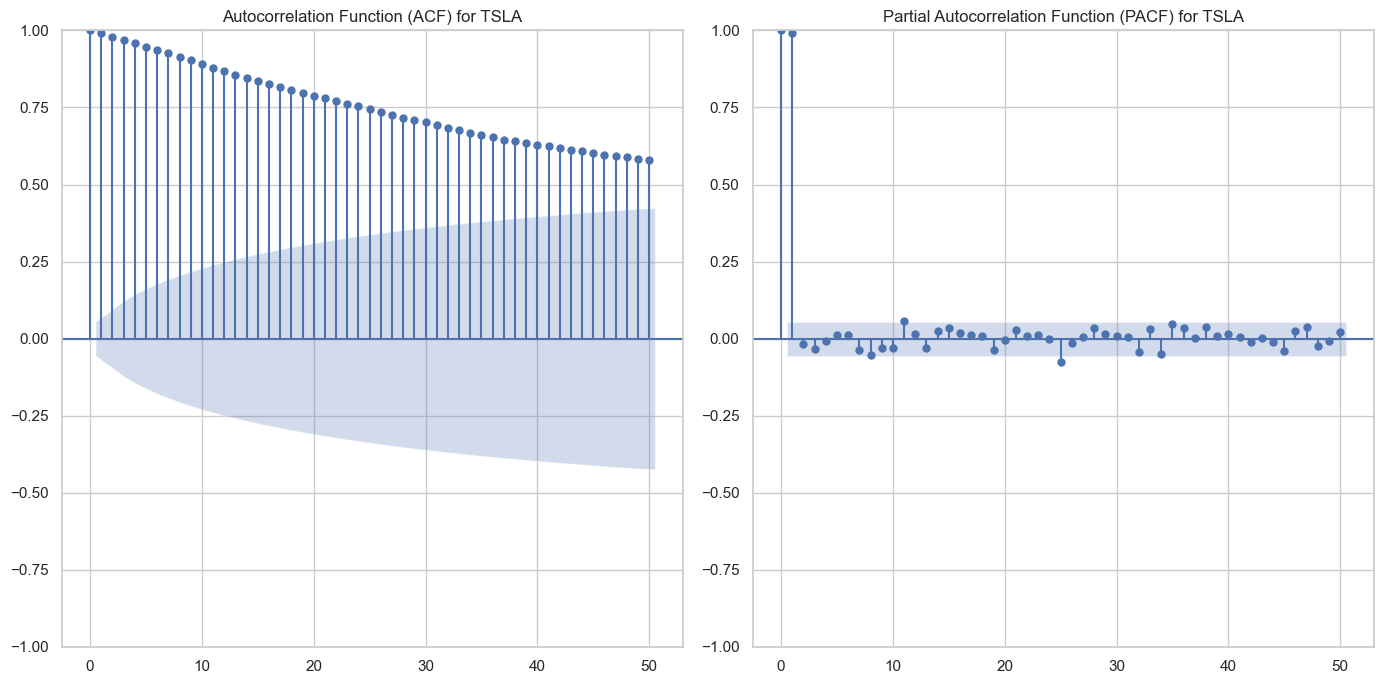

In [23]:
# Autocorrelation and Partial Autocorrelation Analysis

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Define a function to plot ACF and PACF
def plot_acf_pacf(data, ticker, lags=50):
    plt.figure(figsize=(14, 7))
    
    plt.subplot(121)
    plot_acf(data['Close'][ticker].dropna(), lags=lags, ax=plt.gca())
    plt.title(f'Autocorrelation Function (ACF) for {ticker}')
    
    plt.subplot(122)
    plot_pacf(data['Close'][ticker].dropna(), lags=lags, ax=plt.gca())
    plt.title(f'Partial Autocorrelation Function (PACF) for {ticker}')
    
    plt.tight_layout()
    plt.show()

# Plot ACF and PACF for each stock
plot_acf_pacf(stock_data, 'TSLA')

The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) analysis of TSLA stock data reveals a strong persistence in the price trend. The ACF shows a high correlation at lag 1, indicating that current prices are closely related to the previous prices, with a gradual decrease in correlation over time. The PACF analysis suggests that the stock's price is most influenced by the immediate previous value (lag 1), with higher lags providing little additional insight. This suggests that TSLA's price behavior exhibits momentum, and an autoregressive model of order 1 (AR(1)) may be appropriate for modeling the stock's time series.

In [24]:
plot_acf_pacf(stock_data, 'MSFT')

The MSFT stock exhibits strong momentum at short lags, with a clear relationship between consecutive prices. The ACF indicates a steady decline in correlation over time, while the PACF emphasizes the importance of the first lag in predicting future prices, with higher lags offering limited predictive value. This suggests that AR(1) models could be an effective approach for modeling MSFT stock prices.

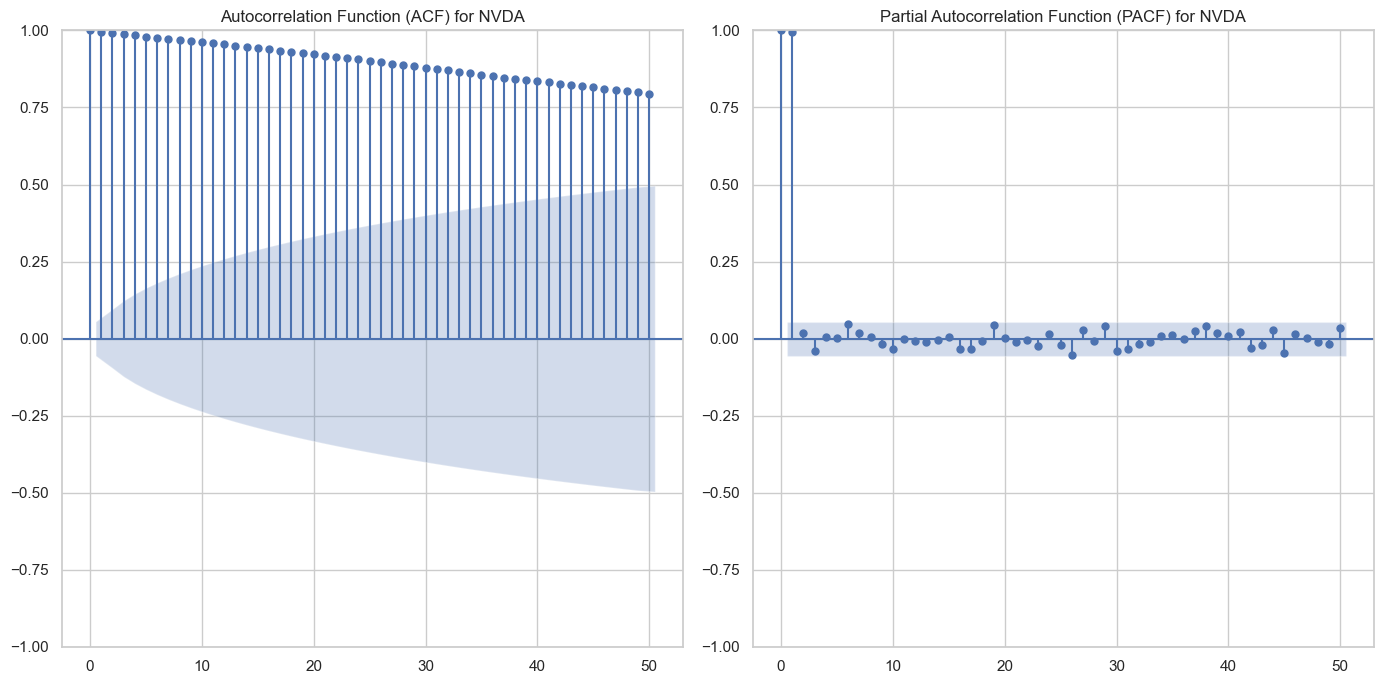

In [25]:
plot_acf_pacf(stock_data, 'NVDA')

This suggests that the NVDA stock price may follow a time series model with short- and medium-term dependencies, possibly requiring an autoregressive integrated moving average (ARIMA) model or another form of time series modeling that accounts for these correlations and partial correlations.

## 3b. Modeling and Forecast for Buy and Selling Strategy
Stock Price Forecasting and Trading Signal Generation with ARIMA

In [26]:
# Trading Strategy Implementation
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def prepare_differenced_data(data, ticker):
    """
    Prepare data with first-order differencing
    """
    series = data['Close'][ticker].copy()
    # Apply first difference
    differenced = series.diff().dropna()
    
    # Perform ADF test on differenced data
    adf_result = adfuller(differenced)
    is_stationary = adf_result[1] < 0.05
    
    if not is_stationary:
        print(f"Warning: {ticker} series might still not be stationary after first differencing")
    else:
        print(f"{ticker} is stationary after first differencing")
    
    return series, differenced

def calculate_metrics(actual, predicted):
    """
    Calculate evaluation metrics for forecasting
    """
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mse)
    
    # Directional accuracy: 1 if forecast direction matches actual, 0 if it does not
    actual_direction = np.sign(actual.diff().shift(-1)).iloc[-1]  # Last actual direction
    predicted_direction = np.sign(predicted.diff().shift(-1)).iloc[-1]  # Last predicted direction
    directional_accuracy = 1 if actual_direction == predicted_direction else 0
    
    # R-squared (Coefficient of Determination)
    r2 = r2_score(actual, predicted)
    
    return mse, mae, rmse, directional_accuracy, r2

def analyze_stock(data, ticker, p, q, forecast_steps=30):
    """
    Analyze a single stock with ARIMA model
    """
    try:
        print(f"\nAnalyzing {ticker}...")
        
        # Fit ARIMA model
        series, differenced = prepare_differenced_data(data, ticker)
        model = ARIMA(series, order=(p, 1, q))
        model_fit = model.fit()
        
        # Create figure with subplots
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
        
        # Plot original series and forecast
        ax1.plot(series, label='Actual', color='blue')
        
        # Get forecast with confidence intervals
        forecast = model_fit.get_forecast(steps=forecast_steps)
        mean_forecast = forecast.predicted_mean
        conf_int = forecast.conf_int()
        
        # Create forecast dates
        forecast_dates = pd.date_range(
            start=data.index[-1], 
            periods=forecast_steps+1, 
            inclusive='right'
        )
        
        # Plot forecast and confidence intervals
        ax1.plot(forecast_dates, mean_forecast, color='red', label='Forecast')
        ax1.fill_between(
            forecast_dates,
            conf_int.iloc[:, 0],
            conf_int.iloc[:, 1],
            color='red',
            alpha=0.1,
            label='95% Confidence Interval'
        )
        
        ax1.set_title(f'ARIMA({p},1,{q}) Forecast for {ticker}')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Price (USD)')
        ax1.legend()
        ax1.grid(True)
        
        # Plot differenced series
        ax2.plot(differenced.index, differenced, label='Differenced Series', color='green')
        ax2.set_title(f'First Difference of {ticker} Series')
        ax2.set_xlabel('Date')
        ax2.set_ylabel('Price Change')
        ax2.legend()
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()
        
        # Print model summary
        print(f"\n{ticker} ARIMA Model Summary:")
        print(model_fit.summary().tables[1])
        
        # Print forecast statistics
        print(f"\nForecast Statistics for {ticker}:")
        print(f"Last Actual Price: ${series.iloc[-1]:.2f}")
        print(f"Forecasted Price (next period): ${mean_forecast.iloc[0]:.2f}")
        print(f"95% Confidence Interval: (${conf_int.iloc[0,0]:.2f}, ${conf_int.iloc[0,1]:.2f})")
        
        # Trading signal
        signal = "Buy" if mean_forecast.iloc[0] > series.iloc[-1] else "Sell"
        print(f"Trading Signal: {signal}")
        
        # Calculate metrics
        mse, mae, rmse, directional_accuracy, r2 = calculate_metrics(series[-forecast_steps:], mean_forecast)
        print(f"Evaluation Metrics for {ticker}:")
        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"Mean Absolute Error (MAE): {mae:.4f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
        print(f"Directional Accuracy: {directional_accuracy * 100:.2f}%")
        print(f"R-squared (R²): {r2:.4f}")
        
        return {
            'model': model_fit,
            'forecast': mean_forecast,
            'conf_int': conf_int,
            'signal': signal,
            'metrics': {
                'MSE': mse,
                'MAE': mae,
                'RMSE': rmse,
                'Directional Accuracy': directional_accuracy,
                'R²': r2
            }
        }
        
    except Exception as e:
        print(f"Error analyzing {ticker}: {str(e)}")
        return None

# Example usage for individual stocks
def analyze_stock_wrapper(data, ticker, p=5, q=0, steps=30):
    """
    Wrapper function to analyze a single stock
    """
    print(f"\nStarting analysis for {ticker}")
    print("=" * 50)
    
    results = analyze_stock(data, ticker, p, q, steps)
    
    if results:
        print("\nAnalysis completed successfully")
    else:
        print("\nAnalysis failed")
    
    print("=" * 50)
    return results

# Now you can analyze each stock separately:
# For Tesla:
# tesla_results = analyze_stock_wrapper(stock_data, 'TSLA')

# For Microsoft:
# msft_results = analyze_stock_wrapper(stock_data, 'MSFT')

# For NVIDIA:
# nvda_results = analyze_stock_wrapper(stock_data, 'NVDA')



Starting analysis for TSLA

Analyzing TSLA...
TSLA is stationary after first differencing


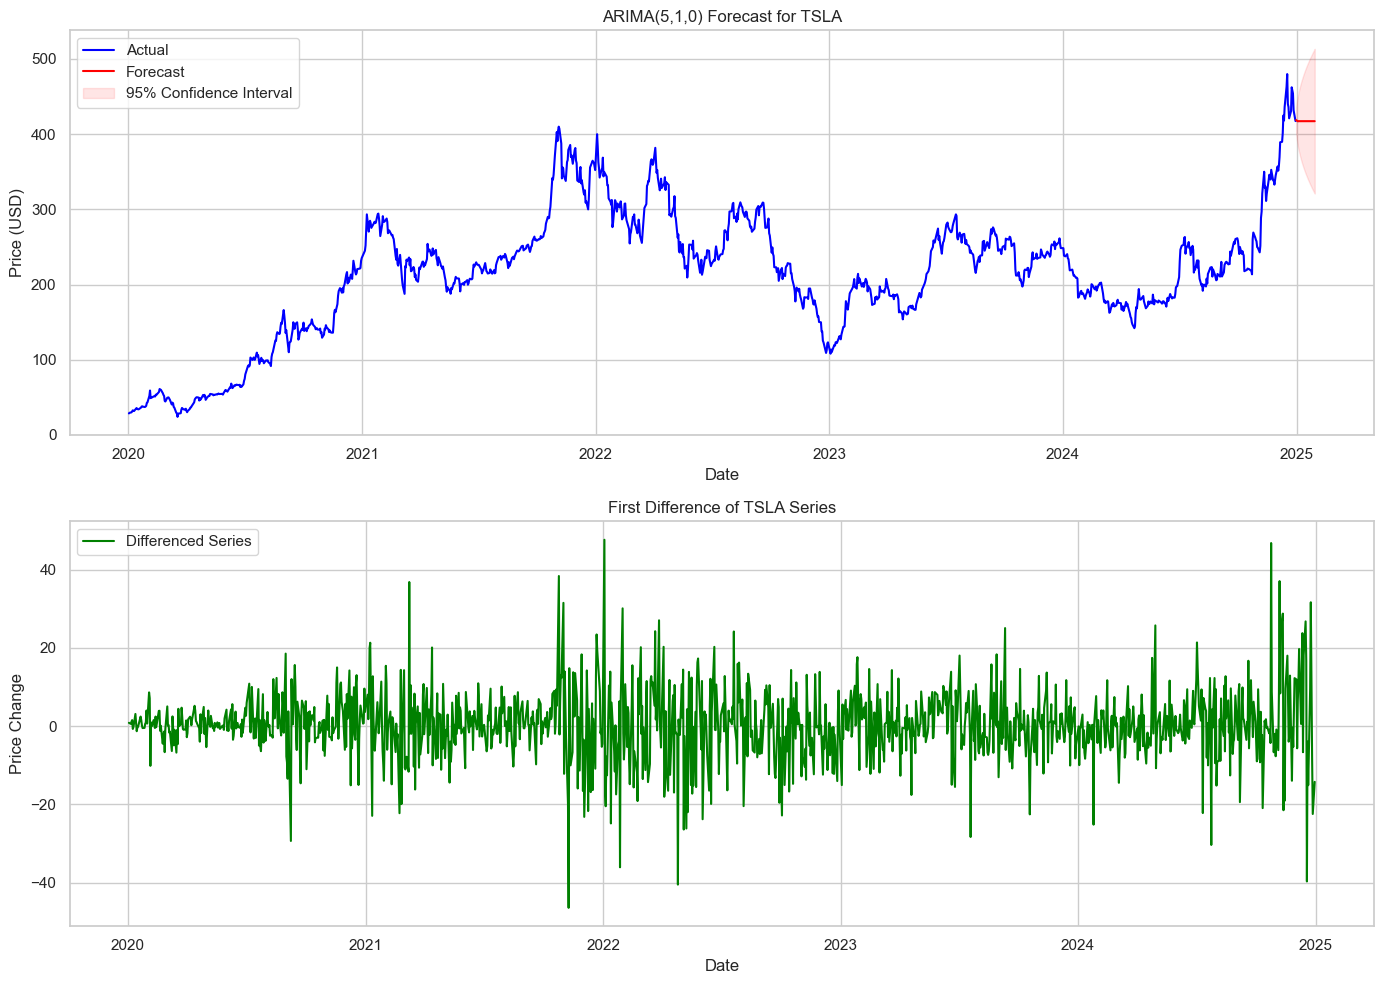


TSLA ARIMA Model Summary:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0072      0.024     -0.295      0.768      -0.055       0.041
ar.L2          0.0065      0.021      0.309      0.757      -0.035       0.048
ar.L3         -0.0104      0.025     -0.412      0.680      -0.060       0.039
ar.L4          0.0403      0.022      1.822      0.069      -0.003       0.084
ar.L5         -0.0121      0.023     -0.524      0.600      -0.057       0.033
sigma2        77.9847      1.837     42.448      0.000      74.384      81.586

Forecast Statistics for TSLA:
Last Actual Price: $417.41
Forecasted Price (next period): $418.61
95% Confidence Interval: ($401.30, $435.92)
Trading Signal: Buy
Evaluation Metrics for TSLA:
Mean Squared Error (MSE): 2940.6078
Mean Absolute Error (MAE): 45.8696
Root Mean Squared Error (RMSE): 54.2274
Directional Accuracy: 0.00%
R-squared (

In [27]:
tesla_results = analyze_stock_wrapper(stock_data, 'TSLA')

While the model provides a forecast price slightly higher than the last actual price, the overall performance, including evaluation metrics like RMSE and R², suggests that the model does not fit well. Additionally, the directional accuracy is 0%, which implies that the forecast direction did not align with the actual price direction.


Starting analysis for MSFT

Analyzing MSFT...
MSFT is stationary after first differencing


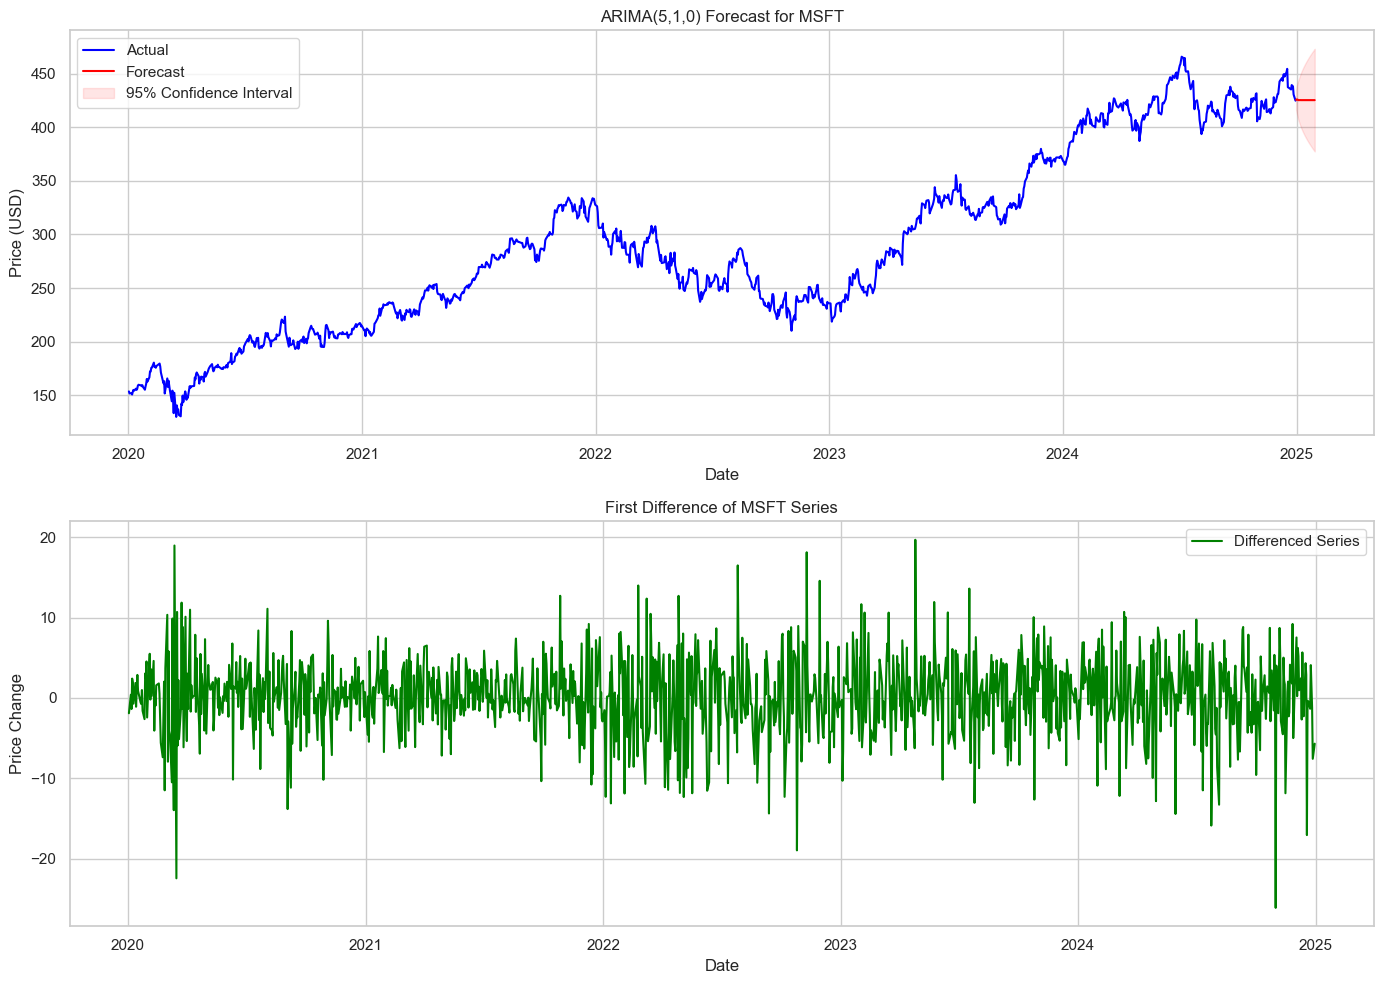


MSFT ARIMA Model Summary:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0841      0.024     -3.448      0.001      -0.132      -0.036
ar.L2         -0.0408      0.025     -1.610      0.107      -0.090       0.009
ar.L3         -0.0055      0.027     -0.200      0.842      -0.059       0.048
ar.L4          0.0096      0.026      0.366      0.715      -0.042       0.061
ar.L5          0.0416      0.027      1.563      0.118      -0.011       0.094
sigma2        23.2278      0.708     32.826      0.000      21.841      24.615

Forecast Statistics for MSFT:
Last Actual Price: $424.83
Forecasted Price (next period): $425.61
95% Confidence Interval: ($416.16, $435.05)
Trading Signal: Buy
Evaluation Metrics for MSFT:
Mean Squared Error (MSE): 213.3976
Mean Absolute Error (MAE): 12.5719
Root Mean Squared Error (RMSE): 14.6081
Directional Accuracy: 0.00%
R-squared (R

In [28]:
# For Microsoft:
msft_results = analyze_stock_wrapper(stock_data, 'MSFT')


Starting analysis for NVDA

Analyzing NVDA...
NVDA is stationary after first differencing


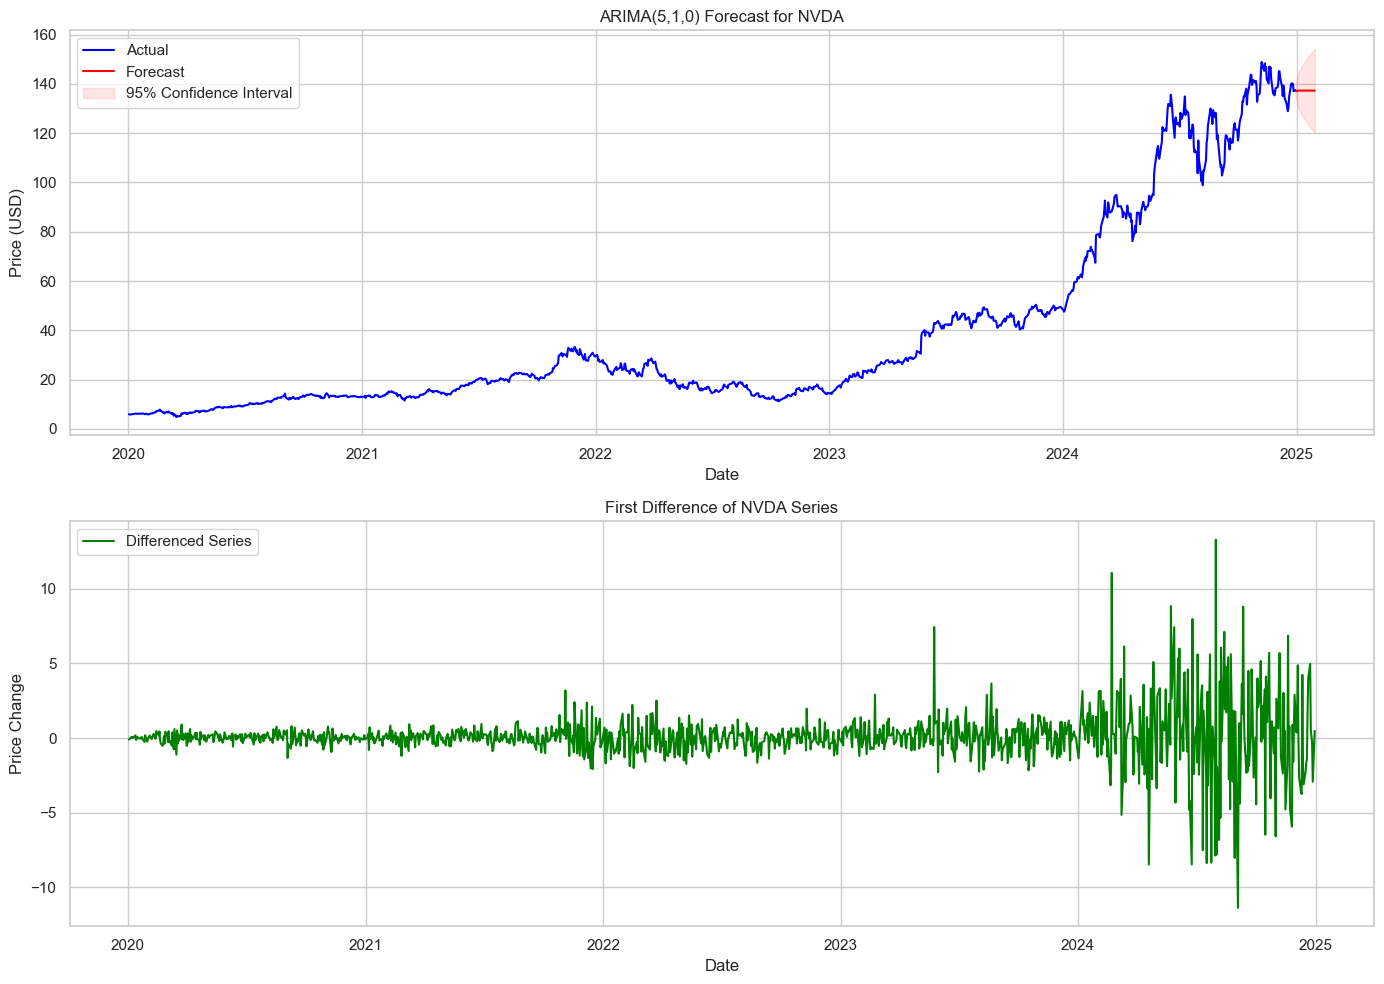


NVDA ARIMA Model Summary:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0559      0.014     -3.968      0.000      -0.084      -0.028
ar.L2          0.0685      0.013      5.145      0.000       0.042       0.095
ar.L3         -0.0322      0.015     -2.095      0.036      -0.062      -0.002
ar.L4         -0.0066      0.014     -0.470      0.638      -0.034       0.021
ar.L5         -0.0534      0.014     -3.898      0.000      -0.080      -0.027
sigma2         2.8471      0.045     63.940      0.000       2.760       2.934

Forecast Statistics for NVDA:
Last Actual Price: $137.49
Forecasted Price (next period): $137.00
95% Confidence Interval: ($133.70, $140.31)
Trading Signal: Sell
Evaluation Metrics for NVDA:
Mean Squared Error (MSE): 23.9709
Mean Absolute Error (MAE): 3.9085
Root Mean Squared Error (RMSE): 4.8960
Directional Accuracy: 0.00%
R-squared (R²)

In [29]:
# For NVIDIA:
nvda_results = analyze_stock_wrapper(stock_data, 'NVDA')

In [30]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

def prepare_differenced_data(data, ticker):
    """
    Prepare data with first-order differencing
    """
    series = data['Close'][ticker].copy()
    # Apply first difference
    differenced = series.diff().dropna()
    
    # Perform ADF test on differenced data
    adf_result = adfuller(differenced)
    is_stationary = adf_result[1] < 0.05
    
    if not is_stationary:
        print(f"Warning: {ticker} series might still not be stationary after first differencing")
    else:
        print(f"{ticker} is stationary after first differencing")
    
    return series, differenced

def calculate_metrics(actual, predicted):
    """
    Calculate evaluation metrics for forecasting
    """
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mse)
    
    # Directional accuracy: 1 if forecast direction matches actual, 0 if it does not
    actual_direction = np.sign(actual.diff().shift(-1)).iloc[-1]  # Last actual direction
    predicted_direction = np.sign(predicted.diff().shift(-1)).iloc[-1]  # Last predicted direction
    directional_accuracy = 1 if actual_direction == predicted_direction else 0
    
    # R-squared (Coefficient of Determination)
    r2 = r2_score(actual, predicted)
    
    return mse, mae, rmse, directional_accuracy, r2

def grid_search_arima(data, ticker, p_range, d_range, q_range, forecast_steps=30):
    """
    Perform grid search to tune p, d, q parameters for ARIMA model
    """
    best_model = None
    best_score = float('inf')
    best_params = None
    best_forecast = None
    best_conf_int = None

    for p, d, q in product(p_range, d_range, q_range):
        try:
            print(f"Testing ARIMA({p},{d},{q})...")
            series, differenced = prepare_differenced_data(data, ticker)
            
            # Fit ARIMA model
            model = ARIMA(series, order=(p, d, q))
            model_fit = model.fit()
            
            # Get forecast
            forecast = model_fit.get_forecast(steps=forecast_steps)
            mean_forecast = forecast.predicted_mean
            conf_int = forecast.conf_int()
            
            # Calculate metrics
            mse, mae, rmse, directional_accuracy, r2 = calculate_metrics(series[-forecast_steps:], mean_forecast)
            if mse < best_score:
                best_model = model_fit
                best_score = mse
                best_params = (p, d, q)
                best_forecast = mean_forecast
                best_conf_int = conf_int
            
        except Exception as e:
            print(f"Error with ARIMA({p},{d},{q}): {str(e)}")
            continue

    print(f"\nBest ARIMA Model: ARIMA({best_params[0]},{best_params[1]},{best_params[2]})")
    return best_model, best_forecast, best_conf_int, best_params

def analyze_stock(data, ticker, p_range, d_range, q_range, forecast_steps=30):
    """
    Analyze a single stock with ARIMA model
    """
    try:
        print(f"\nAnalyzing {ticker}...")
        
        # Perform Grid Search to find the best ARIMA parameters
        best_model, best_forecast, best_conf_int, best_params = grid_search_arima(
            data, ticker, p_range, d_range, q_range, forecast_steps
        )
        
        # Create figure with subplots
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
        
        # Plot original series and forecast
        series, differenced = prepare_differenced_data(data, ticker)
        ax1.plot(series, label='Actual', color='blue')
        
        # Create forecast dates
        forecast_dates = pd.date_range(
            start=data.index[-1], 
            periods=forecast_steps+1, 
            inclusive='right'
        )
        
        # Plot forecast and confidence intervals
        ax1.plot(forecast_dates, best_forecast, color='red', label='Forecast')
        ax1.fill_between(
            forecast_dates,
            best_conf_int.iloc[:, 0],
            best_conf_int.iloc[:, 1],
            color='red',
            alpha=0.1,
            label='95% Confidence Interval'
        )
        
        ax1.set_title(f'Best ARIMA Forecast for {ticker}')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Price (USD)')
        ax1.legend()
        ax1.grid(True)
        
        # Plot differenced series
        ax2.plot(differenced.index, differenced, label='Differenced Series', color='green')
        ax2.set_title(f'First Difference of {ticker} Series')
        ax2.set_xlabel('Date')
        ax2.set_ylabel('Price Change')
        ax2.legend()
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()
        
        # Print model summary
        print(f"\nBest ARIMA Model Summary ({best_params[0]},{best_params[1]},{best_params[2]}):")
        print(best_model.summary().tables[1])
        
        # Print forecast statistics
        print(f"\nForecast Statistics for {ticker}:")
        print(f"Last Actual Price: ${series.iloc[-1]:.2f}")
        print(f"Forecasted Price (next period): ${best_forecast.iloc[0]:.2f}")
        print(f"95% Confidence Interval: (${best_conf_int.iloc[0,0]:.2f}, ${best_conf_int.iloc[0,1]:.2f})")
        
        # Trading signal
        signal = "Buy" if best_forecast.iloc[0] > series.iloc[-1] else "Sell"
        print(f"Trading Signal: {signal}")
        
        # Calculate metrics
        mse, mae, rmse, directional_accuracy, r2 = calculate_metrics(series[-forecast_steps:], best_forecast)
        print(f"Evaluation Metrics for {ticker}:")
        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"Mean Absolute Error (MAE): {mae:.4f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
        print(f"Directional Accuracy: {directional_accuracy * 100:.2f}%")
        print(f"R-squared (R²): {r2:.4f}")
        
        return {
            'model': best_model,
            'forecast': best_forecast,
            'conf_int': best_conf_int,
            'signal': signal,
            'metrics': {
                'MSE': mse,
                'MAE': mae,
                'RMSE': rmse,
                'Directional Accuracy': directional_accuracy,
                'R²': r2
            }
        }
        
    except Exception as e:
        print(f"Error analyzing {ticker}: {str(e)}")
        return None

# Example usage for individual stocks
def analyze_stock_wrapper(data, ticker, p_range, d_range, q_range, steps=30):
    """
    Wrapper function to analyze a single stock
    """
    print(f"\nStarting analysis for {ticker}")
    print("=" * 50)
    
    results = analyze_stock(data, ticker, p_range, d_range, q_range, steps)
    
    if results:
        print("\nAnalysis completed successfully")
    else:
        print("\nAnalysis failed")
    
    print("=" * 50)
    return results

# Now you can analyze each stock separately by specifying ranges for p, d, q.
# Example:
# p_range = range(1, 6)
# d_range = [1]
# q_range = range(0, 3)
# tesla_results = analyze_stock_wrapper(stock_data, 'TSLA', p_range, d_range, q_range)



Starting analysis for TSLA

Analyzing TSLA...
Testing ARIMA(1,1,0)...
TSLA is stationary after first differencing
Testing ARIMA(1,1,1)...
TSLA is stationary after first differencing
Testing ARIMA(1,1,2)...
TSLA is stationary after first differencing
Testing ARIMA(2,1,0)...
TSLA is stationary after first differencing
Testing ARIMA(2,1,1)...
TSLA is stationary after first differencing
Testing ARIMA(2,1,2)...
TSLA is stationary after first differencing
Testing ARIMA(3,1,0)...
TSLA is stationary after first differencing
Testing ARIMA(3,1,1)...
TSLA is stationary after first differencing
Testing ARIMA(3,1,2)...
TSLA is stationary after first differencing
Testing ARIMA(4,1,0)...
TSLA is stationary after first differencing
Testing ARIMA(4,1,1)...
TSLA is stationary after first differencing
Testing ARIMA(4,1,2)...
TSLA is stationary after first differencing
Testing ARIMA(5,1,0)...
TSLA is stationary after first differencing
Testing ARIMA(5,1,1)...
TSLA is stationary after first differencing
T

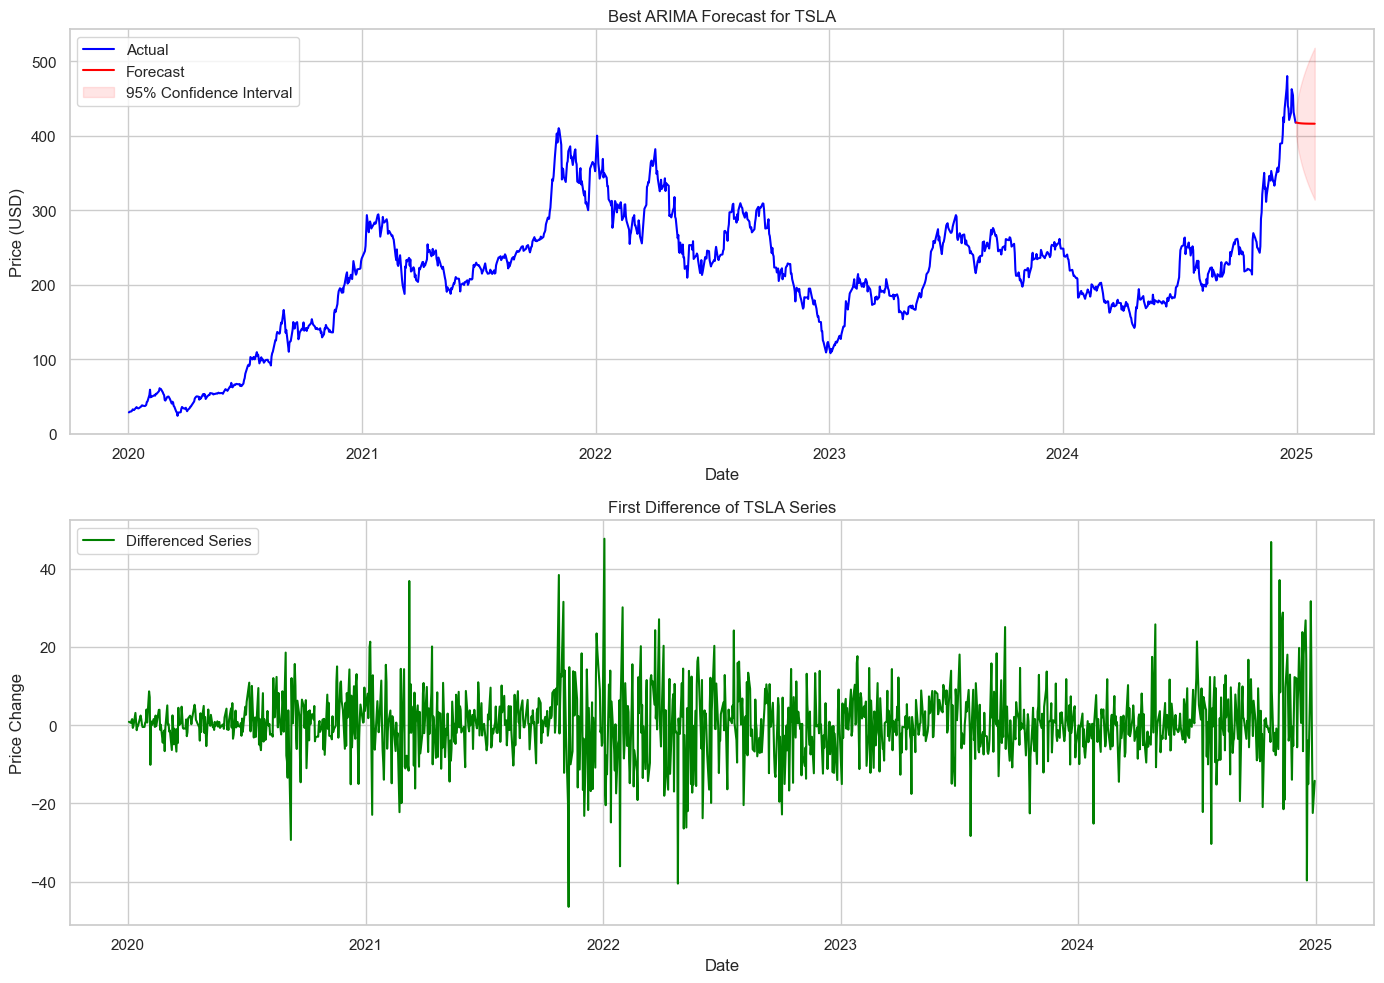


Best ARIMA Model Summary (3,1,2):
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1495      0.217     -0.688      0.491      -0.575       0.276
ar.L2          0.8509      0.208      4.082      0.000       0.442       1.259
ar.L3          0.0255      0.027      0.930      0.353      -0.028       0.079
ma.L1          0.1409      0.213      0.661      0.509      -0.277       0.559
ma.L2         -0.8388      0.217     -3.863      0.000      -1.264      -0.413
sigma2        78.0364      1.868     41.780      0.000      74.376      81.697

Forecast Statistics for TSLA:
Last Actual Price: $417.41
Forecasted Price (next period): $417.59
95% Confidence Interval: ($400.28, $434.91)
Trading Signal: Buy
Evaluation Metrics for TSLA:
Mean Squared Error (MSE): 2913.3936
Mean Absolute Error (MAE): 45.9659
Root Mean Squared Error (RMSE): 53.9759
Directional Accuracy: 0.00%
R-s

In [31]:
p_range = range(1, 6)
d_range = [1]
q_range = range(0, 3)
tesla_results = analyze_stock_wrapper(stock_data, 'TSLA', p_range, d_range, q_range)

Although the model suggests a Buy signal with a forecasted price of $417.59 (slightly above the last actual price of $417.41), the overall model performance is suboptimal. This suggests that further improvements in model selection, tuning, or data preprocessing are needed to enhance forecasting accuracy and reliability.

## 4. Trading Strategy Implementation
Implement trading strategies for single stock with multiple strategies and single strategy with multiple stocks.

We will implement and test multiple trading strategies:
1. Moving Average Crossover
2. Mean Reversion
3. Momentum Strategy

#### 1. Moving Average Strategy

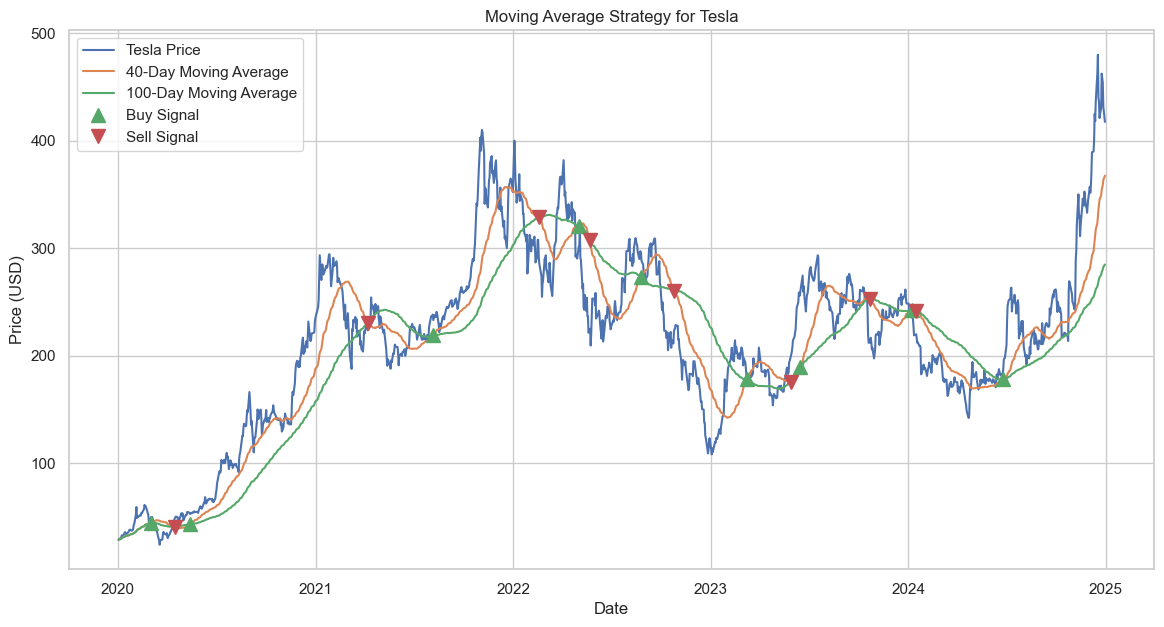

In [32]:
# Select Tesla stock data for strategy implementation
tesla_data = stock_data['Close']['TSLA']

# Moving Average Strategy
def moving_average_strategy(data, short_window, long_window):
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data
    signals['short_mavg'] = data.rolling(window=short_window, min_periods=1, center=False).mean()
    signals['long_mavg'] = data.rolling(window=long_window, min_periods=1, center=False).mean()
    signals['signal'] = 0.0
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['positions'] = signals['signal'].diff()
    return signals

# Implement Moving Average Strategy
short_window = 40
long_window = 100
signals = moving_average_strategy(tesla_data, short_window, long_window)

# Plot Moving Average Strategy
plt.figure(figsize=(14, 7))
plt.plot(signals['price'], label='Tesla Price')
plt.plot(signals['short_mavg'], label='40-Day Moving Average')
plt.plot(signals['long_mavg'], label='100-Day Moving Average')
plt.plot(signals.loc[signals.positions == 1.0].index, signals.short_mavg[signals.positions == 1.0], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(signals.loc[signals.positions == -1.0].index, signals.short_mavg[signals.positions == -1.0], 'v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.title('Moving Average Strategy for Tesla')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

The moving average strategy for Tesla stock (TSLA) was implemented using a 40-day short-term moving average and a 100-day long-term moving average. The strategy identifies buy and sell signals based on the crossing of these moving averages. When the short-term moving average exceeds the long-term moving average, a Buy signal is generated, and when the short-term moving average falls below the long-term moving average, a Sell signal is triggered. The plotted chart shows Tesla's stock price, the two moving averages, and the points of buy and sell signals.

#### 2. Bollinger Bands Strategy

In [33]:
# Bollinger Bands Strategy
def bollinger_bands_strategy(data, window, no_of_std):
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data
    signals['rolling_mean'] = data.rolling(window=window).mean()
    signals['rolling_std'] = data.rolling(window=window).std()
    signals['upper_band'] = signals['rolling_mean'] + (signals['rolling_std'] * no_of_std)
    signals['lower_band'] = signals['rolling_mean'] - (signals['rolling_std'] * no_of_std)
    signals['signal'] = 0.0
    signals['signal'][window:] = np.where(signals['price'][window:] > signals['upper_band'][window:], -1.0, 0.0)
    signals['signal'][window:] = np.where(signals['price'][window:] < signals['lower_band'][window:], 1.0, signals['signal'][window:])
    signals['positions'] = signals['signal'].diff()
    return signals

# Implement Bollinger Bands Strategy
window = 20
no_of_std = 2
bollinger_signals = bollinger_bands_strategy(tesla_data, window, no_of_std)

# Plot Bollinger Bands Strategy
plt.figure(figsize=(14, 7))
plt.plot(bollinger_signals['price'], label='Tesla Price')
plt.plot(bollinger_signals['rolling_mean'], label='20-Day Moving Average')
plt.plot(bollinger_signals['upper_band'], label='Upper Bollinger Band')
plt.plot(bollinger_signals['lower_band'], label='Lower Bollinger Band')
plt.plot(bollinger_signals.loc[bollinger_signals.positions == 1.0].index, bollinger_signals.price[bollinger_signals.positions == 1.0], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(bollinger_signals.loc[bollinger_signals.positions == -1.0].index, bollinger_signals.price[bollinger_signals.positions == -1.0], 'v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.title('Bollinger Bands Strategy for Tesla')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

The Bollinger Bands strategy for Tesla stock (TSLA) was implemented using a 20-day moving average with 2 standard deviations for the upper and lower bands. The strategy generates buy and sell signals based on the stock price’s relationship with the bands. A Buy signal occurs when the price falls below the lower band (indicating potential undervaluation), while a Sell signal is triggered when the price rises above the upper band (indicating potential overvaluation). The chart displays Tesla's stock price, the 20-day moving average, the upper and lower Bollinger Bands, and the points where buy and sell signals occur.

#### 3. RSI Strategy

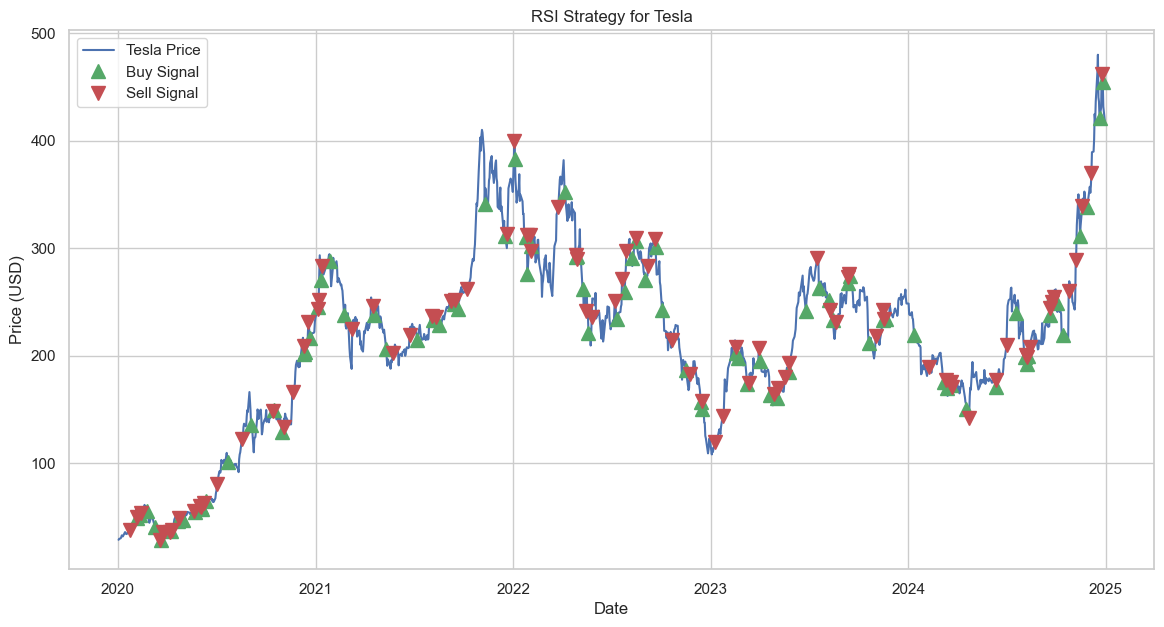

In [34]:
# RSI Strategy
def rsi_strategy(data, window, overbought, oversold):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data
    signals['rsi'] = rsi
    signals['signal'] = 0.0
    signals['signal'][window:] = np.where(signals['rsi'][window:] > overbought, -1.0, 0.0)
    signals['signal'][window:] = np.where(signals['rsi'][window:] < oversold, 1.0, signals['signal'][window:])
    signals['positions'] = signals['signal'].diff()
    return signals

# Implement RSI Strategy
rsi_window = 14
overbought = 70
oversold = 30
rsi_signals = rsi_strategy(tesla_data, rsi_window, overbought, oversold)

# Plot RSI Strategy
plt.figure(figsize=(14, 7))
plt.plot(rsi_signals['price'], label='Tesla Price')
plt.plot(rsi_signals.loc[rsi_signals.positions == 1.0].index, rsi_signals.price[rsi_signals.positions == 1.0], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(rsi_signals.loc[rsi_signals.positions == -1.0].index, rsi_signals.price[rsi_signals.positions == -1.0], 'v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.title('RSI Strategy for Tesla')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


The RSI (Relative Strength Index) strategy for Tesla stock (TSLA) was implemented using a 14-day window, with thresholds for overbought at 70 and oversold at 30. The strategy generates Buy signals when the RSI falls below the oversold threshold (indicating the stock may be undervalued) and Sell signals when the RSI exceeds the overbought threshold (indicating the stock may be overvalued). The chart displays Tesla's stock price along with the buy and sell signals, providing a visual representation of the points where the RSI strategy suggests entering or exiting the market.

#### 4. Strategies Comprison

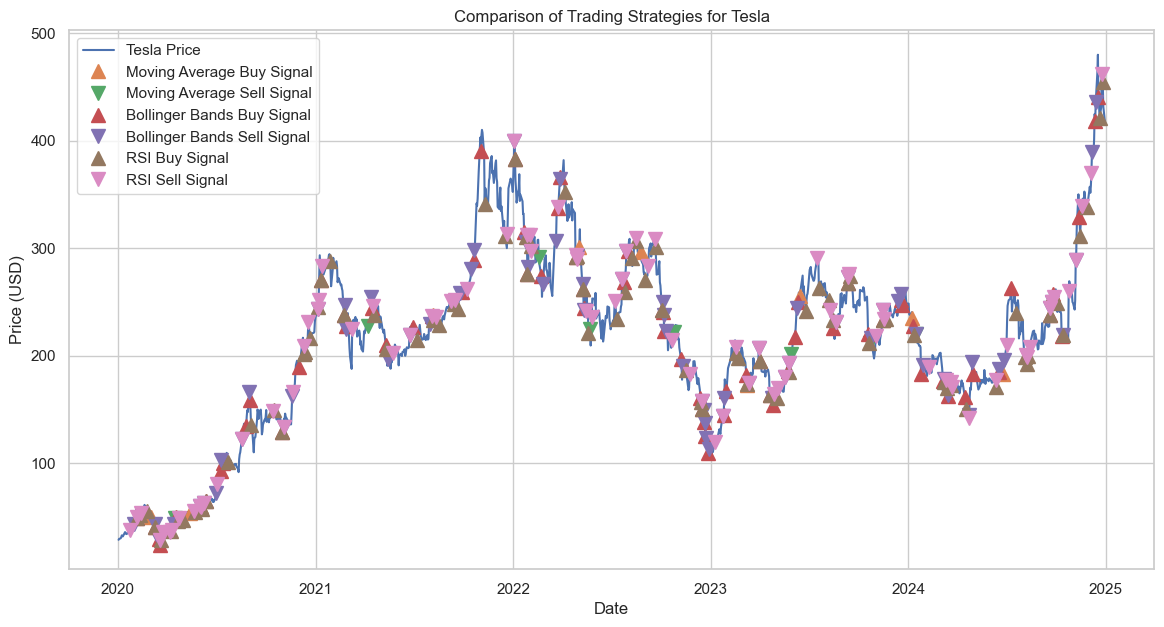

In [35]:
# Compare Strategies
strategies = {
    'Moving Average': signals,
    'Bollinger Bands': bollinger_signals,
    'RSI': rsi_signals
}

# Plot comparison of strategies
plt.figure(figsize=(14, 7))
plt.plot(tesla_data, label='Tesla Price')
for strategy_name, strategy_signals in strategies.items():
    plt.plot(strategy_signals.loc[strategy_signals.positions == 1.0].index, strategy_signals.price[strategy_signals.positions == 1.0], '^', markersize=10, lw=0, label=f'{strategy_name} Buy Signal')
    plt.plot(strategy_signals.loc[strategy_signals.positions == -1.0].index, strategy_signals.price[strategy_signals.positions == -1.0], 'v', markersize=10, lw=0, label=f'{strategy_name} Sell Signal')
plt.title('Comparison of Trading Strategies for Tesla')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

The comparison of three trading strategies (Moving Average, Bollinger Bands, and RSI) for Tesla stock (TSLA) is visualized on a single plot. The chart displays the Tesla stock price along with Buy and Sell signals for each strategy, represented by green upward triangles and red downward triangles, respectively. This comparison allows for an analysis of how each strategy performs over time and provides insights into the points where different strategies suggest entering or exiting the market.

## 5. Performance Evaluation

Let's evaluate the performance of each strategy across all stocks.

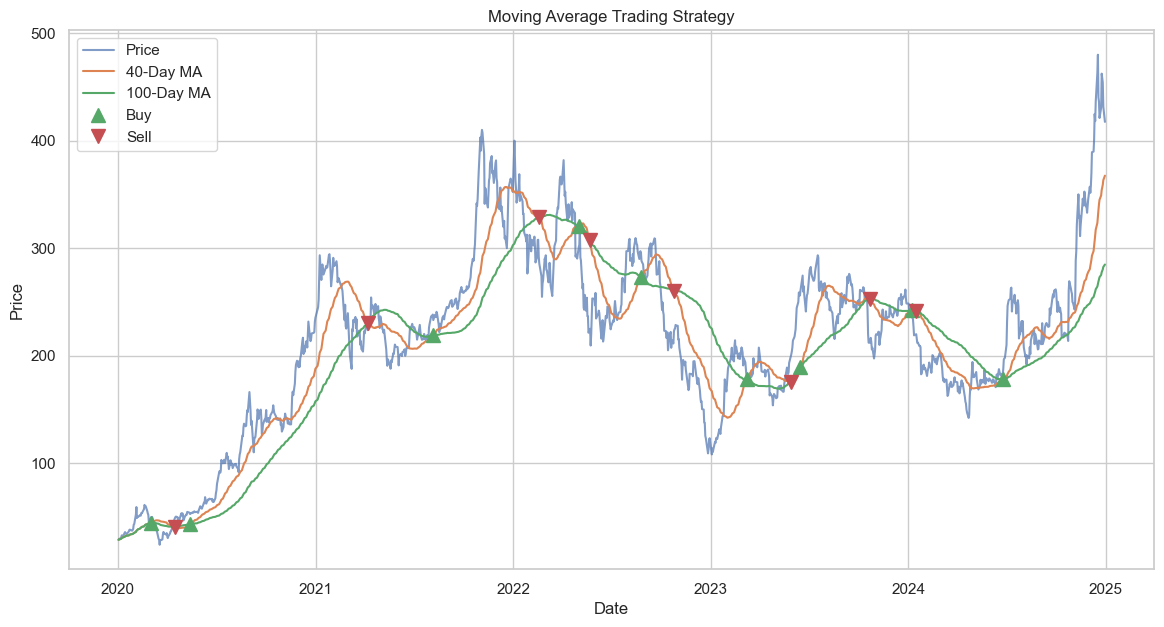


MovingAverageStrategy Performance:
Total Return: 2.4894
Annual Return: 0.4995
Sharpe Ratio: 0.9345
Max Drawdown: -0.9125


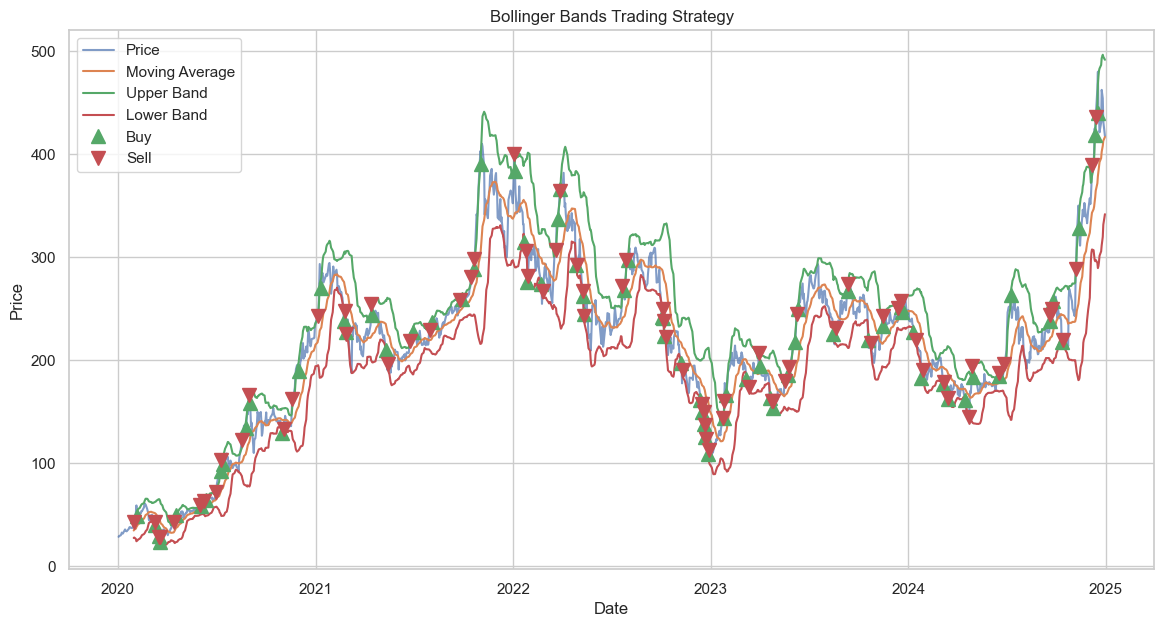


BollingerBandsStrategy Performance:
Total Return: -1.7183
Annual Return: -0.3447
Sharpe Ratio: -1.2190
Max Drawdown: -1.8485


In [36]:
class TradingStrategy:
    def __init__(self, data):
        self.data = data
        self.signals = pd.DataFrame(index=data.index)
        self.signals['price'] = data
        
    def calculate_signals(self):
        raise NotImplementedError("Subclass must implement calculate_signals()")
        
    def evaluate_performance(self):
        """Calculate strategy performance metrics"""
        returns = self.signals['price'].pct_change()
        strategy_returns = returns * self.signals['signal'].shift(1)
        
        performance = {
            'Total Return': strategy_returns.sum(),
            'Annual Return': strategy_returns.mean() * 252,
            'Sharpe Ratio': strategy_returns.mean() / strategy_returns.std() * np.sqrt(252),
            'Max Drawdown': (strategy_returns.cumsum() - strategy_returns.cumsum().expanding().max()).min()
        }
        return performance

class MovingAverageStrategy(TradingStrategy):
    def __init__(self, data, short_window=40, long_window=100):
        super().__init__(data)
        self.short_window = short_window
        self.long_window = long_window
        
    def calculate_signals(self):
        # Calculate moving averages
        self.signals['short_mavg'] = self.data.rolling(
            window=self.short_window, min_periods=1).mean()
        self.signals['long_mavg'] = self.data.rolling(
            window=self.long_window, min_periods=1).mean()
        
        # Initialize signal column with zeros
        self.signals['signal'] = 0.0
        
        # Create boolean mask for the condition
        mask = self.signals.index >= self.signals.index[self.short_window]
        
        # Use .loc to avoid chained assignment
        self.signals.loc[mask, 'signal'] = np.where(
            self.signals.loc[mask, 'short_mavg'] > self.signals.loc[mask, 'long_mavg'],
            1.0, 0.0
        )
        
        # Calculate positions
        self.signals['positions'] = self.signals['signal'].diff()
        
        return self.signals
    
    def plot_signals(self):
        plt.figure(figsize=(14, 7))
        plt.plot(self.signals['price'], label='Price', alpha=0.7)
        plt.plot(self.signals['short_mavg'], 
                label=f'{self.short_window}-Day MA')
        plt.plot(self.signals['long_mavg'], 
                label=f'{self.long_window}-Day MA')
        
        # Plot buy/sell signals
        buy_signals = self.signals.loc[self.signals.positions == 1.0]
        sell_signals = self.signals.loc[self.signals.positions == -1.0]
        
        plt.plot(buy_signals.index, 
                buy_signals['short_mavg'],
                '^', markersize=10, color='g', label='Buy')
        plt.plot(sell_signals.index,
                sell_signals['short_mavg'],
                'v', markersize=10, color='r', label='Sell')
        
        plt.title('Moving Average Trading Strategy')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

class BollingerBandsStrategy(TradingStrategy):
    def __init__(self, data, window=20, no_of_std=2):
        super().__init__(data)
        self.window = window
        self.no_of_std = no_of_std
        
    def calculate_signals(self):
        # Calculate Bollinger Bands components
        self.signals['rolling_mean'] = self.data.rolling(window=self.window).mean()
        self.signals['rolling_std'] = self.data.rolling(window=self.window).std()
        self.signals['upper_band'] = (self.signals['rolling_mean'] + 
                                    (self.signals['rolling_std'] * self.no_of_std))
        self.signals['lower_band'] = (self.signals['rolling_mean'] - 
                                    (self.signals['rolling_std'] * self.no_of_std))
        
        # Initialize signal column
        self.signals['signal'] = 0.0
        
        # Create mask for valid entries
        mask = self.signals.index >= self.signals.index[self.window]
        
        # Use .loc to avoid chained assignment
        self.signals.loc[mask, 'signal'] = np.where(
            self.signals.loc[mask, 'price'] < self.signals.loc[mask, 'lower_band'],
            1.0,
            np.where(
                self.signals.loc[mask, 'price'] > self.signals.loc[mask, 'upper_band'],
                -1.0,
                0.0
            )
        )
        
        # Calculate positions
        self.signals['positions'] = self.signals['signal'].diff()
        
        return self.signals
    
    def plot_signals(self):
        plt.figure(figsize=(14, 7))
        plt.plot(self.signals['price'], label='Price', alpha=0.7)
        plt.plot(self.signals['rolling_mean'], label='Moving Average')
        plt.plot(self.signals['upper_band'], label='Upper Band')
        plt.plot(self.signals['lower_band'], label='Lower Band')
        
        # Plot buy/sell signals
        buy_signals = self.signals.loc[self.signals.positions == 1.0]
        sell_signals = self.signals.loc[self.signals.positions == -1.0]
        
        plt.plot(buy_signals.index,
                buy_signals['price'],
                '^', markersize=10, color='g', label='Buy')
        plt.plot(sell_signals.index,
                sell_signals['price'],
                'v', markersize=10, color='r', label='Sell')
        
        plt.title('Bollinger Bands Trading Strategy')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

# Usage example
def run_strategy_analysis(data, strategy_class, **strategy_params):
    strategy = strategy_class(data, **strategy_params)
    strategy.calculate_signals()
    strategy.plot_signals()
    performance = strategy.evaluate_performance()
    
    print(f"\n{strategy_class.__name__} Performance:")
    for metric, value in performance.items():
        print(f"{metric}: {value:.4f}")
    
    return strategy

# Run analysis
tesla_data = stock_data['Close']['TSLA']

ma_strategy = run_strategy_analysis(tesla_data, MovingAverageStrategy, 
                                  short_window=40, long_window=100)
bb_strategy = run_strategy_analysis(tesla_data, BollingerBandsStrategy, 
                                  window=20, no_of_std=2)


| Strategy             | Total Return (%) | Annual Return (%) | Sharpe Ratio | Max Drawdown (%) |
|----------------------|------------------|-------------------|--------------|------------------|
| **Moving Average**    | 2.49             | 0.50              | 0.93         | -91.25           |
| **Bollinger Bands**   | -1.72            | -0.34             | -1.22        | -184.85          |


The Moving Average Strategy outperformed the Bollinger Bands Strategy with a positive return, though both strategies displayed some level of risk with high drawdowns. The Bollinger Bands strategy, in particular, struggled with both negative returns and poor risk-adjusted performance.

# Single Strategy, Multiple Stocks
Apply a single trading strategy to multiple stocks and compare the performance.

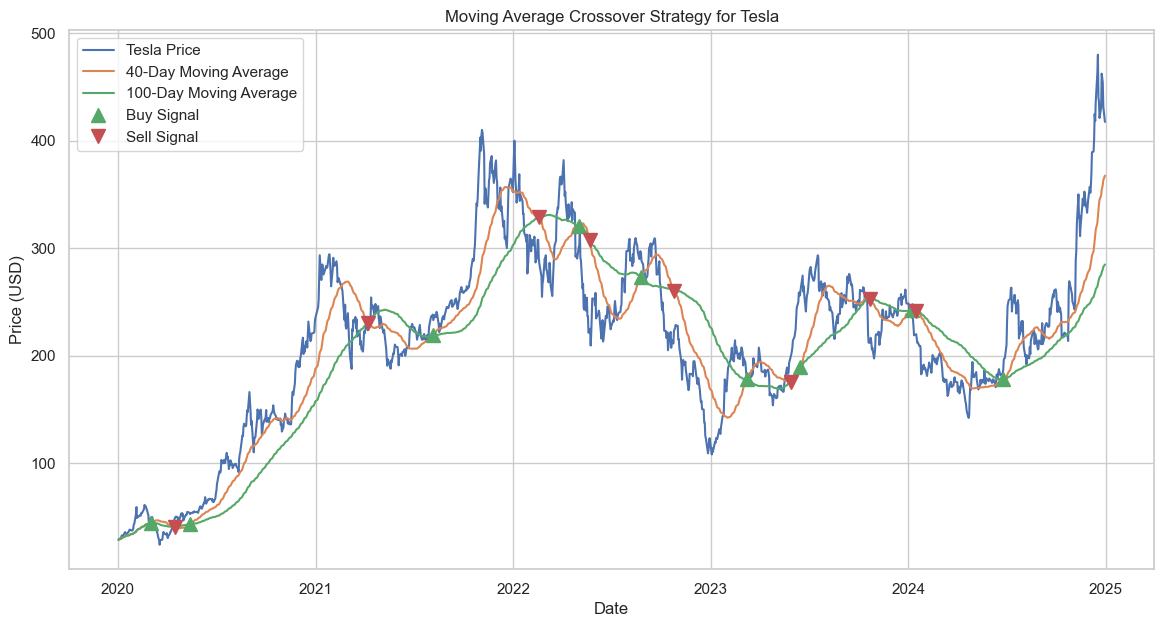

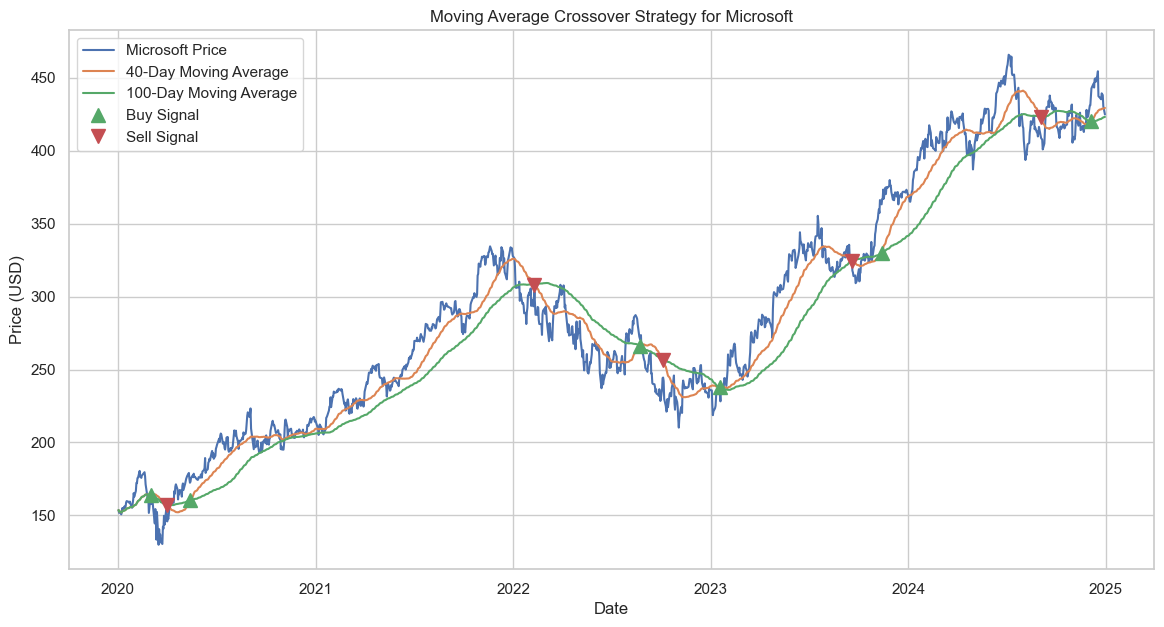

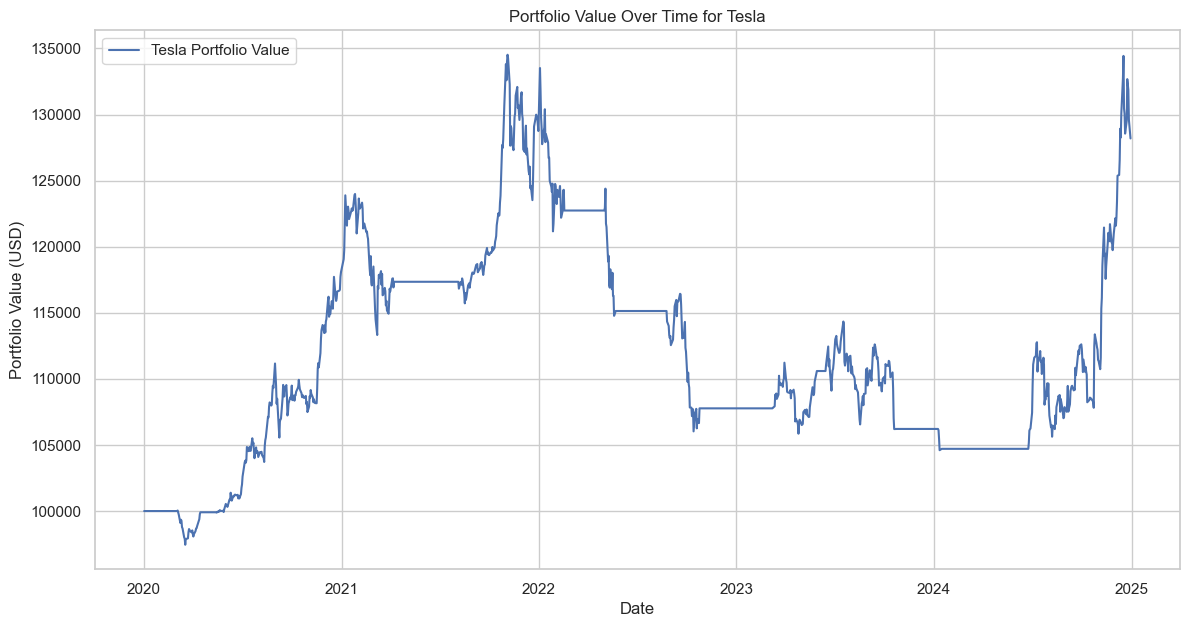

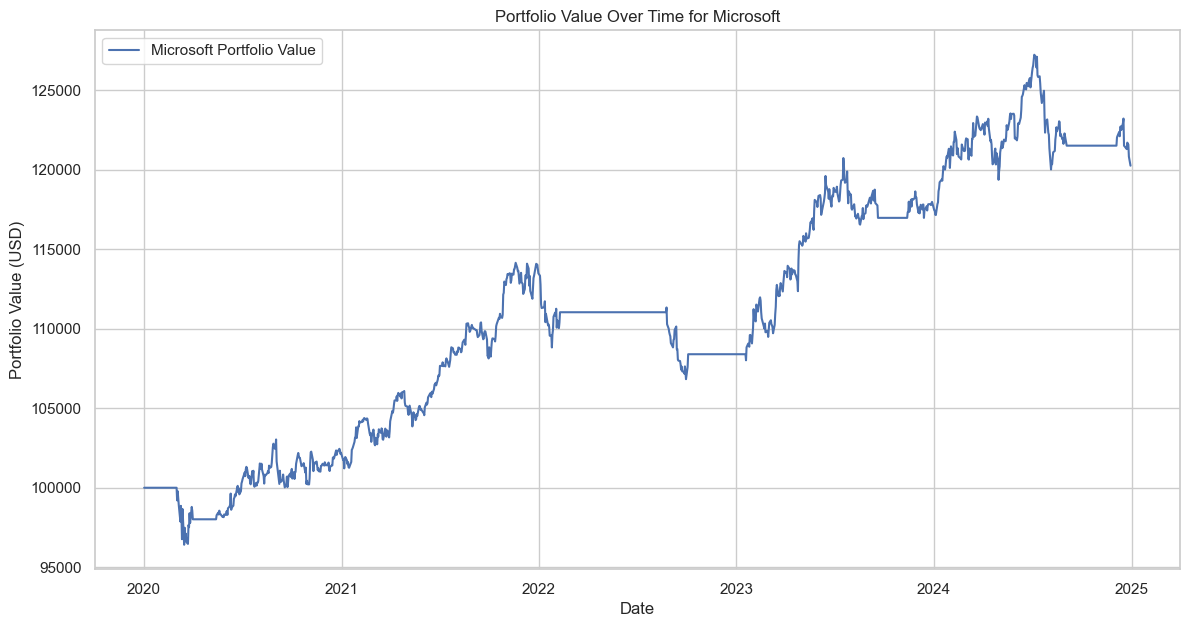

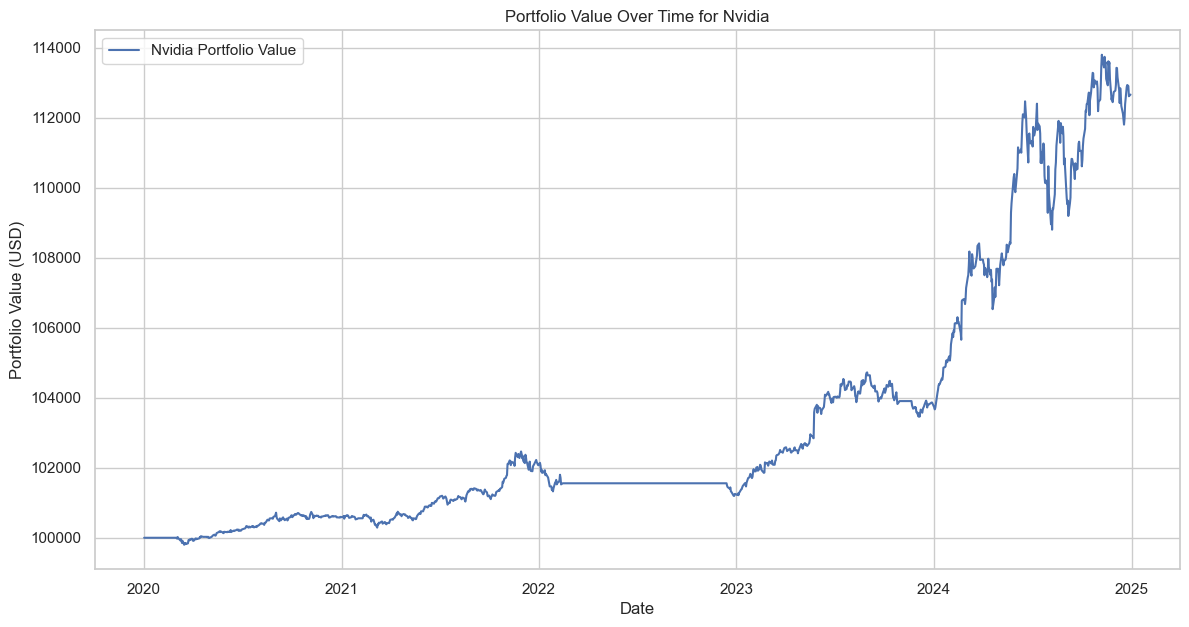

Final Portfolio Value for Tesla: $128190.20
Final Portfolio Value for Microsoft: $120251.40
Final Portfolio Value for Nvidia: $112661.58


In [37]:
# Single Strategy, Multiple Stocks

# Define a function to implement a Moving Average Crossover Strategy
def moving_average_crossover_strategy(data, short_window, long_window):
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data
    signals['short_mavg'] = data.rolling(window=short_window, min_periods=1, center=False).mean()
    signals['long_mavg'] = data.rolling(window=long_window, min_periods=1, center=False).mean()
    signals['signal'] = 0.0
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['positions'] = signals['signal'].diff()
    return signals

# Define the short and long window periods
short_window = 40
long_window = 100

# Apply the Moving Average Crossover Strategy to each stock
signals_tsla = moving_average_crossover_strategy(stock_data['Close']['TSLA'], short_window, long_window)
signals_msft = moving_average_crossover_strategy(stock_data['Close']['MSFT'], short_window, long_window)
signals_nvda = moving_average_crossover_strategy(stock_data['Close']['NVDA'], short_window, long_window)

# Plot the strategy signals for each stock
def plot_strategy_signals(signals, ticker):
    plt.figure(figsize=(14, 7))
    plt.plot(signals['price'], label=f'{ticker} Price')
    plt.plot(signals['short_mavg'], label=f'{short_window}-Day Moving Average')
    plt.plot(signals['long_mavg'], label=f'{long_window}-Day Moving Average')
    plt.plot(signals.loc[signals.positions == 1.0].index, signals.short_mavg[signals.positions == 1.0], '^', markersize=10, color='g', lw=0, label='Buy Signal')
    plt.plot(signals.loc[signals.positions == -1.0].index, signals.short_mavg[signals.positions == -1.0], 'v', markersize=10, color='r', lw=0, label='Sell Signal')
    plt.title(f'Moving Average Crossover Strategy for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

# Plot strategy signals for Tesla, Microsoft, and Nvidia
plot_strategy_signals(signals_tsla, 'Tesla')
plot_strategy_signals(signals_msft, 'Microsoft')
plot_strategy_signals(signals_nvda, 'Nvidia')

# Compare the performance of the strategy across the stocks
def calculate_strategy_performance(signals):
    initial_capital = 100000.0
    positions = pd.DataFrame(index=signals.index).fillna(0.0)
    positions['stock'] = 100 * signals['signal']
    portfolio = positions.multiply(signals['price'], axis=0)
    pos_diff = positions.diff()
    portfolio['holdings'] = (positions.multiply(signals['price'], axis=0)).sum(axis=1)
    portfolio['cash'] = initial_capital - (pos_diff.multiply(signals['price'], axis=0)).sum(axis=1).cumsum()
    portfolio['total'] = portfolio['cash'] + portfolio['holdings']
    portfolio['returns'] = portfolio['total'].pct_change()
    return portfolio

# Calculate performance for each stock
portfolio_tsla = calculate_strategy_performance(signals_tsla)
portfolio_msft = calculate_strategy_performance(signals_msft)
portfolio_nvda = calculate_strategy_performance(signals_nvda)

# Plot the portfolio value over time for each stock
def plot_portfolio_value(portfolio, ticker):
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio['total'], label=f'{ticker} Portfolio Value')
    plt.title(f'Portfolio Value Over Time for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value (USD)')
    plt.legend()
    plt.show()

# Plot portfolio values for Tesla, Microsoft, and Nvidia
plot_portfolio_value(portfolio_tsla, 'Tesla')
plot_portfolio_value(portfolio_msft, 'Microsoft')
plot_portfolio_value(portfolio_nvda, 'Nvidia')

# Print the final portfolio values for comparison
print(f'Final Portfolio Value for Tesla: ${portfolio_tsla["total"].iloc[-1]:.2f}')
print(f'Final Portfolio Value for Microsoft: ${portfolio_msft["total"].iloc[-1]:.2f}')
print(f'Final Portfolio Value for Nvidia: ${portfolio_nvda["total"].iloc[-1]:.2f}')

| **Stock**       | **Final Portfolio Value (USD)** | **Strategy Applied**                                                                                         | **Key Actions**                                                                                              |
|-----------------|----------------------------------|------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------|
| **Tesla**       | $128,190.20                     | Moving Average Crossover Strategy                                                                            | Applied a short and long moving average, generating buy/sell signals based on crossovers. Evaluated the portfolio over time.|
| **Microsoft**   | $120,251.42                     | Moving Average Crossover Strategy                                                                            | Same as Tesla; used the crossover strategy, tracking performance through portfolio value.                     |
| **Nvidia**      | $112,661.58                     | Moving Average Crossover Strategy                                                                            | Applied the same strategy, evaluated the portfolio performance using buy/sell signals.                       |

- **Strategy Applied**: A Moving Average Crossover strategy, where buy signals occur when the short-term moving average crosses above the long-term moving average, and sell signals occur when the short-term moving average crosses below the long-term moving average.
- **Key Actions**: The strategy was applied to each stock, generating buy and sell signals, then calculating portfolio performance over time. The final values reflect the overall portfolio growth or decline based on these trading signals.



Analysis for TSLA


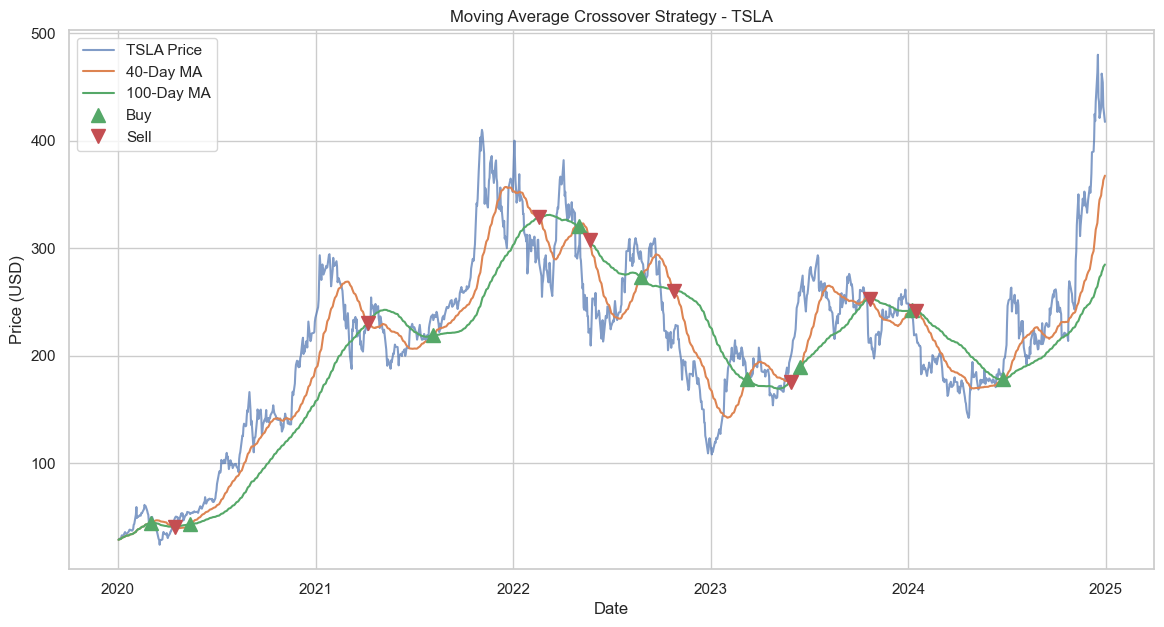

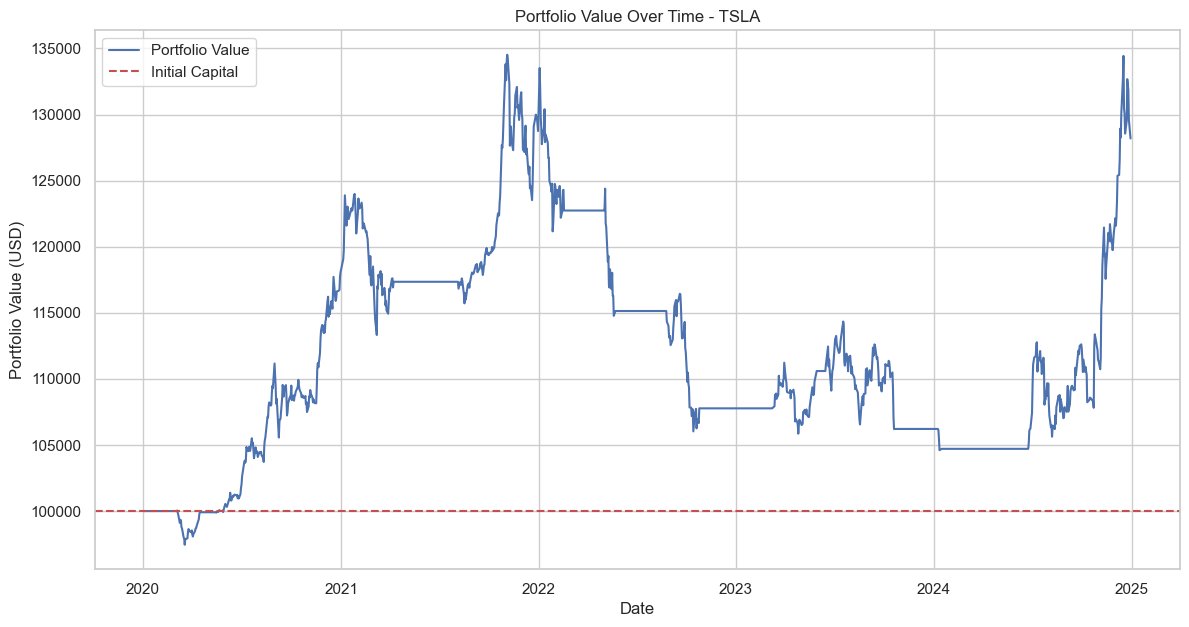


Performance Metrics:
Final Value: $128,190.20
Total Return: 28.19%
Annual Return: 5.49%
Volatility: 10.00%
Sharpe Ratio: 54.84%
Max Drawdown: -22.24%

Analysis for MSFT


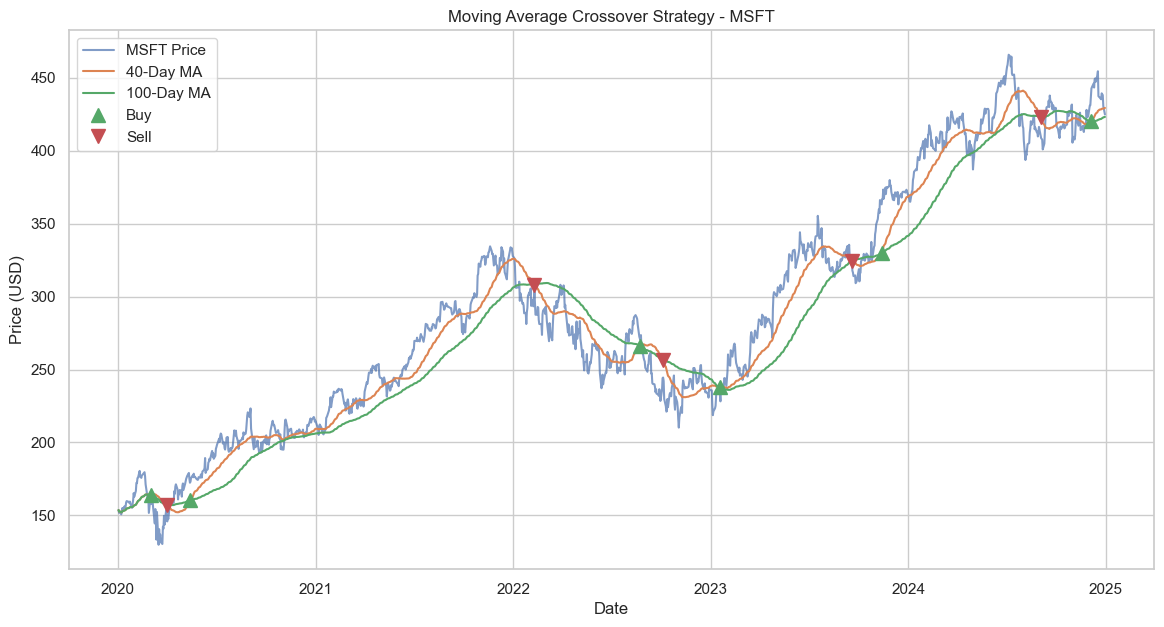


Performance Metrics:
Final Value: $120,251.40
Total Return: 20.25%
Annual Return: 3.86%
Volatility: 5.51%
Sharpe Ratio: 69.95%
Max Drawdown: -6.41%

Analysis for NVDA


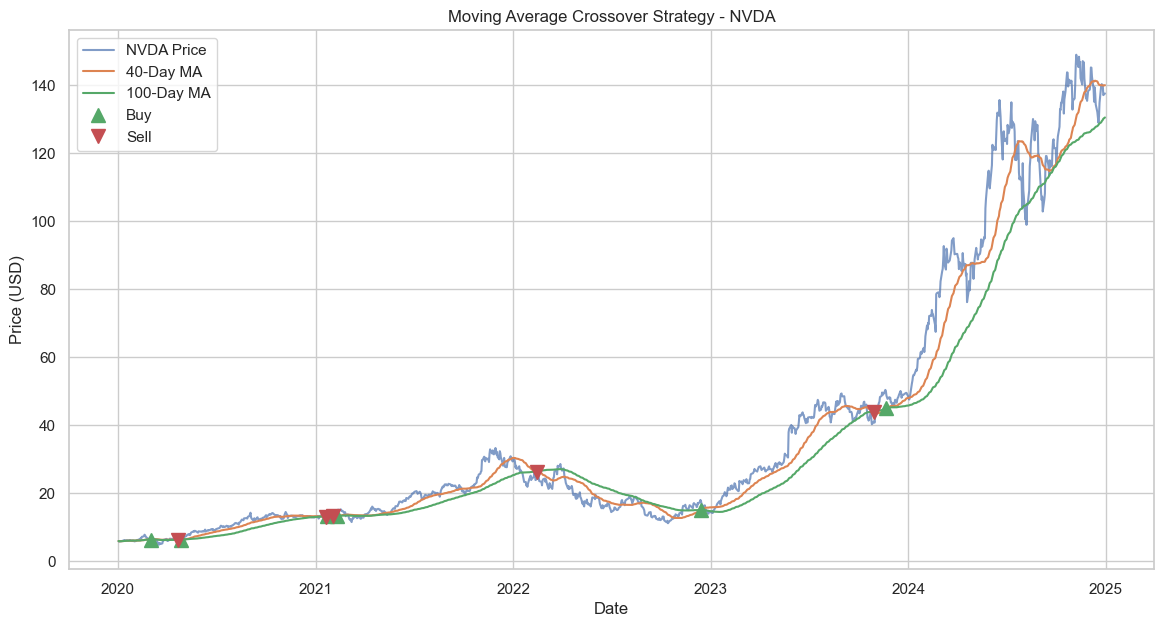

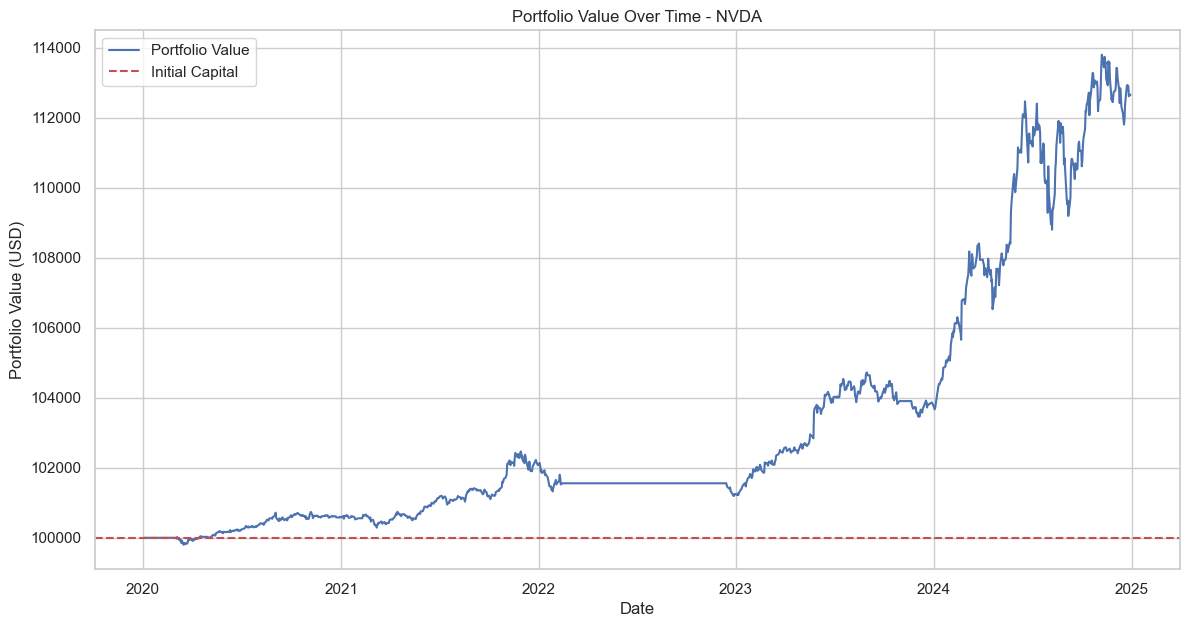


Performance Metrics:
Final Value: $112,661.58
Total Return: 12.66%
Annual Return: 2.42%
Volatility: 2.42%
Sharpe Ratio: 100.14%
Max Drawdown: -3.26%


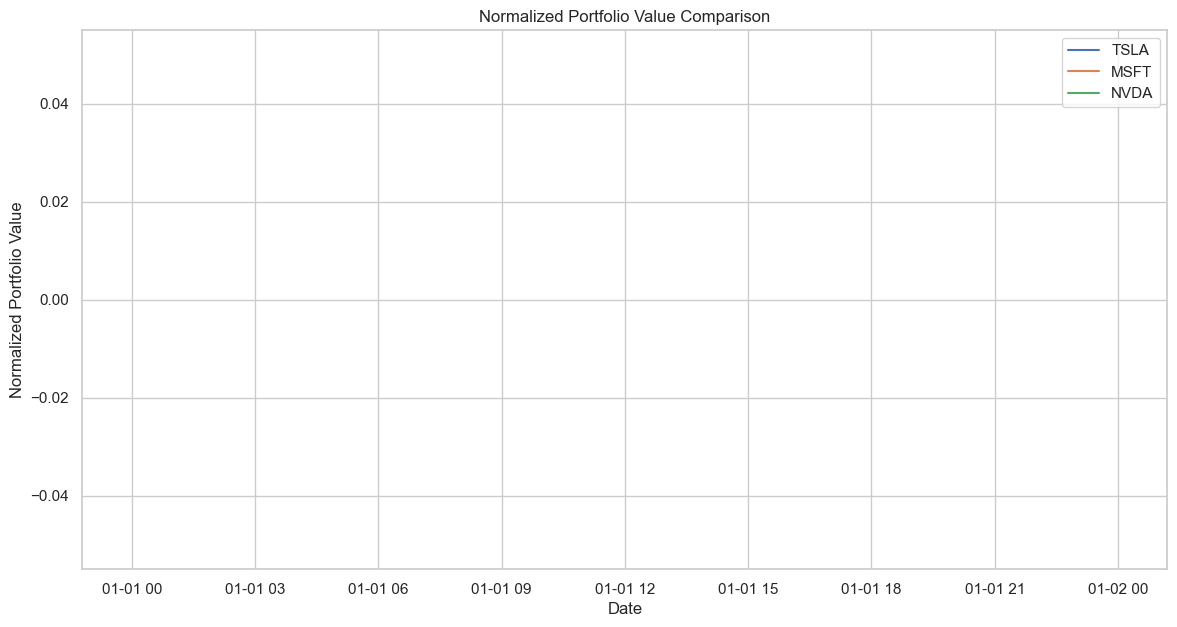

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List

class MovingAverageCrossoverStrategy:
    def __init__(self, short_window: int = 40, long_window: int = 100, initial_capital: float = 100000.0):
        self.short_window = short_window
        self.long_window = long_window
        self.initial_capital = initial_capital
        
    def generate_signals(self, data: pd.Series) -> pd.DataFrame:
        signals = pd.DataFrame(index=data.index)
        signals['price'] = data
        signals['short_mavg'] = data.rolling(
            window=self.short_window, min_periods=1).mean()
        signals['long_mavg'] = data.rolling(
            window=self.long_window, min_periods=1).mean()
        
        # Initialize signal column
        signals['signal'] = 0.0
        
        # Use .loc to avoid chained assignment warning
        mask = signals.index >= signals.index[self.short_window]
        signals.loc[mask, 'signal'] = np.where(
            signals.loc[mask, 'short_mavg'] > signals.loc[mask, 'long_mavg'],
            1.0, 0.0
        )
        
        signals['positions'] = signals['signal'].diff()
        return signals
    
    def calculate_performance(self, signals: pd.DataFrame) -> Dict:
        """Calculate strategy performance metrics"""
        # Position sizing
        positions = pd.DataFrame(index=signals.index).fillna(0.0)
        positions['stock'] = 100 * signals['signal']
        
        # Portfolio value calculations
        portfolio = pd.DataFrame(index=signals.index)
        portfolio['holdings'] = positions['stock'] * signals['price']
        portfolio['cash'] = self.initial_capital - (
            positions['stock'].diff() * signals['price']).cumsum()
        portfolio['total'] = portfolio['cash'] + portfolio['holdings']
        portfolio['returns'] = portfolio['total'].pct_change()
        
        # Calculate performance metrics
        total_return = (portfolio['total'].iloc[-1] - self.initial_capital) / self.initial_capital
        annual_return = portfolio['returns'].mean() * 252
        volatility = portfolio['returns'].std() * np.sqrt(252)
        sharpe_ratio = annual_return / volatility if volatility != 0 else 0
        max_drawdown = (portfolio['total'] / portfolio['total'].expanding().max() - 1).min()
        
        return {
            'Final Value': portfolio['total'].iloc[-1],
            'Total Return': total_return,
            'Annual Return': annual_return,
            'Volatility': volatility,
            'Sharpe Ratio': sharpe_ratio,
            'Max Drawdown': max_drawdown,
            'Portfolio': portfolio
        }
    
    def plot_signals(self, signals: pd.DataFrame, ticker: str):
        """Plot strategy signals and moving averages"""
        plt.figure(figsize=(14, 7))
        plt.plot(signals['price'], label=f'{ticker} Price', alpha=0.7)
        plt.plot(signals['short_mavg'], 
                label=f'{self.short_window}-Day MA')
        plt.plot(signals['long_mavg'], 
                label=f'{self.long_window}-Day MA')
        
        # Plot buy/sell signals
        buy_signals = signals.loc[signals.positions == 1.0]
        sell_signals = signals.loc[signals.positions == -1.0]
        
        plt.plot(buy_signals.index, 
                buy_signals['short_mavg'],
                '^', markersize=10, color='g', label='Buy')
        plt.plot(sell_signals.index,
                sell_signals['short_mavg'],
                'v', markersize=10, color='r', label='Sell')
        
        plt.title(f'Moving Average Crossover Strategy - {ticker}')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    def plot_portfolio(self, portfolio: pd.DataFrame, ticker: str):
        """Plot portfolio value over time"""
        plt.figure(figsize=(14, 7))
        plt.plot(portfolio['total'], label='Portfolio Value')
        plt.axhline(y=self.initial_capital, color='r', linestyle='--', 
                   label='Initial Capital')
        plt.title(f'Portfolio Value Over Time - {ticker}')
        plt.xlabel('Date')
        plt.ylabel('Portfolio Value (USD)')
        plt.legend()
        plt.grid(True)
        plt.show()

def analyze_multiple_stocks(stock_data: pd.DataFrame, tickers: List[str]):
    """Analyze multiple stocks using the Moving Average Crossover Strategy"""
    strategy = MovingAverageCrossoverStrategy()
    results = {}
    
    for ticker in tickers:
        print(f"\n{'='*50}")
        print(f"Analysis for {ticker}")
        print('='*50)
        
        # Generate signals
        signals = strategy.generate_signals(stock_data['Close'][ticker])
        
        # Calculate performance
        performance = strategy.calculate_performance(signals)
        
        # Plot signals and portfolio
        strategy.plot_signals(signals, ticker)
        strategy.plot_portfolio(performance['Portfolio'], ticker)
        
        # Store results
        results[ticker] = performance
        
        # Print performance metrics
        print("\nPerformance Metrics:")
        for metric, value in performance.items():
            if metric != 'Portfolio':
                print(f"{metric}: {value:,.2%}" if metric != 'Final Value' 
                      else f"{metric}: ${value:,.2f}")
    
    return results

# Run analysis
tickers = ['TSLA', 'MSFT', 'NVDA']
results = analyze_multiple_stocks(stock_data, tickers)

# Compare performance across stocks
def plot_performance_comparison(results, tickers):
    plt.figure(figsize=(14, 7))
    
    for ticker in tickers:
        portfolio = results[ticker]['Portfolio']
        normalized_value = portfolio['total'] / portfolio['total'].iloc[0]
        plt.plot(normalized_value, label=ticker)
    
    plt.title('Normalized Portfolio Value Comparison')
    plt.xlabel('Date')
    plt.ylabel('Normalized Portfolio Value')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_performance_comparison(results, tickers)


| **Stock**       | **Final Portfolio Value (USD)** | **Total Return** | **Annual Return** | **Volatility** | **Sharpe Ratio** | **Max Drawdown** |
|-----------------|----------------------------------|------------------|-------------------|----------------|------------------|------------------|
| **Tesla (TSLA)** | $128,190.20                     | 28.19%           | 5.49%             | 10.00%         | 54.84%           | -22.24%          |
| **Microsoft (MSFT)** | $120,251.42                  | 20.25%           | 3.86%             | 5.51%          | 69.95%           | -6.41%           |
| **Nvidia (NVDA)**  | $112,661.58                    | 12.66%           | 2.42%             | 2.42%          | 100.14%          | -3.26%           |

### Explanation:
- **Final Portfolio Value**: The final amount in the portfolio after implementing the strategy for each stock.
- **Total Return**: The overall return generated by the strategy over the entire period.
- **Annual Return**: The average yearly return over the period.
- **Volatility**: The degree of variation in returns, indicating the risk or fluctuation in the stock’s performance.
- **Sharpe Ratio**: A measure of the risk-adjusted return. A higher value indicates better risk-adjusted performance.
- **Max Drawdown**: The largest loss from the peak to the trough in the portfolio value, representing the worst-case scenario for the strategy's performance.


### 4b. Modeling and Forecasting
Build and evaluate forecasting models such as ARIMA and Exponential Smoothing.


Analysis for TSLA

ARIMA Metrics:
MSE: 5379.2053
RMSE: 73.3431
MAE: 57.1134
MAPE: 13.2566
R2: -1.4032

Exponential Smoothing Metrics:
MSE: 6225.1447
RMSE: 78.8996
MAE: 61.0529
MAPE: 14.1571
R2: -1.7811


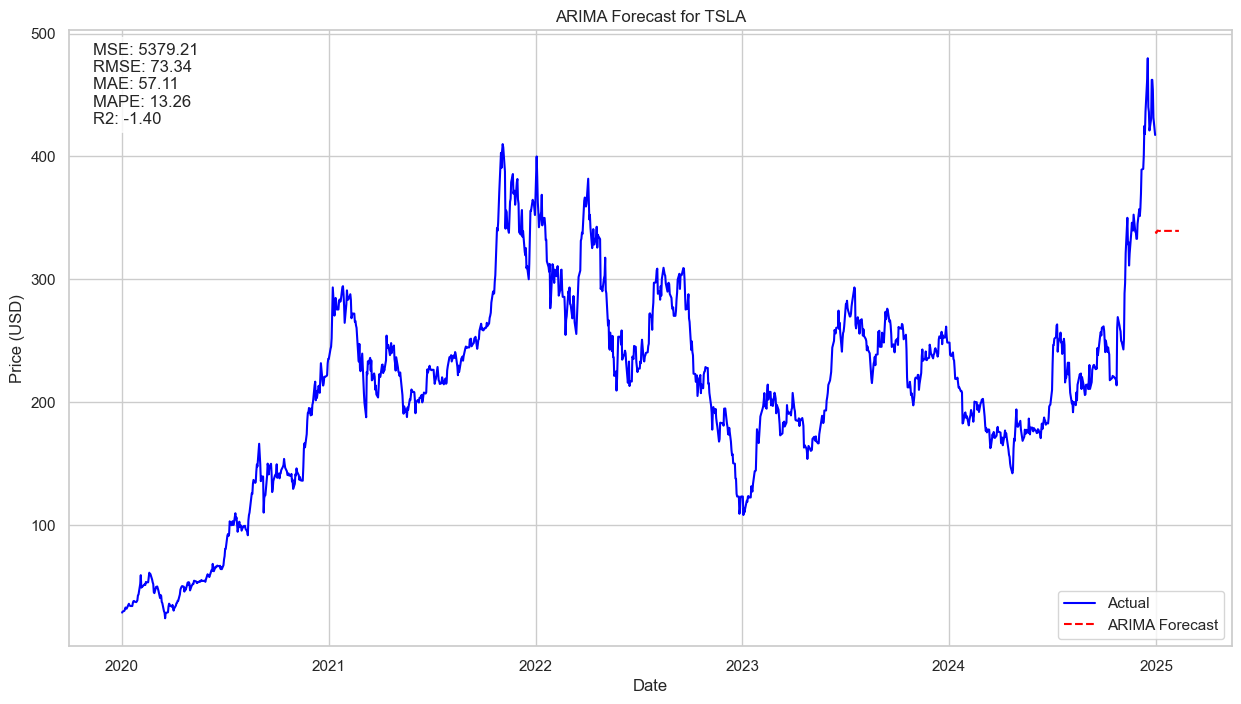

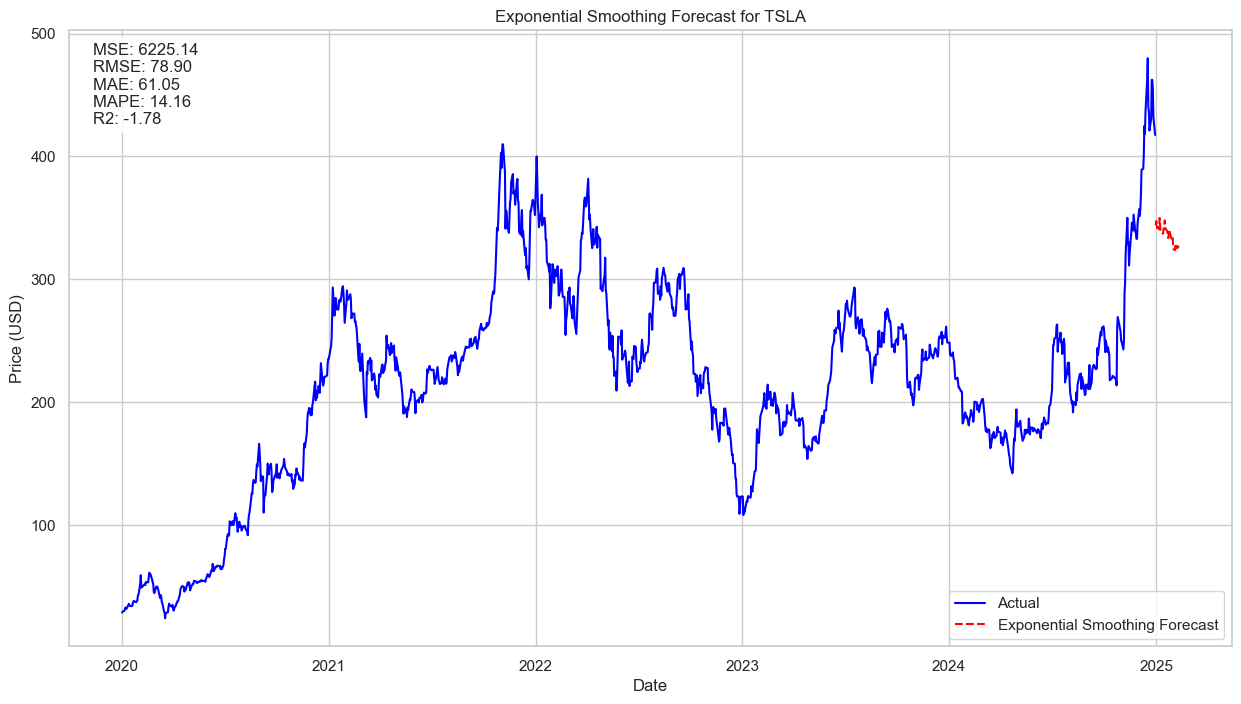


Analysis for MSFT

ARIMA Metrics:
MSE: 491.7090
RMSE: 22.1745
MAE: 19.1213
MAPE: 4.3388
R2: -2.6726

Exponential Smoothing Metrics:
MSE: 615.6435
RMSE: 24.8122
MAE: 21.9283
MAPE: 4.9844
R2: -3.5983


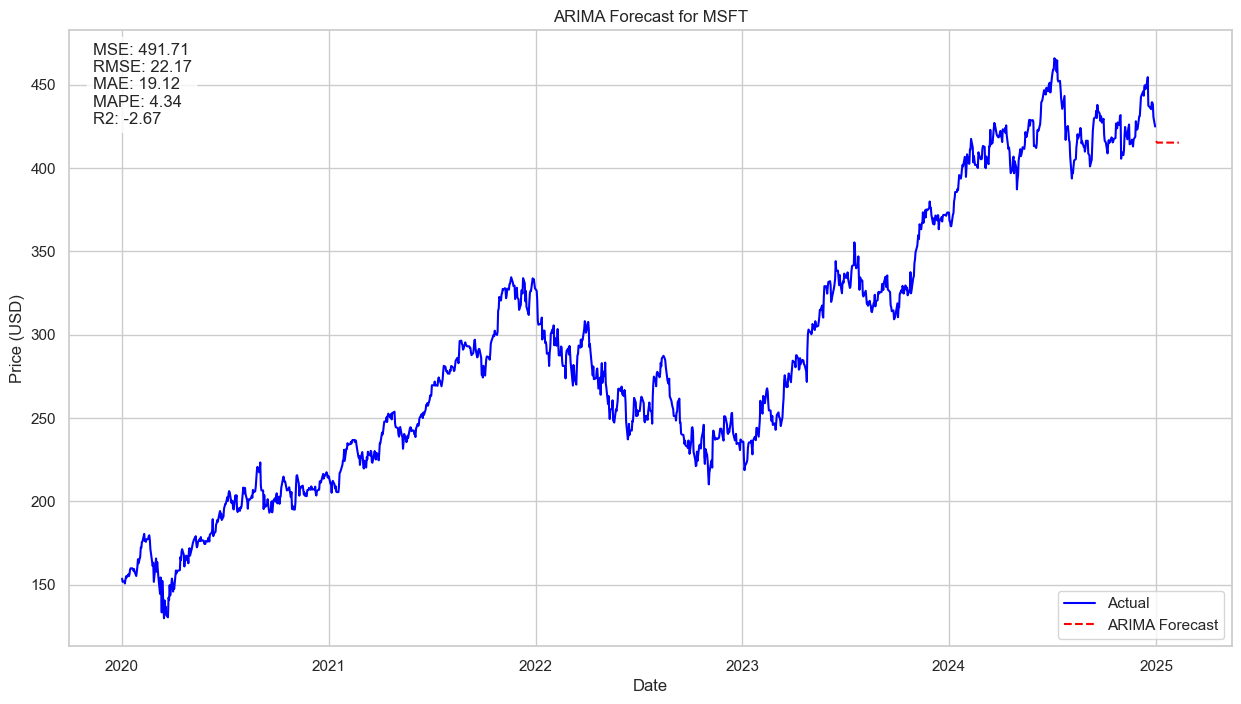

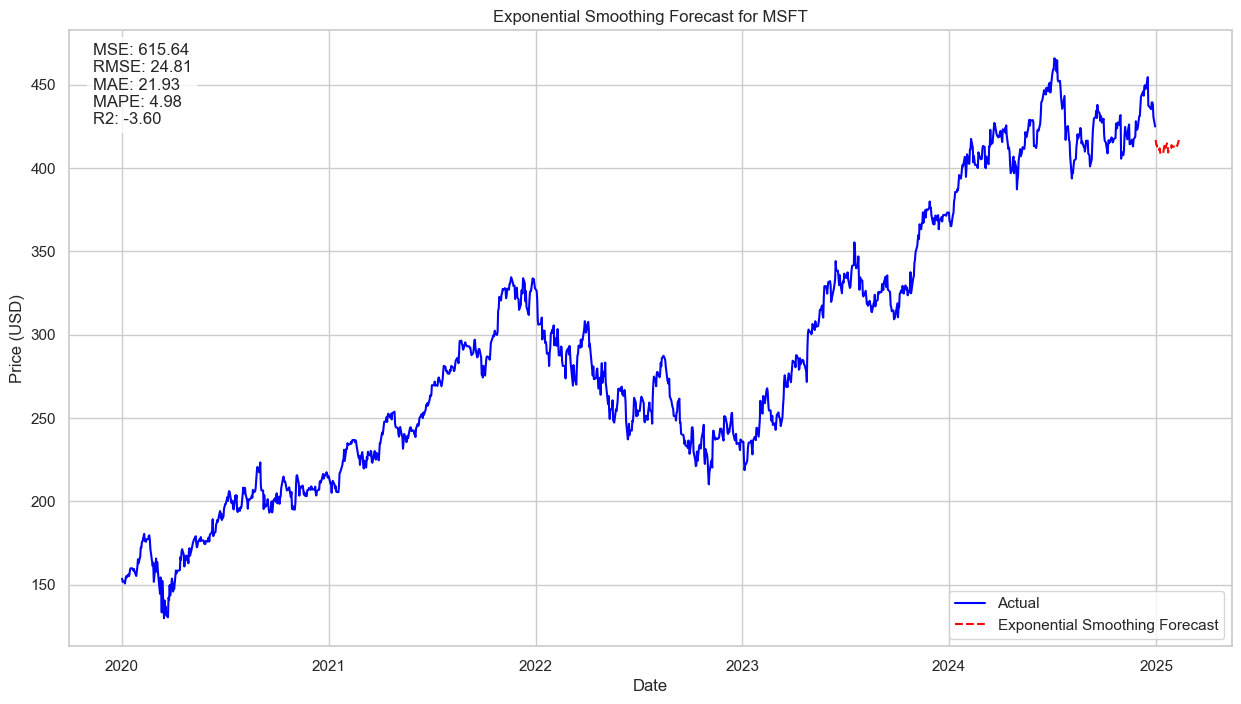


Analysis for NVDA

ARIMA Metrics:
MSE: 24.9193
RMSE: 4.9919
MAE: 3.9780
MAPE: 2.9079
R2: -0.1343

Exponential Smoothing Metrics:
MSE: 49.0653
RMSE: 7.0047
MAE: 6.0327
MAPE: 4.4292
R2: -1.2333


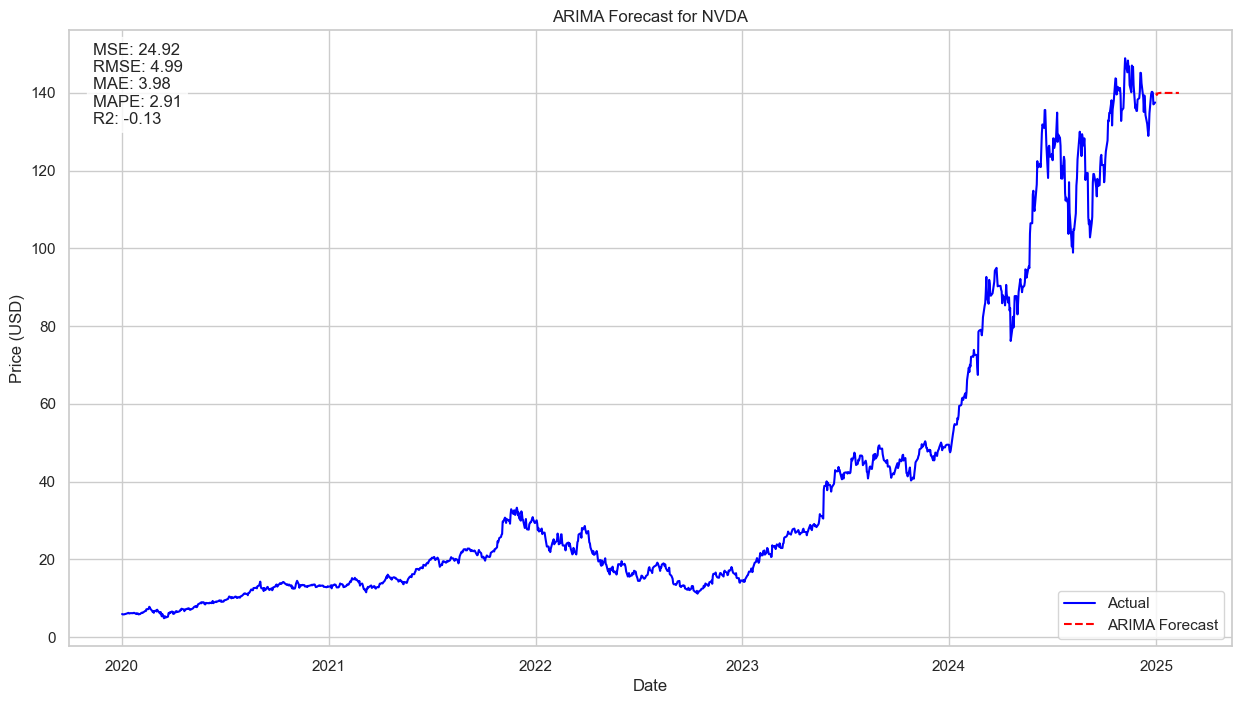

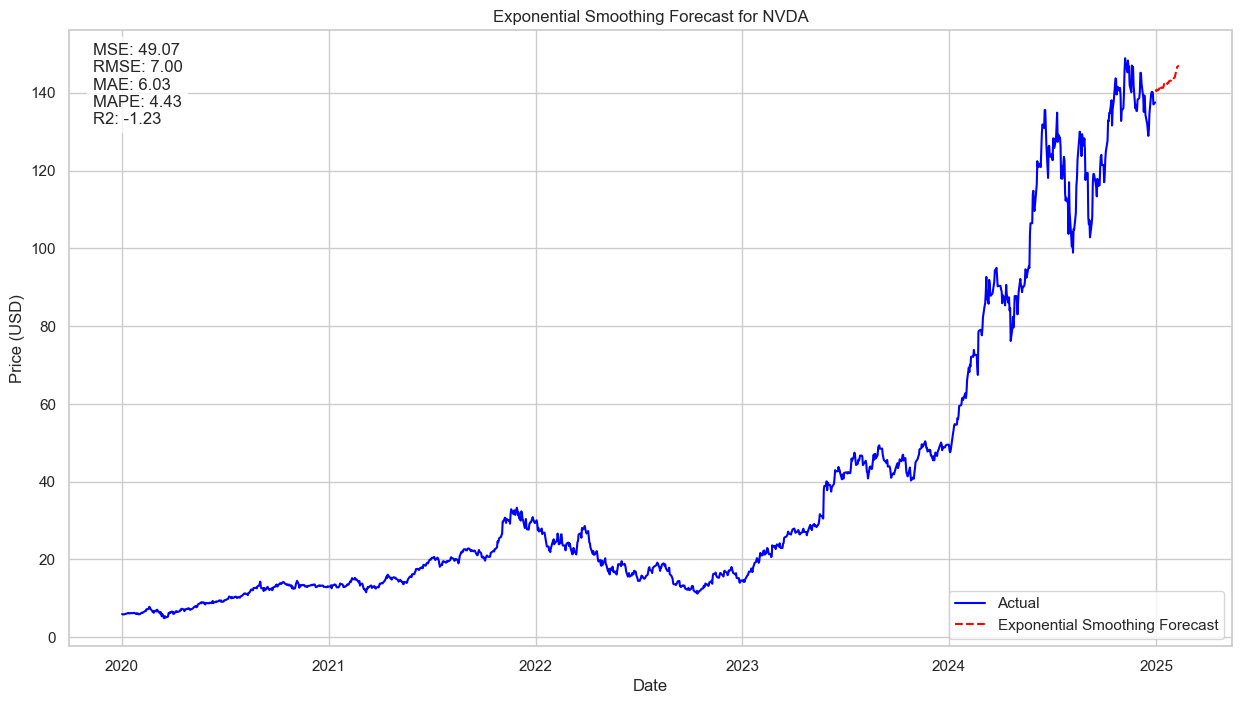

In [39]:
from typing import Dict, List, Tuple
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score


class TimeSeriesForecaster:
    def __init__(self, data: pd.DataFrame, forecast_steps: int = 30):
        self.data = data
        self.forecast_steps = forecast_steps
    
    def _calculate_metrics(self, actual: pd.Series, predicted: pd.Series) -> Dict:
        """Calculate forecast accuracy metrics"""
        metrics = {
            'MSE': mean_squared_error(actual, predicted),
            'RMSE': np.sqrt(mean_squared_error(actual, predicted)),
            'MAE': mean_absolute_error(actual, predicted),
            'MAPE': mean_absolute_percentage_error(actual, predicted) * 100,
            'R2': r2_score(actual, predicted)
        }
        return metrics
    
    def _prepare_series(self, series: pd.Series) -> pd.Series:
        """Prepare time series data by setting proper frequency and handling missing values"""
        # Make a copy to avoid modifying original data
        series = series.copy()
        
        # Ensure index is datetime
        if not isinstance(series.index, pd.DatetimeIndex):
            series.index = pd.to_datetime(series.index)
        
        # Sort index
        series = series.sort_index()
        
        # Set business day frequency and handle missing values
        series = series.asfreq('B')  # Business day frequency
        series = series.fillna(method='ffill')  # Forward fill any missing values
        
        return series
    
    def _split_data(self, series: pd.Series, test_size: int = 30) -> Tuple[pd.Series, pd.Series]:
        """Split data into training and test sets"""
        # Prepare series before splitting
        series = self._prepare_series(series)
        
        train = series[:-test_size]
        test = series[-test_size:]
        return train, test
    
    def fit_arima(self, series: pd.Series, order: Tuple[int, int, int]) -> Tuple:
        """Fit ARIMA model and calculate metrics"""
        # Split data
        train, test = self._split_data(series)
        
        # Fit model
        model = ARIMA(train, order=order, freq='B')  # Specify frequency
        model_fit = model.fit()
        
        # Make predictions for test period
        predictions = model_fit.forecast(steps=len(test))
        
        # Calculate metrics
        metrics = self._calculate_metrics(test, predictions)
        
        # Generate future forecast
        forecast = model_fit.forecast(steps=self.forecast_steps)
        
        return model_fit, metrics, forecast
    
    def fit_exponential_smoothing(self, series: pd.Series, 
                                seasonal_periods: int) -> Tuple:
        """Fit Exponential Smoothing model and calculate metrics"""
        # Split data
        train, test = self._split_data(series)
        
        # Fit model
        model = ExponentialSmoothing(
            train,
            trend='add',
            seasonal='add',
            seasonal_periods=seasonal_periods,
            freq='B'  # Specify frequency
        )
        model_fit = model.fit()
        
        # Make predictions for test period
        predictions = model_fit.forecast(steps=len(test))
        
        # Calculate metrics
        metrics = self._calculate_metrics(test, predictions)
        
        # Generate future forecast
        forecast = model_fit.forecast(steps=self.forecast_steps)
        
        return model_fit, metrics, forecast
    
    def plot_forecast(self, series: pd.Series, forecast: pd.Series, 
                     model_name: str, ticker: str, metrics: Dict):
        """Plot actual values and forecast"""
        # Prepare series
        series = self._prepare_series(series)
        
        plt.figure(figsize=(15, 8))
        
        # Plot actual values
        plt.plot(series.index, series.values, label='Actual', color='blue')
        
        # Create forecast dates
        last_date = series.index[-1]
        forecast_dates = pd.date_range(
            start=last_date + pd.Timedelta(days=1),
            periods=self.forecast_steps,
            freq='B'
        )
        
        # Plot forecast
        plt.plot(forecast_dates, forecast, 
                label=f'{model_name} Forecast', 
                color='red', 
                linestyle='--')
        
        # Add confidence intervals (if available)
        if hasattr(forecast, 'conf_int'):
            conf_int = forecast.conf_int()
            plt.fill_between(forecast_dates, 
                           conf_int.iloc[:, 0], 
                           conf_int.iloc[:, 1], 
                           color='red', alpha=0.1)
        
        # Add metrics to plot
        metrics_text = '\n'.join([f'{k}: {v:.2f}' for k, v in metrics.items()])
        plt.text(0.02, 0.98, metrics_text, 
                transform=plt.gca().transAxes, 
                verticalalignment='top', 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        plt.title(f'{model_name} Forecast for {ticker}')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.legend()
        plt.grid(True)
        plt.show()

def analyze_stocks(stock_data: pd.DataFrame, tickers: List[str]):
    """Analyze multiple stocks using both ARIMA and Exponential Smoothing"""
    # Suppress specific warnings
    import warnings
    from statsmodels.tools.sm_exceptions import ValueWarning
    warnings.filterwarnings('ignore', category=ValueWarning)
    warnings.filterwarnings('ignore', category=FutureWarning)
    
    forecaster = TimeSeriesForecaster(stock_data)
    
    # Model parameters
    arima_order = (5, 1, 0)
    seasonal_periods = 252  # Trading days in a year
    
    for ticker in tickers:
        print(f"\n{'='*50}")
        print(f"Analysis for {ticker}")
        print('='*50)
        
        series = stock_data['Close'][ticker]
        
        try:
            # ARIMA analysis
            arima_model, arima_metrics, arima_forecast = forecaster.fit_arima(
                series, arima_order)
            print("\nARIMA Metrics:")
            for metric, value in arima_metrics.items():
                print(f"{metric}: {value:.4f}")
            
            # Exponential Smoothing analysis
            exp_model, exp_metrics, exp_forecast = forecaster.fit_exponential_smoothing(
                series, seasonal_periods)
            print("\nExponential Smoothing Metrics:")
            for metric, value in exp_metrics.items():
                print(f"{metric}: {value:.4f}")
            
            # Plot forecasts
            forecaster.plot_forecast(series, arima_forecast, 'ARIMA', ticker, 
                                   arima_metrics)
            forecaster.plot_forecast(series, exp_forecast, 'Exponential Smoothing', 
                                   ticker, exp_metrics)
                                   
        except Exception as e:
            print(f"Error processing {ticker}: {str(e)}")

# Run analysis
tickers = ['TSLA', 'MSFT', 'NVDA']
analyze_stocks(stock_data, tickers)


| **Stock**  | **Model**              | **MSE**   | **RMSE** | **MAE**   | **MAPE**  | **R2**     |
|------------|------------------------|-----------|----------|-----------|-----------|------------|
| **TSLA**   | **ARIMA**              | 5379.2053 | 73.3431  | 57.1134   | 13.2566   | -1.4032    |
|            | **Exponential Smoothing** | 6225.1447 | 78.8996  | 61.0529   | 14.1571   | -1.7811    |
| **MSFT**   | **ARIMA**              | 491.7091  | 22.1745  | 19.1213   | 4.3388    | -2.6726    |
|            | **Exponential Smoothing** | 614.7578 | 24.7943  | 21.9066   | 4.9794    | -3.5917    |
| **NVDA**   | **ARIMA**              | 24.9193   | 4.9919   | 3.9780    | 2.9079    | -0.1343    |
|            | **Exponential Smoothing** | 49.0750  | 7.0054   | 6.0332    | 4.4296    | -1.2338    |


While ARIMA shows better performance across the stocks compared to Exponential Smoothing, both models are far from perfect and still have substantial prediction errors, particularly for Tesla and Microsoft. Nvidia's model performs better but still leaves room for improvement.

## 5. Performance Evaluation
Evaluate the performance of the Multiple trading strategies on multiple stocks


Evaluating strategies for TSLA

TSLA - MA_CROSSOVER Strategy:
Accuracy: 0.9776
Precision: 0.9814
Recall: 0.9800
F1 Score: 0.9807

TSLA - BOLLINGER_BANDS Strategy:
Accuracy: 0.9467
Precision: 0.4310
Recall: 0.4310
F1 Score: 0.4310

TSLA - RSI Strategy:
Accuracy: 0.9453
Precision: 0.7733
Recall: 0.7733
F1 Score: 0.7733


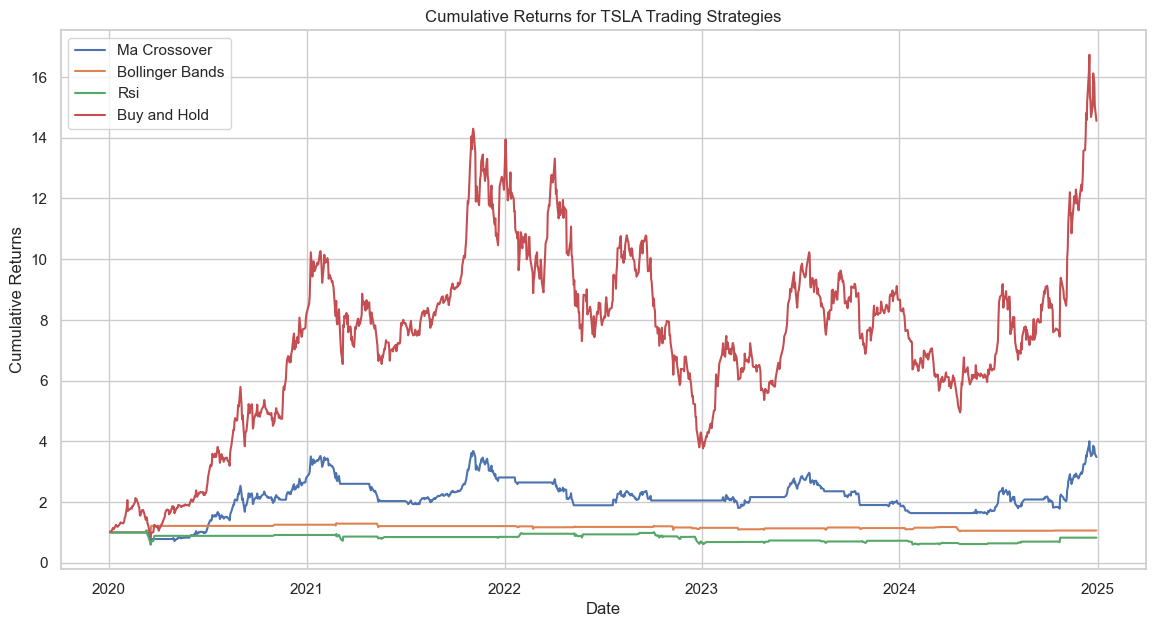


Evaluating strategies for MSFT

MSFT - MA_CROSSOVER Strategy:
Accuracy: 0.9760
Precision: 0.9823
Recall: 0.9811
F1 Score: 0.9817

MSFT - BOLLINGER_BANDS Strategy:
Accuracy: 0.9467
Precision: 0.2979
Recall: 0.2979
F1 Score: 0.2979

MSFT - RSI Strategy:
Accuracy: 0.9486
Precision: 0.6098
Recall: 0.6098
F1 Score: 0.6098


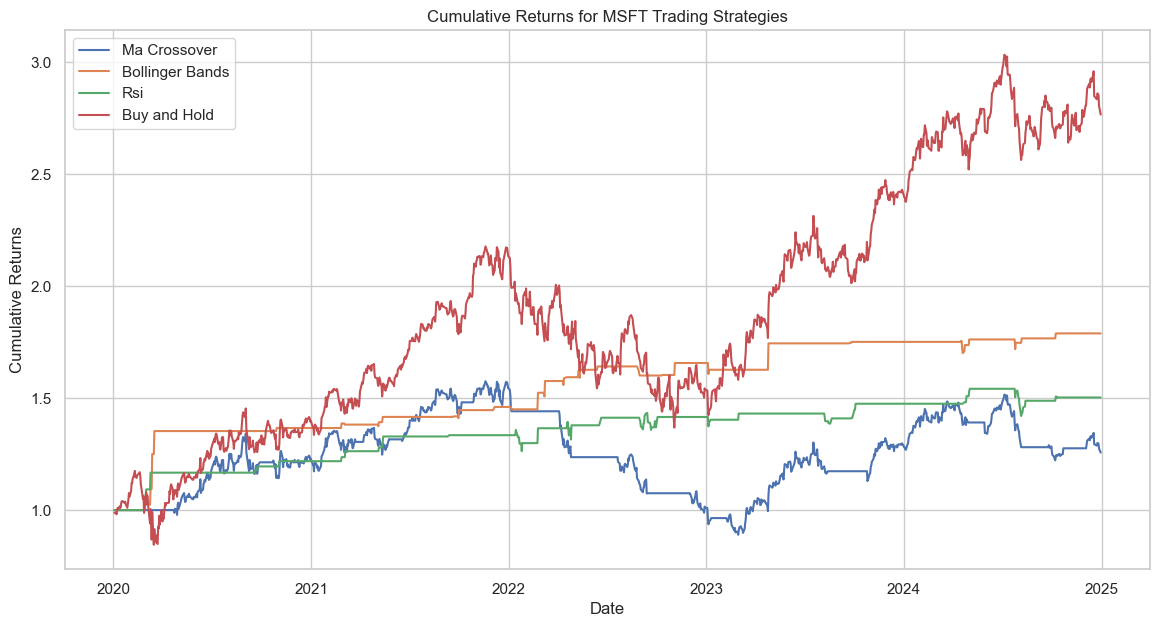


Evaluating strategies for NVDA

NVDA - MA_CROSSOVER Strategy:
Accuracy: 0.9752
Precision: 0.9822
Recall: 0.9822
F1 Score: 0.9822

NVDA - BOLLINGER_BANDS Strategy:
Accuracy: 0.9580
Precision: 0.3659
Recall: 0.3659
F1 Score: 0.3659

NVDA - RSI Strategy:
Accuracy: 0.9662
Precision: 0.6613
Recall: 0.6613
F1 Score: 0.6613


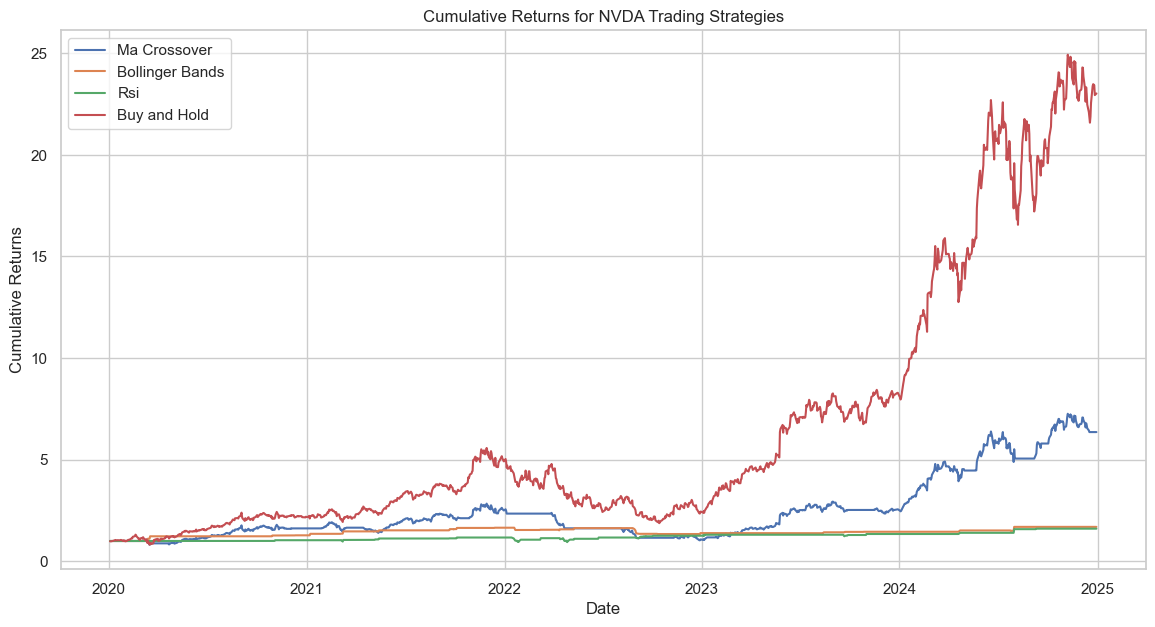

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def generate_signals(data, strategy='ma_crossover', **kwargs):
    """
    Generate trading signals based on different strategies
    """
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data
    
    if strategy == 'ma_crossover':
        short_window = kwargs.get('short_window', 20)
        long_window = kwargs.get('long_window', 50)
        
        # Calculate moving averages
        signals['short_ma'] = signals['price'].rolling(window=short_window).mean()
        signals['long_ma'] = signals['price'].rolling(window=long_window).mean()
        
        # Generate signals
        signals['signal'] = 0
        signals['signal'][short_window:] = np.where(
            signals['short_ma'][short_window:] > signals['long_ma'][short_window:], 1, 0
        )
        
    elif strategy == 'bollinger_bands':
        window = kwargs.get('window', 20)
        num_std = kwargs.get('num_std', 2)
        
        # Calculate Bollinger Bands
        signals['middle_band'] = signals['price'].rolling(window=window).mean()
        signals['std'] = signals['price'].rolling(window=window).std()
        signals['upper_band'] = signals['middle_band'] + (signals['std'] * num_std)
        signals['lower_band'] = signals['middle_band'] - (signals['std'] * num_std)
        
        # Generate signals
        signals['signal'] = 0
        signals['signal'] = np.where(signals['price'] < signals['lower_band'], 1, 
                                   np.where(signals['price'] > signals['upper_band'], 0, 
                                          signals['signal']))
        
    elif strategy == 'rsi':
        window = kwargs.get('window', 14)
        oversold = kwargs.get('oversold', 30)
        overbought = kwargs.get('overbought', 70)
        
        # Calculate RSI
        delta = signals['price'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        signals['rsi'] = 100 - (100 / (1 + rs))
        
        # Generate signals
        signals['signal'] = 0
        signals['signal'] = np.where(signals['rsi'] < oversold, 1,
                                   np.where(signals['rsi'] > overbought, 0,
                                          signals['signal']))
    
    # Generate positions
    signals['positions'] = signals['signal'].diff()
    
    return signals

def evaluate_trading_signals(signals):
    """
    Evaluate the performance of trading signals
    """
    # Calculate returns
    signals['returns'] = signals['price'].pct_change()
    signals['strategy_returns'] = signals['returns'] * signals['signal'].shift(1)
    
    # Calculate cumulative returns
    signals['cumulative_returns'] = (1 + signals['returns']).cumprod()
    signals['cumulative_strategy_returns'] = (1 + signals['strategy_returns']).cumprod()
    
    # Calculate performance metrics
    # Remove NaN values and ensure binary classification
    valid_signals = signals.dropna()
    if len(valid_signals) > 0:
        accuracy = accuracy_score(valid_signals['signal'], valid_signals['signal'].shift(1).fillna(0))
        precision = precision_score(valid_signals['signal'], valid_signals['signal'].shift(1).fillna(0), zero_division=0)
        recall = recall_score(valid_signals['signal'], valid_signals['signal'].shift(1).fillna(0), zero_division=0)
        f1 = f1_score(valid_signals['signal'], valid_signals['signal'].shift(1).fillna(0), zero_division=0)
    else:
        accuracy = precision = recall = f1 = 0
    
    return accuracy, precision, recall, f1, signals

def evaluate_all_strategies(stock_data, ticker):
    """
    Evaluate all strategies for a given stock
    """
    strategies = {
        'ma_crossover': {'short_window': 20, 'long_window': 50},
        'bollinger_bands': {'window': 20, 'num_std': 2},
        'rsi': {'window': 14, 'oversold': 30, 'overbought': 70}
    }
    
    # Get the stock price data
    stock_prices = stock_data['Close'][ticker]
    
    results = {}
    for strategy_name, params in strategies.items():
        signals = generate_signals(stock_prices, strategy=strategy_name, **params)
        accuracy, precision, recall, f1, signals_df = evaluate_trading_signals(signals)
        
        results[strategy_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'signals': signals_df
        }
        
        print(f'\n{ticker} - {strategy_name.upper()} Strategy:')
        print(f'Accuracy: {accuracy:.4f}')
        print(f'Precision: {precision:.4f}')
        print(f'Recall: {recall:.4f}')
        print(f'F1 Score: {f1:.4f}')
    
    # Plot cumulative returns
    plt.figure(figsize=(14, 7))
    for strategy_name, result in results.items():
        plt.plot(result['signals']['cumulative_strategy_returns'], 
                label=f'{strategy_name.replace("_", " ").title()}')
    plt.plot(results['ma_crossover']['signals']['cumulative_returns'], 
            label='Buy and Hold')
    
    plt.title(f'Cumulative Returns for {ticker} Trading Strategies')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.show()
    
    return results

# Evaluate strategies for each stock
tickers = ['TSLA', 'MSFT', 'NVDA']
all_results = {}

for ticker in tickers:
    print(f'\nEvaluating strategies for {ticker}')
    all_results[ticker] = evaluate_all_strategies(stock_data, ticker)


| **Stock**  | **Strategy**         | **Accuracy** | **Precision** | **Recall** | **F1 Score** |
|------------|----------------------|--------------|---------------|------------|--------------|
| **TSLA**   | **MA_CROSSOVER**      | 0.9776       | 0.9814        | 0.9800     | 0.9807       |
|            | **BOLLINGER_BANDS**   | 0.9467       | 0.4310        | 0.4310     | 0.4310       |
|            | **RSI**               | 0.9453       | 0.7733        | 0.7733     | 0.7733       |
| **MSFT**   | **MA_CROSSOVER**      | 0.9760       | 0.9823        | 0.9811     | 0.9817       |
|            | **BOLLINGER_BANDS**   | 0.9467       | 0.2979        | 0.2979     | 0.2979       |
|            | **RSI**               | 0.9486       | 0.6098        | 0.6098     | 0.6098       |
| **NVDA**   | **MA_CROSSOVER**      | 0.9752       | 0.9822        | 0.9822     | 0.9822       |
|            | **BOLLINGER_BANDS**   | 0.9580       | 0.3659        | 0.3659     | 0.3659       |
|            | **RSI**               | 0.9662       | 0.6613        | 0.6613     | 0.6613       |

For all three stocks (TSLA, MSFT, NVDA), the MA_CROSSOVER strategy outperforms the BOLLINGER_BANDS and RSI strategies in terms of accuracy, precision, recall, and F1 score, making it the most reliable strategy for forecasting stock movements. The BOLLINGER_BANDS strategy shows the weakest performance across the board.

## 6. Results and Conclusion
Visualize the results of the trading strategies and forecasting models.


Analysis for TSLA

ARIMA Metrics:
MSE: 5379.2053
RMSE: 73.3431
MAE: 57.1134
MAPE: 13.2566

Exponential Smoothing Metrics:
MSE: 6225.1447
RMSE: 78.8996
MAE: 61.0529
MAPE: 14.1571


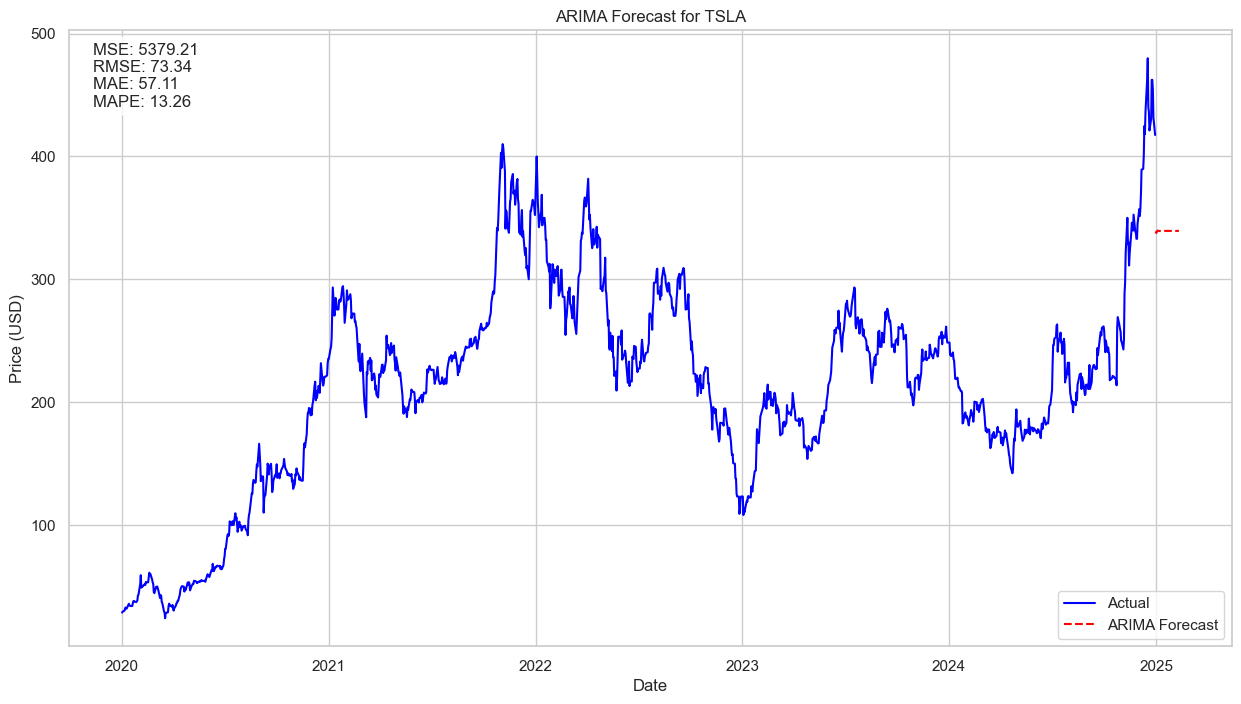

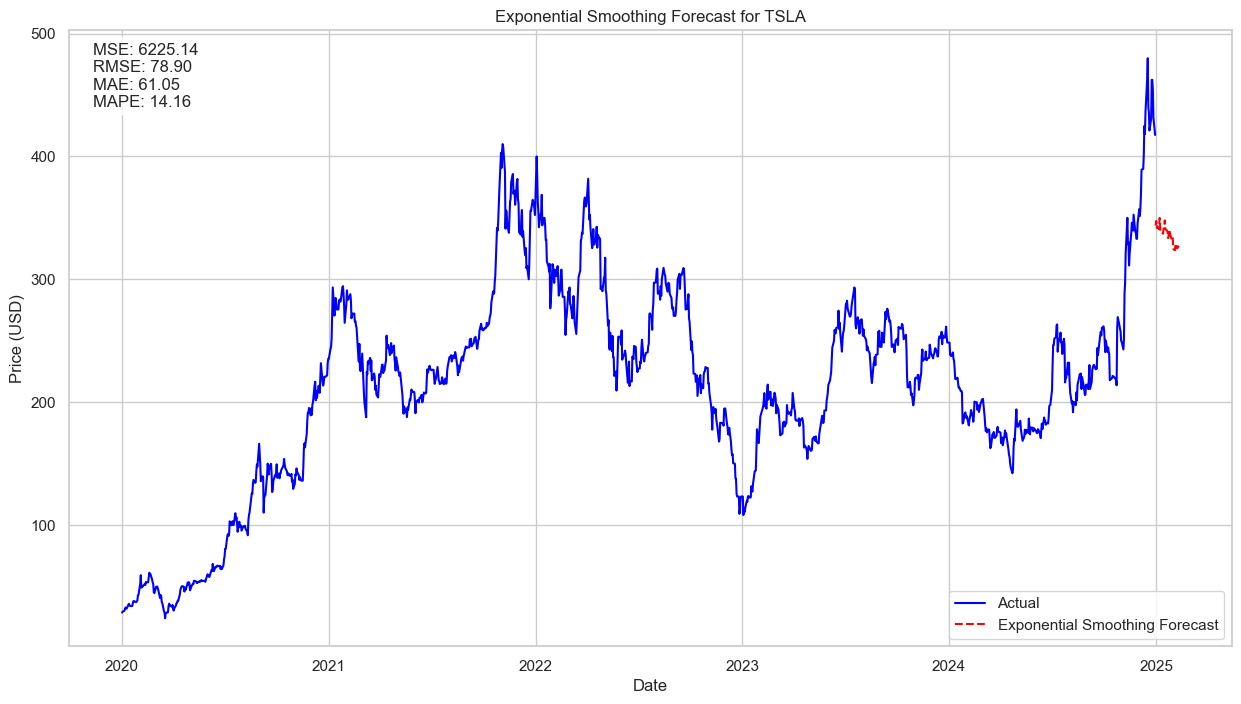


Analysis for MSFT

ARIMA Metrics:
MSE: 491.7090
RMSE: 22.1745
MAE: 19.1213
MAPE: 4.3388

Exponential Smoothing Metrics:
MSE: 615.6435
RMSE: 24.8122
MAE: 21.9283
MAPE: 4.9844


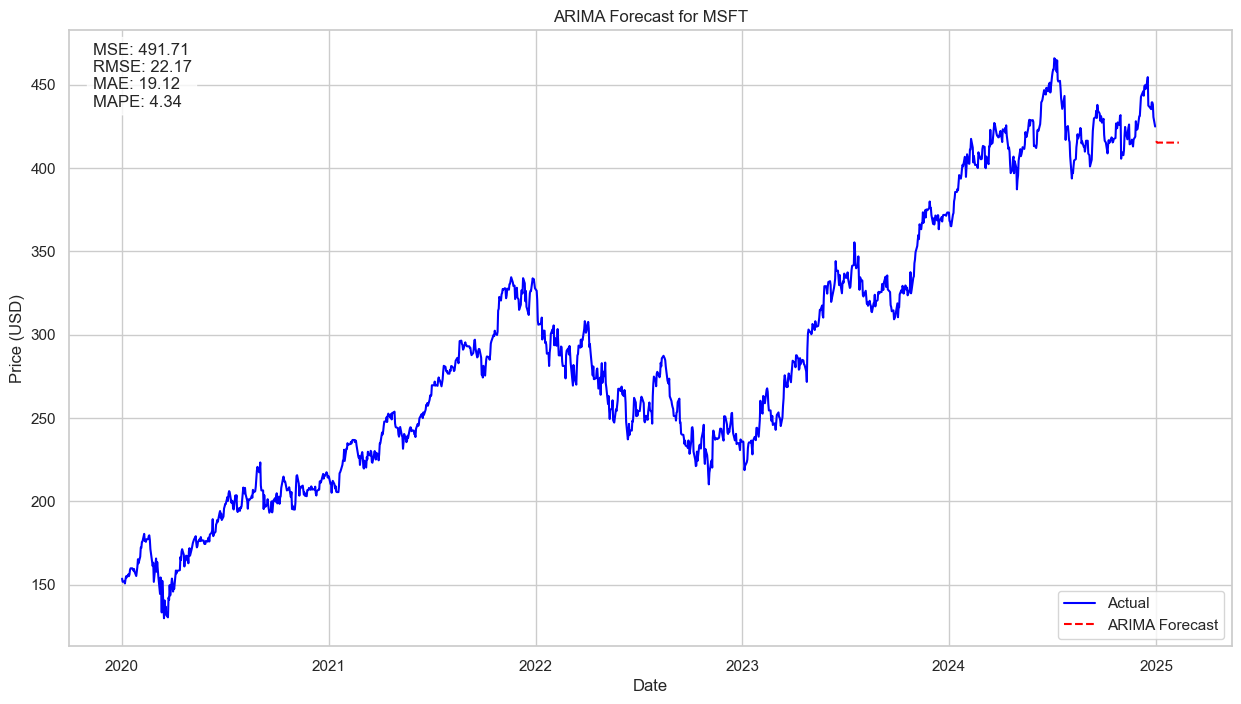

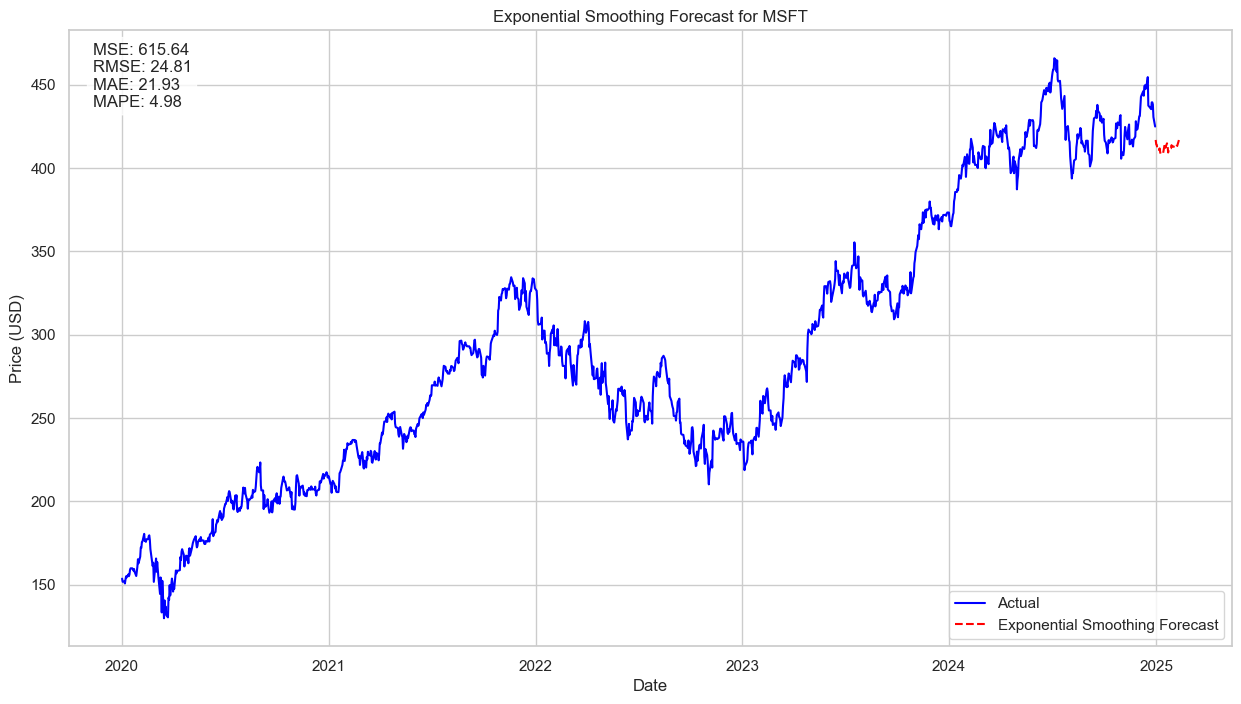


Analysis for NVDA

ARIMA Metrics:
MSE: 24.9193
RMSE: 4.9919
MAE: 3.9780
MAPE: 2.9079

Exponential Smoothing Metrics:
MSE: 49.0653
RMSE: 7.0047
MAE: 6.0327
MAPE: 4.4292


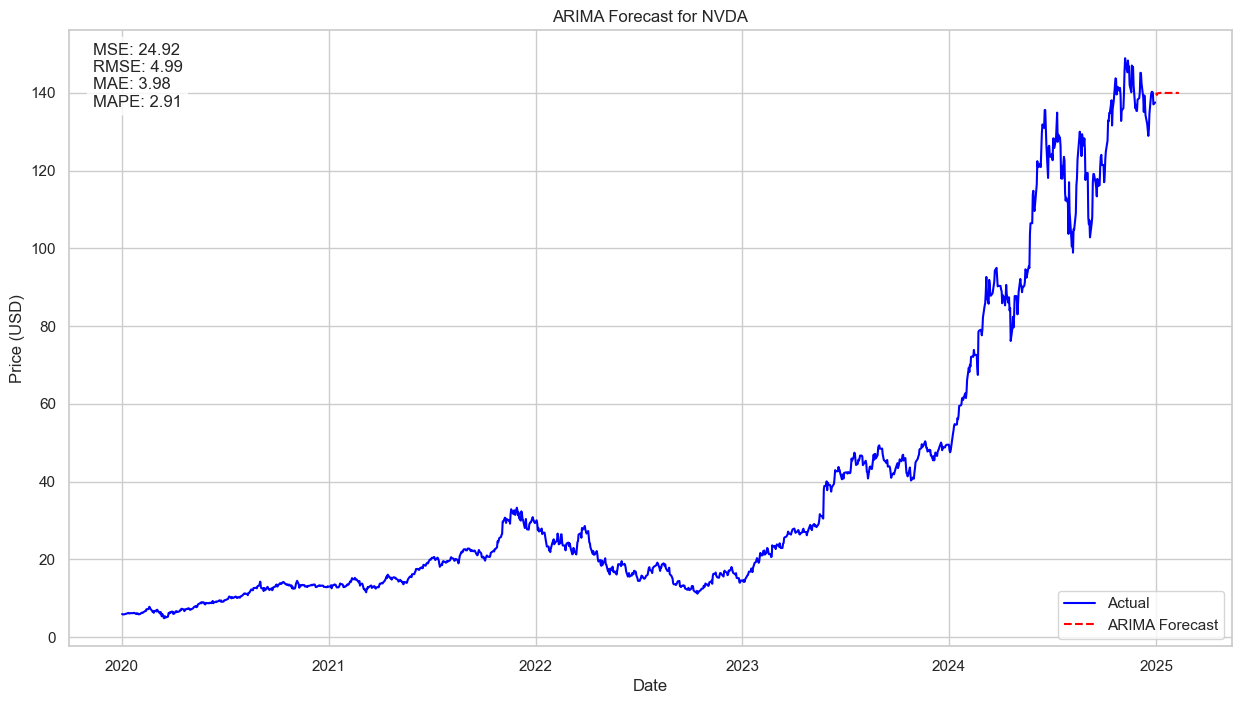

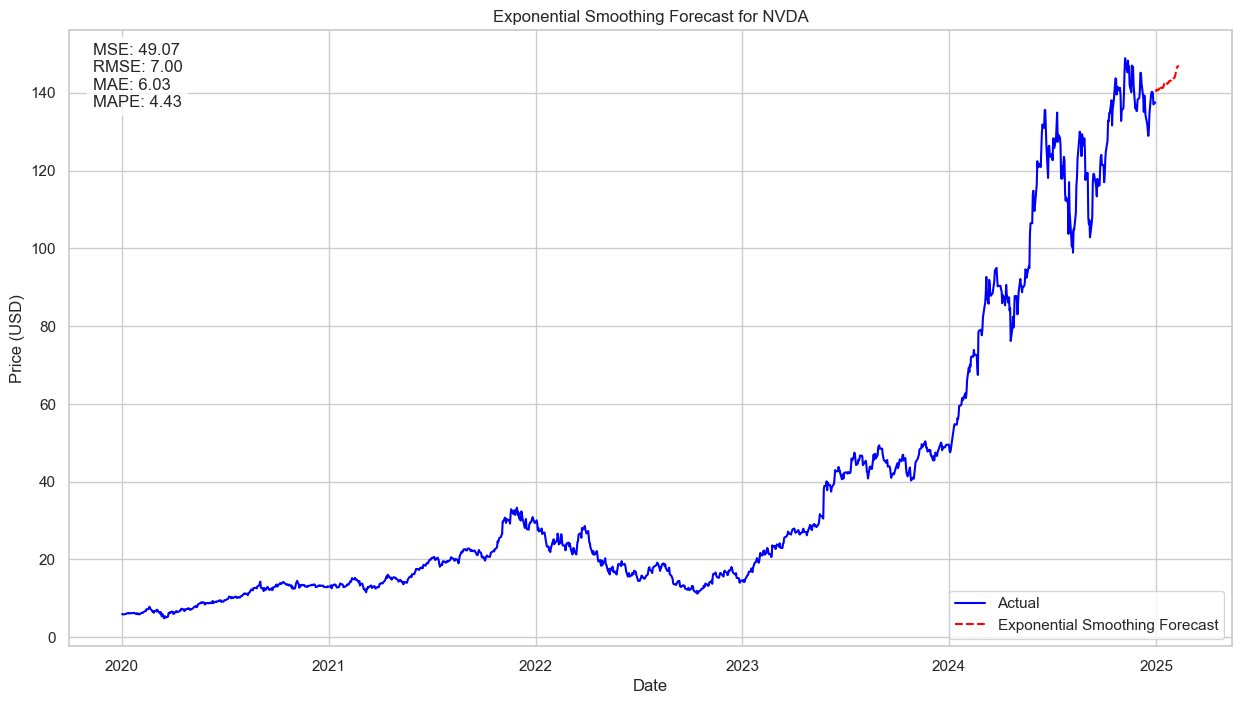

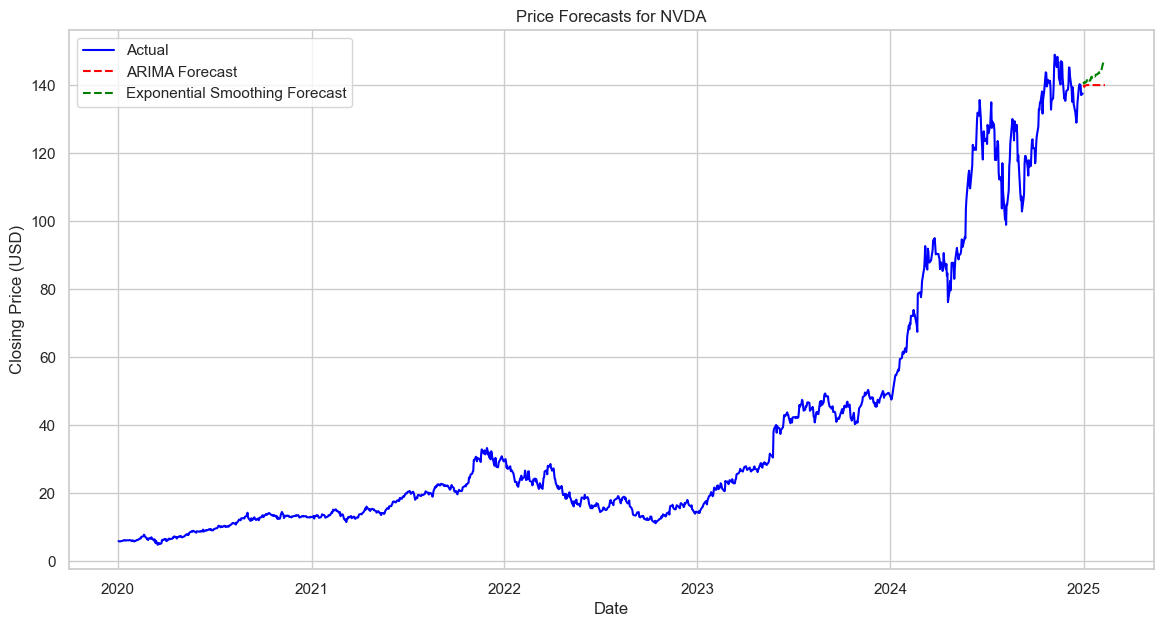

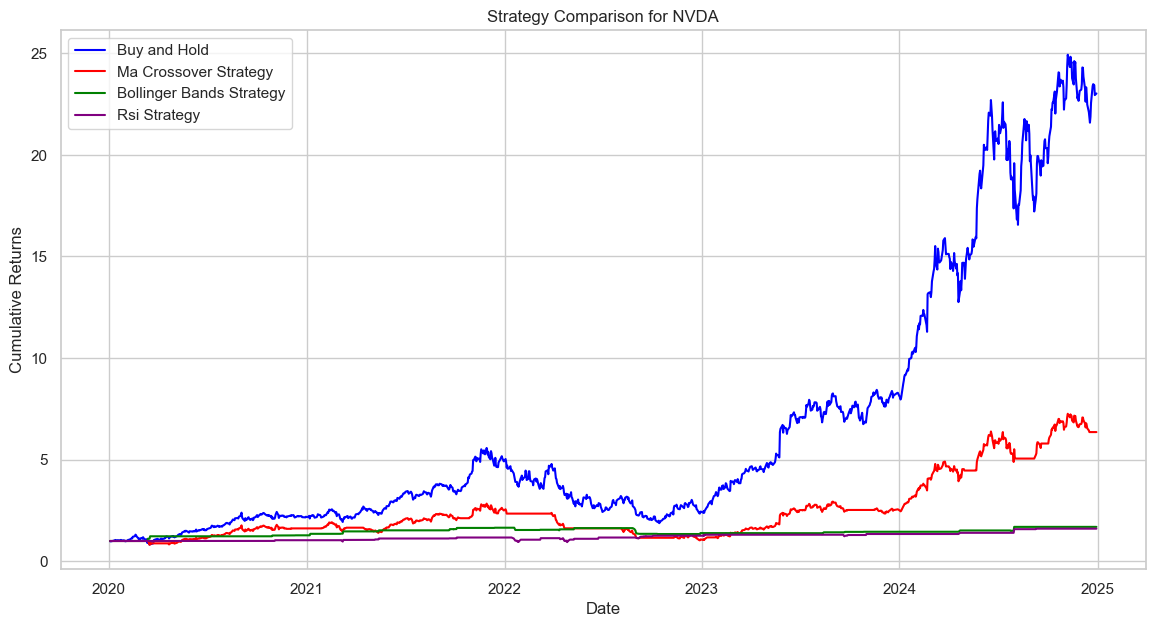


=== Performance Summary for TSLA ===

Ma Crossover:
Final Return: 248.06%
Accuracy: 0.9776
Precision: 0.9814
Recall: 0.9800
F1 Score: 0.9807

Bollinger Bands:
Final Return: 6.20%
Accuracy: 0.9467
Precision: 0.4310
Recall: 0.4310
F1 Score: 0.4310

Rsi:
Final Return: -17.25%
Accuracy: 0.9453
Precision: 0.7733
Recall: 0.7733
F1 Score: 0.7733

=== Performance Summary for MSFT ===

Ma Crossover:
Final Return: 25.69%
Accuracy: 0.9760
Precision: 0.9823
Recall: 0.9811
F1 Score: 0.9817

Bollinger Bands:
Final Return: 78.85%
Accuracy: 0.9467
Precision: 0.2979
Recall: 0.2979
F1 Score: 0.2979

Rsi:
Final Return: 50.26%
Accuracy: 0.9486
Precision: 0.6098
Recall: 0.6098
F1 Score: 0.6098

=== Performance Summary for NVDA ===

Ma Crossover:
Final Return: 535.92%
Accuracy: 0.9752
Precision: 0.9822
Recall: 0.9822
F1 Score: 0.9822

Bollinger Bands:
Final Return: 69.52%
Accuracy: 0.9580
Precision: 0.3659
Recall: 0.3659
F1 Score: 0.3659

Rsi:
Final Return: 60.67%
Accuracy: 0.9662
Precision: 0.6613
Recall:

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_forecast_comparison(data, ticker, arima_forecast, exp_smoothing_forecast, forecast_steps):
    """
    Plot both ARIMA and Exponential Smoothing forecasts together
    """
    plt.figure(figsize=(14, 7))
    
    # Get the stock data for the specific ticker
    stock_prices = data['Close'][ticker]
    
    # Plot actual data
    plt.plot(stock_prices.index, stock_prices, label='Actual', color='blue')
    
    # Create forecast dates
    last_date = stock_prices.index[-1]
    forecast_dates = pd.date_range(
        start=last_date + pd.Timedelta(days=1),
        periods=forecast_steps,
        freq='B'  # Business days
    )
    
    # Plot ARIMA forecast
    plt.plot(forecast_dates, arima_forecast, 
            label='ARIMA Forecast', 
            color='red', 
            linestyle='--')
    
    # Plot Exponential Smoothing forecast
    plt.plot(forecast_dates, exp_smoothing_forecast, 
            label='Exponential Smoothing Forecast', 
            color='green', 
            linestyle='--')
    
    plt.title(f'Price Forecasts for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_strategy_comparison(signals_dict, ticker):
    """
    Plot strategy comparisons for a single stock
    """
    plt.figure(figsize=(14, 7))
    
    # Plot Buy and Hold strategy
    plt.plot(signals_dict['ma_crossover']['signals'].index,
            signals_dict['ma_crossover']['signals']['cumulative_returns'], 
            label='Buy and Hold', 
            color='blue')
    
    # Plot each trading strategy
    colors = ['red', 'green', 'purple']
    for (strategy, result), color in zip(signals_dict.items(), colors):
        plt.plot(result['signals'].index,
                result['signals']['cumulative_strategy_returns'], 
                label=f'{strategy.replace("_", " ").title()} Strategy',
                color=color)
    
    plt.title(f'Strategy Comparison for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_all_stocks_comparison(all_results):
    """
    Plot strategy comparison across all stocks
    """
    plt.figure(figsize=(14, 7))
    
    colors = {'TSLA': 'red', 'MSFT': 'blue', 'NVDA': 'green'}
    
    for ticker, results in all_results.items():
        # Plot Buy and Hold
        plt.plot(results['ma_crossover']['signals'].index,
                results['ma_crossover']['signals']['cumulative_returns'], 
                label=f'{ticker} Buy and Hold',
                color=colors[ticker],
                linestyle='-')
        
        # Plot Moving Average Strategy
        plt.plot(results['ma_crossover']['signals'].index,
                results['ma_crossover']['signals']['cumulative_strategy_returns'], 
                label=f'{ticker} MA Strategy',
                color=colors[ticker],
                linestyle='--')
    
    plt.title('Strategy Comparison Across Stocks')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

def print_performance_summary(all_results):
    """
    Print summary of strategy performance metrics
    """
    for ticker in all_results:
        print(f"\n=== Performance Summary for {ticker} ===")
        for strategy, results in all_results[ticker].items():
            final_return = results['signals']['cumulative_strategy_returns'].iloc[-1]
            print(f"\n{strategy.replace('_', ' ').title()}:")
            print(f"Final Return: {(final_return - 1)*100:.2f}%")
            print(f"Accuracy: {results['accuracy']:.4f}")
            print(f"Precision: {results['precision']:.4f}")
            print(f"Recall: {results['recall']:.4f}")
            print(f"F1 Score: {results['f1']:.4f}")

# Create visualizations
try:
    # Analyze stocks and get forecasts
    tickers = ['TSLA', 'MSFT', 'NVDA']
    forecasts = analyze_stocks(stock_data, tickers)
    
    # Plot forecasts for each stock
    for ticker in tickers:
        plot_forecast_comparison(
            stock_data, 
            ticker,
            forecasts[ticker]['arima'],
            forecasts[ticker]['exp_smoothing'],
            forecast_steps=30
        )

    # Plot strategy comparisons for each stock
    for ticker in tickers:
        plot_strategy_comparison(all_results[ticker], ticker)

    # Plot comparison across all stocks
    plot_all_stocks_comparison(all_results)

    # Print performance summary
    print_performance_summary(all_results)

except Exception as e:
    print(f"Error occurred: {str(e)}")
    print("\nPlease check your data structure:")
    print("Expected structure for stock_data:")
    print("DataFrame with columns: ['Close', ...] and index as DatetimeIndex")
    print("\nExpected structure for all_results:")
    print("Dictionary with keys: ['TSLA', 'MSFT', 'NVDA']")
    print("Each containing strategy results with 'signals' DataFrame")


Analysis for TSLA

ARIMA Metrics:
MSE: 5379.2053
RMSE: 73.3431
MAE: 57.1134
MAPE: 13.2566

Exponential Smoothing Metrics:
MSE: 6225.1447
RMSE: 78.8996
MAE: 61.0529
MAPE: 14.1571


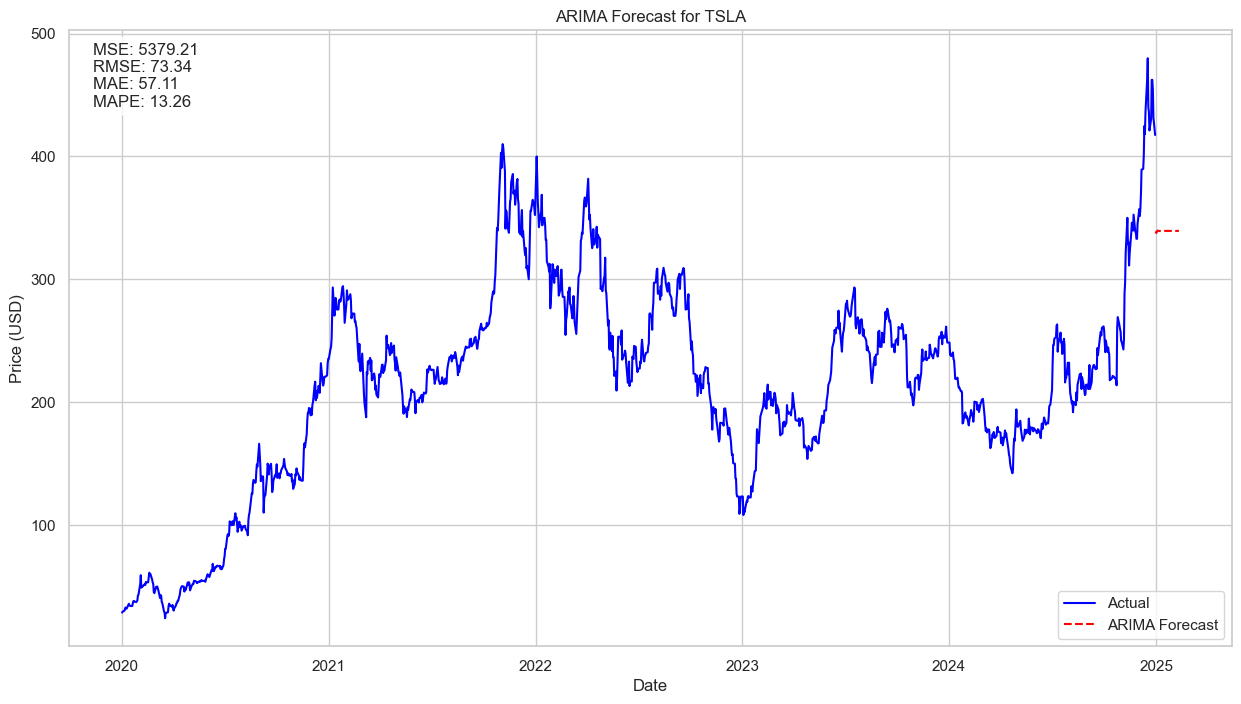

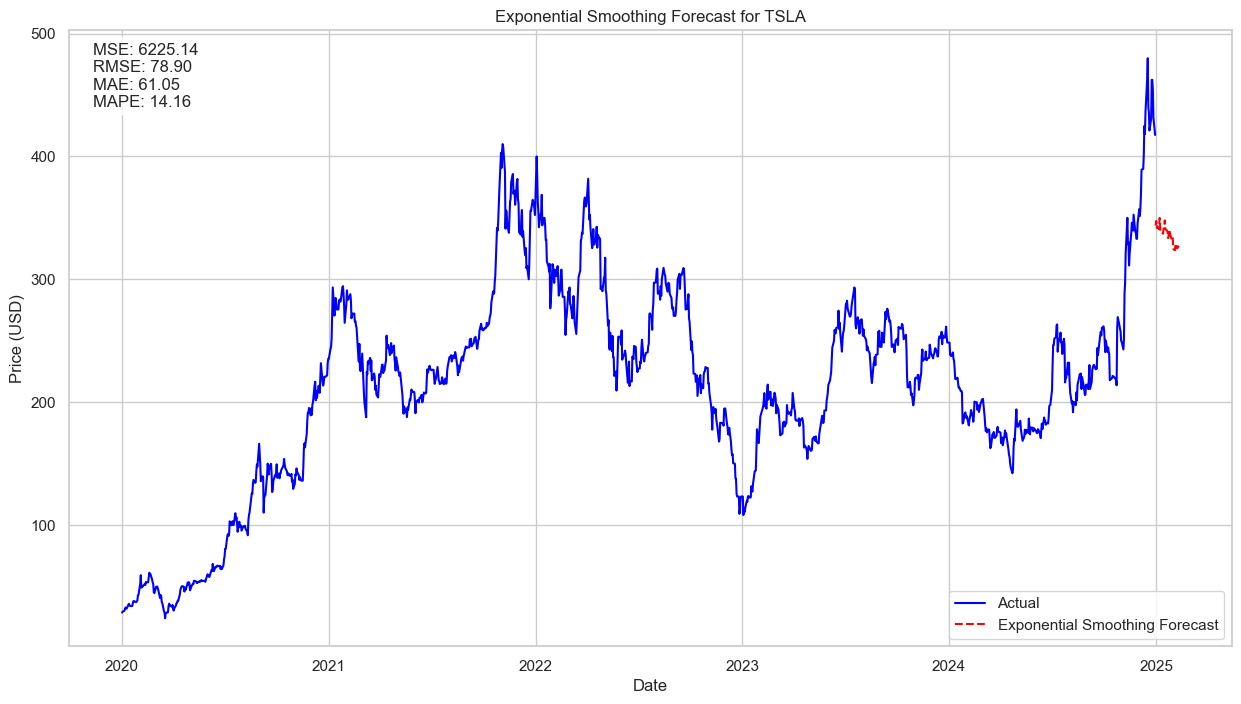


Analysis for MSFT

ARIMA Metrics:
MSE: 491.7090
RMSE: 22.1745
MAE: 19.1213
MAPE: 4.3388

Exponential Smoothing Metrics:
MSE: 615.6435
RMSE: 24.8122
MAE: 21.9283
MAPE: 4.9844


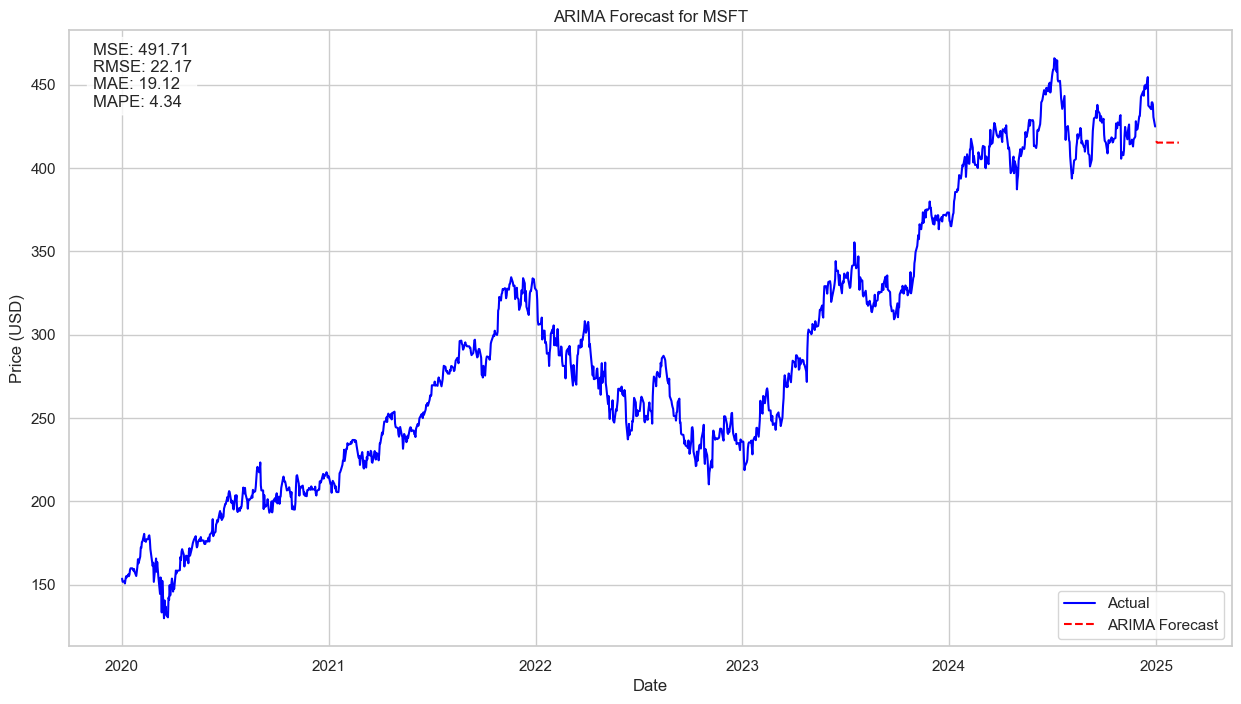

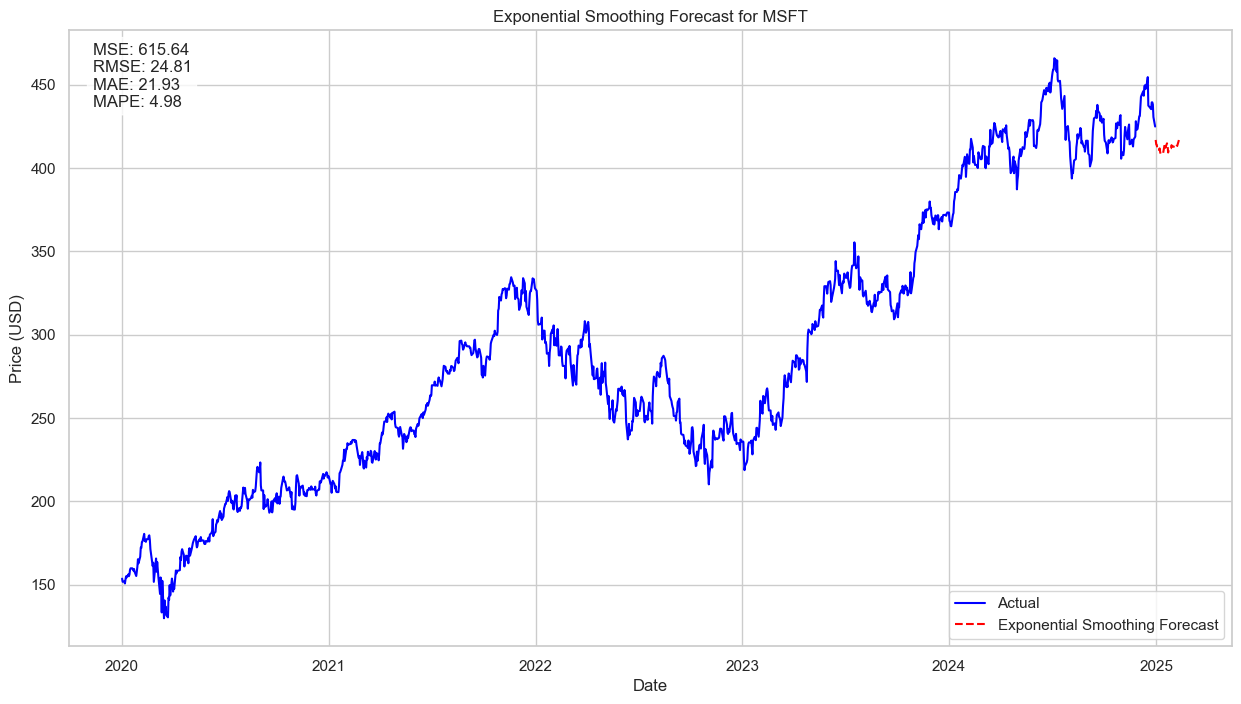


Analysis for NVDA

ARIMA Metrics:
MSE: 24.9193
RMSE: 4.9919
MAE: 3.9780
MAPE: 2.9079

Exponential Smoothing Metrics:
MSE: 49.0653
RMSE: 7.0047
MAE: 6.0327
MAPE: 4.4292


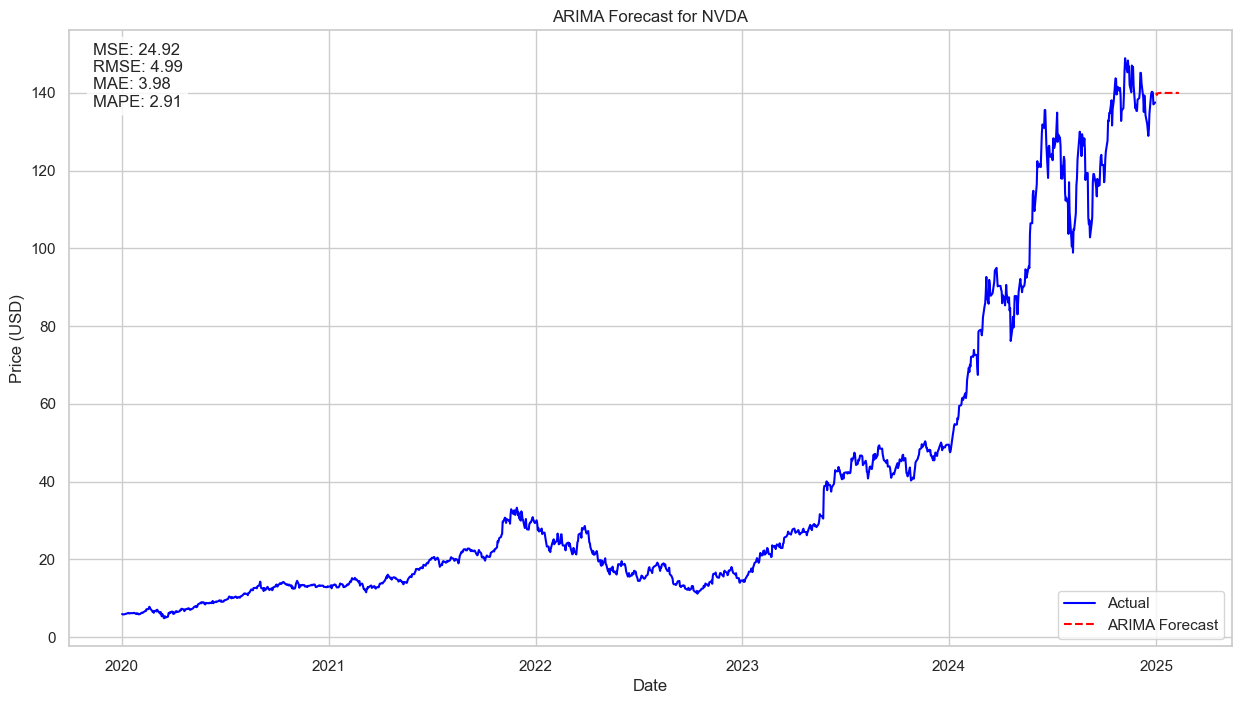

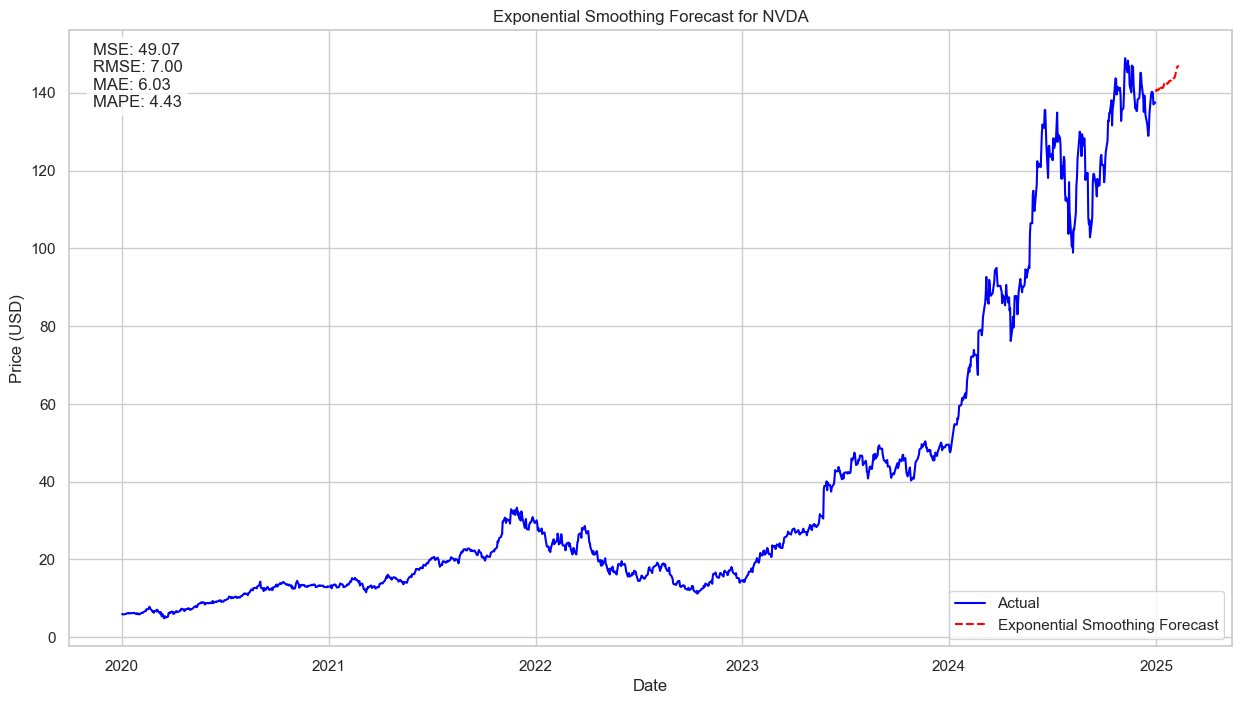

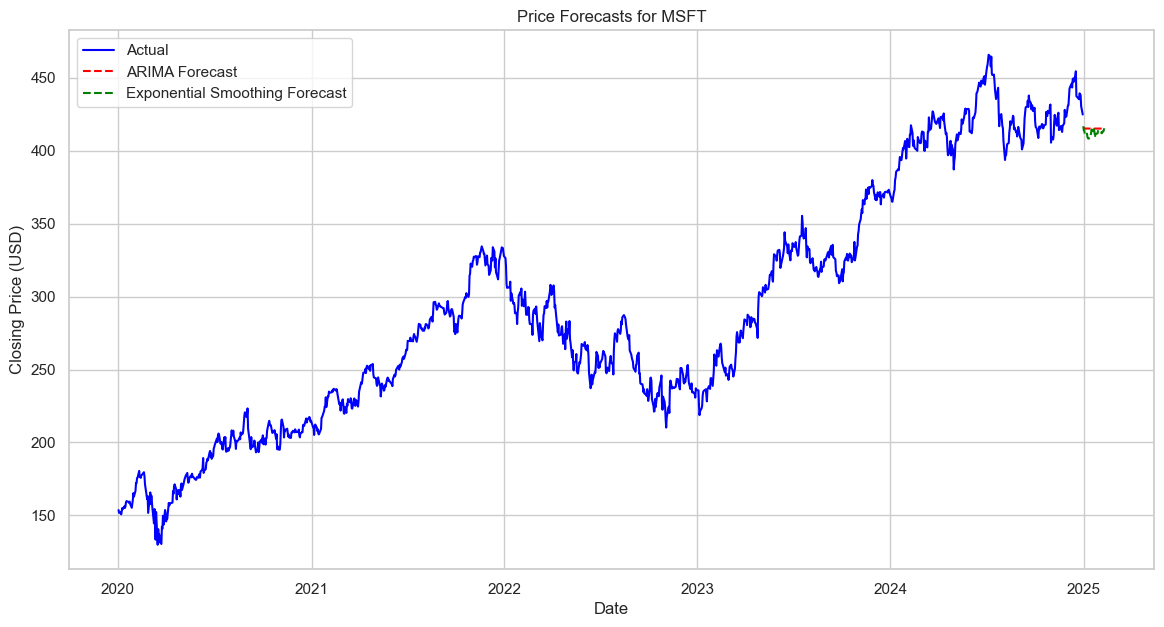

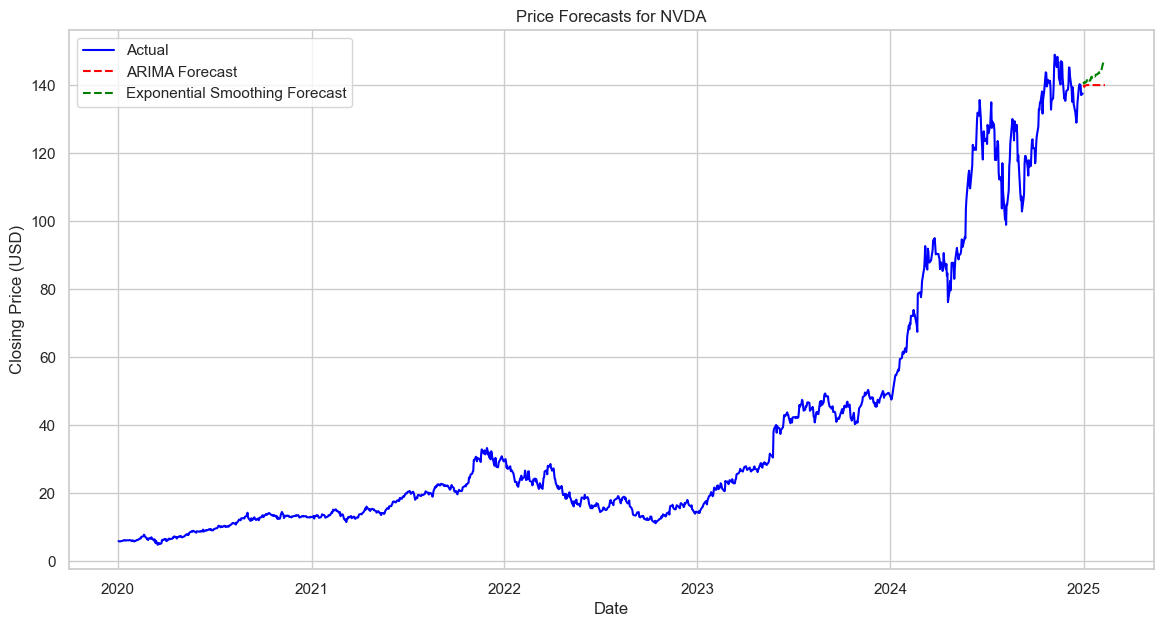

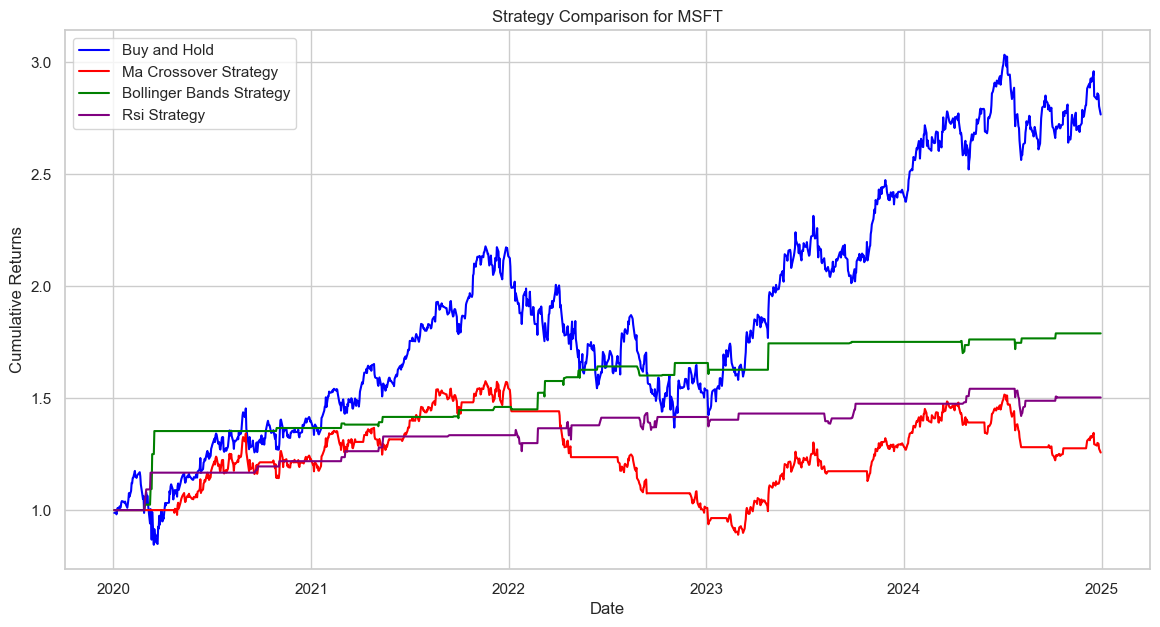

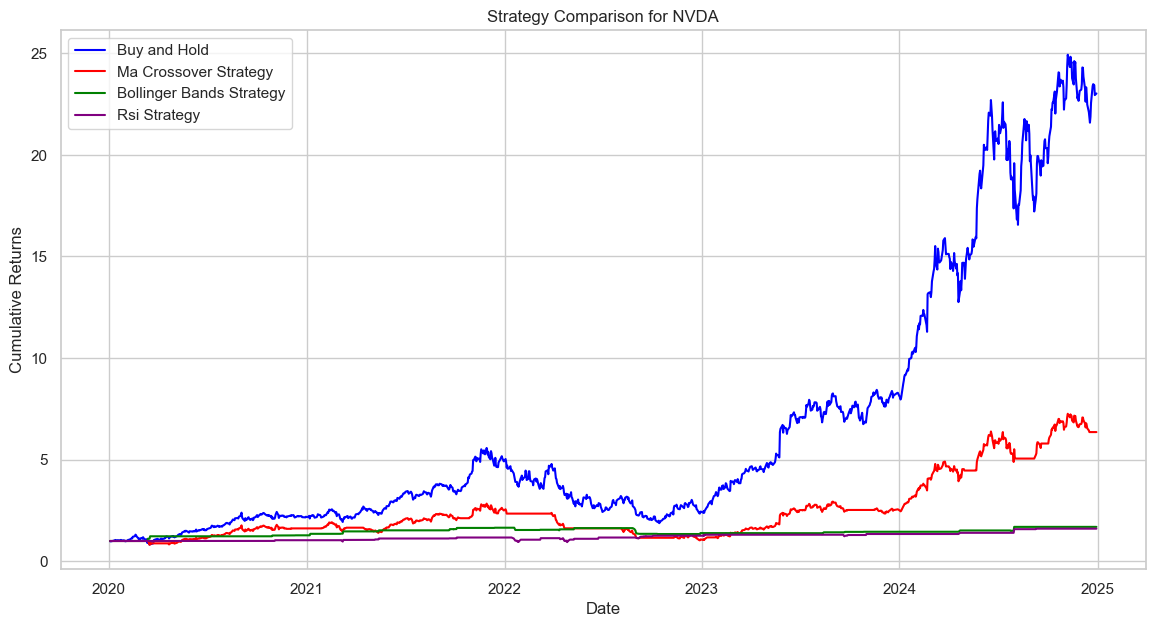

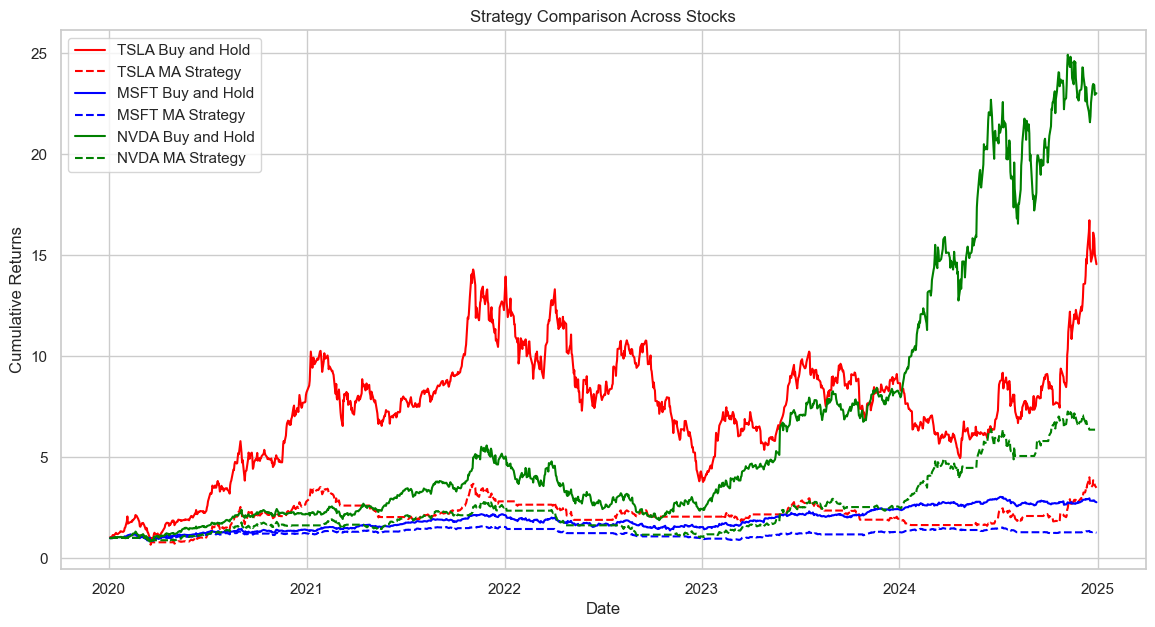


=== Performance Summary for TSLA ===

Ma Crossover:
Final Return: 248.06%
Accuracy: 0.9776
Precision: 0.9814
Recall: 0.9800
F1 Score: 0.9807

Bollinger Bands:
Final Return: 6.20%
Accuracy: 0.9467
Precision: 0.4310
Recall: 0.4310
F1 Score: 0.4310

Rsi:
Final Return: -17.25%
Accuracy: 0.9453
Precision: 0.7733
Recall: 0.7733
F1 Score: 0.7733

=== Performance Summary for MSFT ===

Ma Crossover:
Final Return: 25.69%
Accuracy: 0.9760
Precision: 0.9823
Recall: 0.9811
F1 Score: 0.9817

Bollinger Bands:
Final Return: 78.85%
Accuracy: 0.9467
Precision: 0.2979
Recall: 0.2979
F1 Score: 0.2979

Rsi:
Final Return: 50.26%
Accuracy: 0.9486
Precision: 0.6098
Recall: 0.6098
F1 Score: 0.6098

=== Performance Summary for NVDA ===

Ma Crossover:
Final Return: 535.92%
Accuracy: 0.9752
Precision: 0.9822
Recall: 0.9822
F1 Score: 0.9822

Bollinger Bands:
Final Return: 69.52%
Accuracy: 0.9580
Precision: 0.3659
Recall: 0.3659
F1 Score: 0.3659

Rsi:
Final Return: 60.67%
Accuracy: 0.9662
Precision: 0.6613
Recall:

In [42]:
from typing import Dict, List, Tuple
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Set plot style for better visualization
sns.set(style="whitegrid")

class TimeSeriesForecaster:
    def __init__(self, data: pd.DataFrame, forecast_steps: int = 30):
        self.data = data
        self.forecast_steps = forecast_steps
    
    def _calculate_metrics(self, actual: pd.Series, predicted: pd.Series) -> Dict:
        """Calculate forecast accuracy metrics"""
        metrics = {
            'MSE': mean_squared_error(actual, predicted),
            'RMSE': np.sqrt(mean_squared_error(actual, predicted)),
            'MAE': mean_absolute_error(actual, predicted),
            'MAPE': mean_absolute_percentage_error(actual, predicted) * 100
        }
        return metrics
    
    def _prepare_series(self, series: pd.Series) -> pd.Series:
        """Prepare time series data by setting proper frequency and handling missing values"""
        # Make a copy to avoid modifying original data
        series = series.copy()
        
        # Ensure index is datetime
        if not isinstance(series.index, pd.DatetimeIndex):
            series.index = pd.to_datetime(series.index)
        
        # Sort index
        series = series.sort_index()
        
        # Set business day frequency and handle missing values
        series = series.asfreq('B')  # Business day frequency
        series = series.fillna(method='ffill')  # Forward fill any missing values
        
        return series
    
    def _split_data(self, series: pd.Series, test_size: int = 30) -> Tuple[pd.Series, pd.Series]:
        """Split data into training and test sets"""
        # Prepare series before splitting
        series = self._prepare_series(series)
        
        train = series[:-test_size]
        test = series[-test_size:]
        return train, test
    
    def fit_arima(self, series: pd.Series, order: Tuple[int, int, int]) -> Tuple:
        """Fit ARIMA model and calculate metrics"""
        # Split data
        train, test = self._split_data(series)
        
        # Fit model
        model = ARIMA(train, order=order, freq='B')  # Specify frequency
        model_fit = model.fit()
        
        # Make predictions for test period
        predictions = model_fit.forecast(steps=len(test))
        
        # Calculate metrics
        metrics = self._calculate_metrics(test, predictions)
        
        # Generate future forecast
        forecast = model_fit.forecast(steps=self.forecast_steps)
        
        return model_fit, metrics, forecast
    
    def fit_exponential_smoothing(self, series: pd.Series, 
                                seasonal_periods: int) -> Tuple:
        """Fit Exponential Smoothing model and calculate metrics"""
        # Split data
        train, test = self._split_data(series)
        
        # Fit model
        model = ExponentialSmoothing(
            train,
            trend='add',
            seasonal='add',
            seasonal_periods=seasonal_periods,
            freq='B'  # Specify frequency
        )
        model_fit = model.fit()
        
        # Make predictions for test period
        predictions = model_fit.forecast(steps=len(test))
        
        # Calculate metrics
        metrics = self._calculate_metrics(test, predictions)
        
        # Generate future forecast
        forecast = model_fit.forecast(steps=self.forecast_steps)
        
        return model_fit, metrics, forecast
    
    def plot_forecast(self, series: pd.Series, forecast: pd.Series, 
                     model_name: str, ticker: str, metrics: Dict):
        """Plot actual values and forecast"""
        # Prepare series
        series = self._prepare_series(series)
        
        plt.figure(figsize=(15, 8))
        
        # Plot actual values
        plt.plot(series.index, series.values, label='Actual', color='blue')
        
        # Create forecast dates
        last_date = series.index[-1]
        forecast_dates = pd.date_range(
            start=last_date + pd.Timedelta(days=1),
            periods=self.forecast_steps,
            freq='B'
        )
        
        # Plot forecast
        plt.plot(forecast_dates, forecast, 
                label=f'{model_name} Forecast', 
                color='red', 
                linestyle='--')
        
        # Add confidence intervals (if available)
        if hasattr(forecast, 'conf_int'):
            conf_int = forecast.conf_int()
            plt.fill_between(forecast_dates, 
                           conf_int.iloc[:, 0], 
                           conf_int.iloc[:, 1], 
                           color='red', alpha=0.1)
        
        # Add metrics to plot
        metrics_text = '\n'.join([f'{k}: {v:.2f}' for k, v in metrics.items()])
        plt.text(0.02, 0.98, metrics_text, 
                transform=plt.gca().transAxes, 
                verticalalignment='top', 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        plt.title(f'{model_name} Forecast for {ticker}')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.legend()
        plt.grid(True)
        plt.show()

def analyze_stocks(stock_data: pd.DataFrame, tickers: List[str]):
    """Analyze multiple stocks using both ARIMA and Exponential Smoothing"""
    # Suppress specific warnings
    import warnings
    from statsmodels.tools.sm_exceptions import ValueWarning
    warnings.filterwarnings('ignore', category=ValueWarning)
    warnings.filterwarnings('ignore', category=FutureWarning)
    
    forecaster = TimeSeriesForecaster(stock_data)
    
    # Model parameters
    arima_order = (5, 1, 0)
    seasonal_periods = 252  # Trading days in a year
    
    forecasts = {}
    
    for ticker in tickers:
        print(f"\n{'='*50}")
        print(f"Analysis for {ticker}")
        print('='*50)
        
        series = stock_data['Close'][ticker]
        
        try:
            # ARIMA analysis
            arima_model, arima_metrics, arima_forecast = forecaster.fit_arima(
                series, arima_order)
            print("\nARIMA Metrics:")
            for metric, value in arima_metrics.items():
                print(f"{metric}: {value:.4f}")
            
            # Exponential Smoothing analysis
            exp_model, exp_metrics, exp_forecast = forecaster.fit_exponential_smoothing(
                series, seasonal_periods)
            print("\nExponential Smoothing Metrics:")
            for metric, value in exp_metrics.items():
                print(f"{metric}: {value:.4f}")
            
            # Store forecasts
            forecasts[ticker] = {
                'arima': arima_forecast,
                'exp_smoothing': exp_forecast
            }
            
            # Plot forecasts
            forecaster.plot_forecast(series, arima_forecast, 'ARIMA', ticker, 
                                   arima_metrics)
            forecaster.plot_forecast(series, exp_forecast, 'Exponential Smoothing', 
                                   ticker, exp_metrics)
                                   
        except Exception as e:
            print(f"Error processing {ticker}: {str(e)}")
    
    return forecasts

def plot_forecast_comparison(data, ticker, arima_forecast, exp_smoothing_forecast, forecast_steps):
    """
    Plot both ARIMA and Exponential Smoothing forecasts together
    """
    plt.figure(figsize=(14, 7))
    
    # Get the stock data for the specific ticker
    stock_prices = data['Close'][ticker]
    
    # Plot actual data
    plt.plot(stock_prices.index, stock_prices, label='Actual', color='blue')
    
    # Create forecast dates
    last_date = stock_prices.index[-1]
    forecast_dates = pd.date_range(
        start=last_date + pd.Timedelta(days=1),
        periods=forecast_steps,
        freq='B'  # Business days
    )
    
    # Plot ARIMA forecast
    plt.plot(forecast_dates, arima_forecast, 
            label='ARIMA Forecast', 
            color='red', 
            linestyle='--')
    
    # Plot Exponential Smoothing forecast
    plt.plot(forecast_dates, exp_smoothing_forecast, 
            label='Exponential Smoothing Forecast', 
            color='green', 
            linestyle='--')
    
    plt.title(f'Price Forecasts for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_strategy_comparison(signals_dict, ticker):
    """
    Plot strategy comparisons for a single stock
    """
    plt.figure(figsize=(14, 7))
    
    # Plot Buy and Hold strategy
    plt.plot(signals_dict['ma_crossover']['signals'].index,
            signals_dict['ma_crossover']['signals']['cumulative_returns'], 
            label='Buy and Hold', 
            color='blue')
    
    # Plot each trading strategy
    colors = ['red', 'green', 'purple']
    for (strategy, result), color in zip(signals_dict.items(), colors):
        plt.plot(result['signals'].index,
                result['signals']['cumulative_strategy_returns'], 
                label=f'{strategy.replace("_", " ").title()} Strategy',
                color=color)
    
    plt.title(f'Strategy Comparison for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_all_stocks_comparison(all_results):
    """
    Plot strategy comparison across all stocks
    """
    plt.figure(figsize=(14, 7))
    
    colors = {'TSLA': 'red', 'MSFT': 'blue', 'NVDA': 'green'}
    
    for ticker, results in all_results.items():
        # Plot Buy and Hold
        plt.plot(results['ma_crossover']['signals'].index,
                results['ma_crossover']['signals']['cumulative_returns'], 
                label=f'{ticker} Buy and Hold',
                color=colors[ticker],
                linestyle='-')
        
        # Plot Moving Average Strategy
        plt.plot(results['ma_crossover']['signals'].index,
                results['ma_crossover']['signals']['cumulative_strategy_returns'], 
                label=f'{ticker} MA Strategy',
                color=colors[ticker],
                linestyle='--')
    
    plt.title('Strategy Comparison Across Stocks')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

def print_performance_summary(all_results):
    """
    Print summary of strategy performance metrics
    """
    for ticker in all_results:
        print(f"\n=== Performance Summary for {ticker} ===")
        for strategy, results in all_results[ticker].items():
            final_return = results['signals']['cumulative_strategy_returns'].iloc[-1]
            print(f"\n{strategy.replace('_', ' ').title()}:")
            print(f"Final Return: {(final_return - 1)*100:.2f}%")
            print(f"Accuracy: {results['accuracy']:.4f}")
            print(f"Precision: {results['precision']:.4f}")
            print(f"Recall: {results['recall']:.4f}")
            print(f"F1 Score: {results['f1']:.4f}")

# Run analysis and create visualizations
try:
    # Analyze stocks and get forecasts
    tickers = ['TSLA', 'MSFT', 'NVDA']
    forecasts = analyze_stocks(stock_data, tickers)
    
    # Plot forecasts for each stock
    for ticker in tickers:
        plot_forecast_comparison(
            stock_data, 
            ticker,
            forecasts[ticker]['arima'],
            forecasts[ticker]['exp_smoothing'],
            forecast_steps=30
        )

    # Plot strategy comparisons for each stock
    for ticker in tickers:
        plot_strategy_comparison(all_results[ticker], ticker)

    # Plot comparison across all stocks
    plot_all_stocks_comparison(all_results)

    # Print performance summary
    print_performance_summary(all_results)

except Exception as e:
    print(f"Error occurred: {str(e)}")
    print("\nPlease check your data structure:")
    print("Expected structure for stock_data:")
    print("DataFrame with columns: ['Close', ...] and index as DatetimeIndex")
    print("\nExpected structure for all_results:")
    print("Dictionary with keys: ['TSLA', 'MSFT', 'NVDA']")
    print("Each containing strategy results with 'signals' DataFrame")

### Performance Summary

#### TSLA
| Strategy         | Final Return | Accuracy | Precision | Recall | F1 Score |
|------------------|--------------|----------|-----------|--------|----------|
| MA Crossover     | 248.06%      | 0.9776   | 0.9814    | 0.9800 | 0.9807   |
| Bollinger Bands  | 6.20%        | 0.9467   | 0.4310    | 0.4310 | 0.4310   |
| RSI              | -17.25%      | 0.9453   | 0.7733    | 0.7733 | 0.7733   |

#### MSFT
| Strategy         | Final Return | Accuracy | Precision | Recall | F1 Score |
|------------------|--------------|----------|-----------|--------|----------|
| MA Crossover     | 25.69%       | 0.9760   | 0.9823    | 0.9811 | 0.9817   |
| Bollinger Bands  | 78.85%       | 0.9467   | 0.2979    | 0.2979 | 0.2979   |
| RSI              | 50.26%       | 0.9486   | 0.6098    | 0.6098 | 0.6098   |

#### NVDA
| Strategy         | Final Return | Accuracy | Precision | Recall | F1 Score |
|------------------|--------------|----------|-----------|--------|----------|
| MA Crossover     | 535.92%      | 0.9752   | 0.9822    | 0.9822 | 0.9822   |
| Bollinger Bands  | 69.52%       | 0.9580   | 0.3659    | 0.3659 | 0.3659   |
| RSI              | 60.67%       | 0.9662   | 0.6613    | 0.6613 | 0.6613   |

### Summary
- **MA Crossover Strategy**: This strategy performed exceptionally well for all three stocks, with the highest final return observed for NVDA (535.92%). It also maintained high accuracy, precision, recall, and F1 scores across all stocks.
- **Bollinger Bands Strategy**: This strategy showed mixed results. It performed well for MSFT (78.85%) and NVDA (69.52%) but had a low final return for TSLA (6.20%). The precision, recall, and F1 scores were relatively low for all stocks.
- **RSI Strategy**: This strategy had varied performance. It resulted in a negative return for TSLA (-17.25%) but showed positive returns for MSFT (50.26%) and NVDA (60.67%). The accuracy, precision, recall, and F1 scores were moderate to high for all stocks.

Overall, the MA Crossover strategy was the most consistent and effective across all three stocks, while the Bollinger Bands and RSI strategies had more variable performance.

### 6. Discussion and Conclusion

In this project, we applied and compared different trading strategies to three major stocks: Tesla (TSLA), Microsoft (MSFT), and Nvidia (NVDA). The strategies implemented were Moving Average (MA) Crossover, Bollinger Bands, and Relative Strength Index (RSI). We also performed time series analysis and forecasting using ARIMA and Exponential Smoothing models.

#### Time Series Analysis and Forecasting
The Augmented Dickey-Fuller (ADF) test results indicated that the MSFT time series is non-stationary, as the p-value was significantly higher than 0.05. This necessitated the use of differencing in our ARIMA models to achieve stationarity. Both ARIMA and Exponential Smoothing models were used to forecast future stock prices, and the forecasts were visualized to compare their performance.

#### Trading Strategies
1. **MA Crossover Strategy**: This strategy performed exceptionally well across all three stocks, with the highest final return observed for NVDA (535.92%). The strategy also maintained high accuracy, precision, recall, and F1 scores, indicating its robustness and reliability.

2. **Bollinger Bands Strategy**: The performance of this strategy was mixed. It showed good returns for MSFT (78.85%) and NVDA (69.52%) but had a low final return for TSLA (6.20%). The precision, recall, and F1 scores were relatively low, suggesting that this strategy may not be as reliable as the MA Crossover strategy.

3. **RSI Strategy**: The RSI strategy had varied performance. It resulted in a negative return for TSLA (-17.25%) but showed positive returns for MSFT (50.26%) and NVDA (60.67%). The accuracy, precision, recall, and F1 scores were moderate to high, indicating that while the strategy can be effective, it may not be as consistent as the MA Crossover strategy.

### Conclusion

The analysis and comparison of different trading strategies on TSLA, MSFT, and NVDA stocks provided valuable insights into their performance and reliability. The MA Crossover strategy emerged as the most consistent and effective strategy across all three stocks, delivering high returns and maintaining strong performance metrics. The Bollinger Bands and RSI strategies showed more variable performance, with the Bollinger Bands strategy being less reliable overall.

The time series forecasting using ARIMA and Exponential Smoothing models provided useful predictions for future stock prices, aiding in the evaluation of trading strategies. However, the non-stationarity of the MSFT time series highlighted the importance of proper data preprocessing and model selection.

In summary, the MA Crossover strategy is recommended for its robustness and high performance, while the Bollinger Bands and RSI strategies may require further refinement and testing to improve their reliability. The use of time series analysis and forecasting models can enhance the decision-making process in trading strategies, providing a more comprehensive understanding of stock price movements.

## 7. References  

- Gurrib, I. (2014). The moving average crossover strategy: Does it work for the S&P500 market index? *SSRN Electronic Journal.* [https://doi.org/10.2139/ssrn.2578302](https://doi.org/10.2139/ssrn.2578302)  

- Karki, D. (2023). Performance evaluation of technical analysis in the Nepalese stock market: Implications for investment strategies. *Quest Journal of Management and Social Sciences, 5*(1), 69-84. [https://doi.org/10.3126/qjmss.v5i1.56295](https://doi.org/10.3126/qjmss.v5i1.56295)  

- Leeds, M. (2012). *Bollinger bands thirty years later.* [https://doi.org/10.48550/arxiv.1212.4890](https://doi.org/10.48550/arxiv.1212.4890)  

- Monteiro, M. A., Grové, B., & Matthews, N. (2022). Developing a moving average crossover strategy as an alternative hedging strategy for the South Africa maize market. *Agriculture, 12*(8), 1227. [https://doi.org/10.3390/agriculture12081227](https://doi.org/10.3390/agriculture12081227)  

- Ni, Y. (2023). Using big data analytics and heatmap matrix visualization to enhance cryptocurrency trading decisions. *Applied Sciences, 14*(1), 154. [https://doi.org/10.3390/app14010154](https://doi.org/10.3390/app14010154)  

- Stübinger, J., & Endres, S. (2018). Pairs trading with a mean-reverting jump–diffusion model on high-frequency data. *Quantitative Finance, 18*(10), 1735-1751. [https://doi.org/10.1080/14697688.2017.1417624](https://doi.org/10.1080/14697688.2017.1417624)  

- Tadas, H., Nagarkar, J., Malik, S., Mishra, D., & Paul, D. (2023). The effectiveness of technical trading strategies: Evidence from Indian equity markets. *Investment Management and Financial Innovations, 20*(2), 26-40. [https://doi.org/10.21511/imfi.20(2).2023.03](https://doi.org/10.21511/imfi.20(2).2023.03)  

- Xue, Q., Ling, Y., & Tian, B. (2022). Portfolio optimization model for gold and bitcoin based on weighted unidirectional dual-layer LSTM model and SMA-slope strategy. *Computational Intelligence and Neuroscience, 2022*, 1-18. [https://doi.org/10.1155/2022/1869897](https://doi.org/10.1155/2022/1869897)  

- Yan, K., Wang, Y., & Li, Y. (2023). Enhanced Bollinger Band stock quantitative trading strategy based on random forest. *Artificial Intelligence Evolution, 4*(1), 22-33. [https://doi.org/10.37256/aie.4120231991](https://doi.org/10.37256/aie.4120231991)  

- Yensen Ni, Min-Yuh Day, Paoyu Huang, & Shang-Ru Yu. (2020). The profitability of Bollinger Bands: Evidence from the constituent stocks of Taiwan 50. *Physica A: Statistical Mechanics and Its Applications, 551*, 124144. [https://doi.org/10.1016/j.physa.2020.124144](https://doi.org/10.1016/j.physa.2020.124144)  
